# Importar as bibliotecas necessárias

In [1]:
#import matplotlib as mpl
# import seaborn as sns
import datetime
# import sklearn
# from sklearn.impute import SimpleImputer
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.decomposition import KernelPCA
import numpy as np
import pandas as pd
# import math
# import keras
import matplotlib.pyplot as plt
import tensorflow as tf
# import seaborn as sns
import json
# Time library to know how much time things take
import time
import random

2025-04-14 19:07:34.890251: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Configurar execução

In [2]:
run_start = time.time()
# run date isoformat
run_date = datetime.datetime.now()
print(run_date.isoformat())
print(run_date.strftime("%Y-%m-%d %H:%M:%S.%f"))

2025-04-14T19:07:37.844225
2025-04-14 19:07:37.844225


In [3]:
NUMBER_OF_SUB_EXPERIMENT = 7
MODEL_TO_USE = 3

# COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %']
COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %']
COLUMN_TO_PREDICT = 'IBOVESPA - Close'

# Dataframe constants
# Train, val and test split
START_ON_FIRST_VALID_DATE = True
START_DATE = None # '1995-01-02' # None
END_DATE = None # '2016-04-22' # None
TYPE_OF_UNIT = 'customDays'
# csv have 7993 data rows
TRAINING_SIZE = '1994-01-03'
VALIDATION_SIZE = '2023-10-01'
TESTING_SIZE = '2024-10-01'
FILE = 'data/2 - processed/normalized_data.csv'

# Keras config constants
BATCH_SIZE = 32
MAX_EPOCHS = 500
LEARNING_RATE = 0.01
LEARNING_DECAY = 0.9
DECAY_STEPS = 1000
PATIENCE = 10
# DECAY_EVERY_EPOCHS = 2
NUM_FEATURES = 10 # None # 100
RANDOM_SEED = 509
INPUT_WINDOW_SIZE = 4
OUTPUT_WINDOW_SIZE = 1
# Model constantsNUM_FEATURE
LOSS_FUNCTION = 'MAE'
MISMATCH_PENALITY = 2

# Save data constants
RUN_MOMENT = "2025-04-14 19:07:32"
SAVE_FILE_PATH = 'results/experiment_1'

# Comment to help Orquestrator to find the variables

In [4]:
# # define columns to use and columns to predict
# if NUMBER_OF_SUB_EXPERIMENT == 1:
#     COLUMNS_TO_USE = ['IBOVESPA - Close']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 2:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Spread']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 3:'DXY - Close', 'Gold - Close', 'Brent Crude Oil - Close'
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 5:
#     COLUMNS_TO_USE = ['IBOVESPA - Close %', 'IBOVESPA - Spread %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 6:
#     COLUMNS_TO_USE = ['IBOVESPA - Close %', 'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Open %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 7:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 8:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %', 'IBOVESPA - Spread %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 9:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %', 'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Open %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'

In [5]:
MODEL_NAME = ''
if MODEL_TO_USE == 1:
    MODEL_NAME = 'Model_1'
elif MODEL_TO_USE == 2:
    MODEL_NAME = 'Model_2'
elif MODEL_TO_USE == 3:
    MODEL_NAME = 'Model_3'
else:
    # throw error
    raise ValueError("MODEL_TO_USE must be 1, 2 or 3")

In [6]:
# Config fix seed
tf.random.set_seed(RANDOM_SEED)
random.seed(RANDOM_SEED)
np.random.seed(RANDOM_SEED)

In [7]:
save_file_name = f"{RUN_MOMENT}-s{NUMBER_OF_SUB_EXPERIMENT}-m{MODEL_TO_USE}"

In [8]:
# load normalized data from /data/2 - processed/normalized_data.csv
imported_df = pd.read_csv(FILE, index_col=0)

In [9]:
df_x_values = imported_df.copy()
# order on index
df_x_values = df_x_values.sort_index(ascending=True)
# turn index into column
df_x_values.reset_index(inplace=True)
# remove the first column (index)
df_x_values.drop(columns=['index'], inplace=True)
df_x_values.head()

,IBOVESPA - Close,IBOVESPA - High,IBOVESPA - Low,IBOVESPA - Open,Dólar - Close,Dólar - High,Dólar - Low,Dólar - Open,Dow Jones - Close,Dow Jones - High,...,IBOVESPA - Spread %,Kospi - Spread %,Minério de Ferro - Spread %,Nasdaq - Spread %,Nikkei - Spread %,Petróleo Brent - Spread %,Petróleo WTI - Spread %,S&P 500 - Spread %,STOXX 600 - Spread %,Shanghai SE - Spread %
0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.003941,0.003148,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0
1,0.000150,0.000150,0.000049,0.000034,0.0,0.0,0.0,0.0,0.004600,0.003605,...,0.036606,0.0,0.0,0.029525,0.000000,0.0,0.0,0.084905,0.0,0.0
2,0.000299,0.000406,0.000200,0.000183,0.0,0.0,0.0,0.0,0.004961,0.003965,...,0.020442,0.0,0.0,0.119266,0.201590,0.0,0.0,0.065165,0.0,0.0
3,0.000468,0.000484,0.000350,0.000333,0.0,0.0,0.0,0.0,0.005083,0.004311,...,0.008583,0.0,0.0,0.056198,0.049836,0.0,0.0,0.095393,0.0,0.0
4,0.000703,0.000704,0.000519,0.000502,0.0,0.0,0.0,0.0,0.005490,0.004630,...,0.015204,0.0,0.0,0.182793,0.129181,0.0,0.0,0.162195,0.0,0.0


Verificar correlação dos dados

In [10]:
corr = df_x_values.corr()[COLUMN_TO_PREDICT]
corr = corr.sort_values()
print(corr.to_string())

Meta Selic                    -0.258086
IPCA                          -0.183215
INPC                          -0.181477
Taxa acumulada no período     -0.181264
IBOVESPA - High %             -0.028419
IBOVESPA - Low %              -0.025172
IBOVESPA - Close %            -0.023741
IBOVESPA - Open %             -0.023504
HanSeng Index - Spread %      -0.015235
IBOVESPA - Spread %           -0.014234
Dow Jones - Spread %          -0.011542
S&P 500 - Spread %            -0.011357
Nasdaq - Spread %             -0.009685
Nikkei - Spread %             -0.003974
FTSE 100 - Spread %           -0.003755
Minério de Ferro - Spread %    0.000635
HanSeng Index - Open %         0.002705
HanSeng Index - Low %          0.002773
HanSeng Index - Close %        0.002917
HanSeng Index - High %         0.003144
DAX - Spread %                 0.004029
CAC 40 - Spread %              0.004522
Dow Jones - Open %             0.004659
CAC 40 - Open %                0.004786
Dow Jones - Low %              0.004847


In [11]:
corr.index

Index(['Meta Selic', 'IPCA', 'INPC', 'Taxa acumulada no período',
       'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Close %',
       'IBOVESPA - Open %', 'HanSeng Index - Spread %', 'IBOVESPA - Spread %',
       ...
       'Kospi - High', 'ASX 200 - Open', 'ASX 200 - Low', 'ASX 200 - Close',
       'ASX 200 - High', 'PIB', 'IBOVESPA - Open', 'IBOVESPA - High',
       'IBOVESPA - Low', 'IBOVESPA - Close'],
      dtype='object', length=200)

In [12]:
df_x_values = df_x_values[COLUMNS_TO_USE]

array([<Axes: >, <Axes: >], dtype=object)

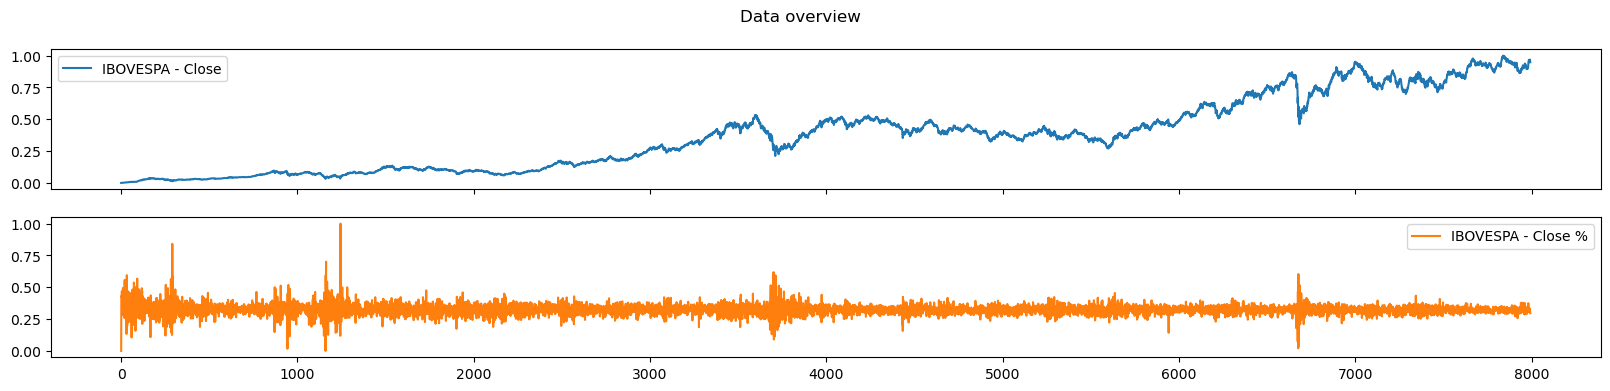

In [13]:
df_x_values.plot(subplots=True, figsize=(20, 2*len(df_x_values.columns)), title="Data overview") 

array([<Axes: >, <Axes: >], dtype=object)

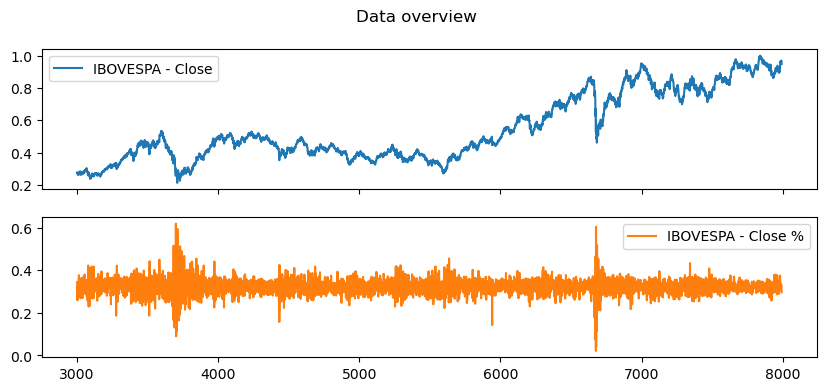

In [14]:
df_x_values[3000:].plot(subplots=True, figsize=(10, 2*len(df_x_values.columns)), title="Data overview") 

In [15]:
imported_df_cpy = imported_df.copy()
# remove the first column (index)
imported_df_cpy.reset_index(inplace=True)
# find date (index) of the 3050th row
print(imported_df_cpy.loc[3700, 'index'])
print(imported_df_cpy.loc[4860, 'index'])

2008-10-13
2013-03-27


Dividir os dados em treino e teste

In [16]:
valid_indexes = pd.read_csv('data/2 - processed/valid_indexes.csv', index_col=0)
valid_indexes.head()
# find the first valid date for each column
# the index is the column name and the value is the value in "First Valid Index" column
valid_indexes_dict = valid_indexes.to_dict()['First Valid Index']
valid_indexes_dict

{'IBOVESPA - Close': '1994-01-03',
 'IBOVESPA - High': '1994-01-03',
 'IBOVESPA - Low': '1994-01-03',
 'IBOVESPA - Open': '1994-01-03',
 'Dólar - Close': '2003-12-01',
 'Dólar - High': '2003-12-01',
 'Dólar - Low': '2003-12-01',
 'Dólar - Open': '2003-12-01',
 'Dow Jones - Close': '1994-01-03',
 'Dow Jones - High': '1994-01-03',
 'Dow Jones - Low': '1994-01-03',
 'Dow Jones - Open': '1994-01-03',
 'S&P 500 - Close': '1994-01-03',
 'S&P 500 - High': '1994-01-03',
 'S&P 500 - Low': '1994-01-03',
 'S&P 500 - Open': '1994-01-03',
 'Nasdaq - Close': '1994-01-03',
 'Nasdaq - High': '1994-01-03',
 'Nasdaq - Low': '1994-01-03',
 'Nasdaq - Open': '1994-01-03',
 'Shanghai SE - Close': '1997-07-02',
 'Shanghai SE - High': '1997-07-02',
 'Shanghai SE - Low': '1997-07-02',
 'Shanghai SE - Open': '1997-07-02',
 'Nikkei - Close': '1994-01-04',
 'Nikkei - High': '1994-01-04',
 'Nikkei - Low': '1994-01-04',
 'Nikkei - Open': '1994-01-04',
 'HanSeng Index - Close': '1994-01-03',
 'HanSeng Index - High':

In [17]:
if START_ON_FIRST_VALID_DATE:
    # get valid indexes 
    valid_indexes = pd.read_csv('data/2 - processed/valid_indexes.csv', index_col=0)
    valid_indexes_dict = valid_indexes.to_dict()['First Valid Index']
    valid_indexes_dict
    biggest_valid_index = min(valid_indexes_dict.values())
    for col in df_x_values.columns:
        # get the first valid index for each column
        first_valid_index = valid_indexes_dict[col]
        # check if the first valid index is greater than the biggest valid index
        if first_valid_index > biggest_valid_index:
            biggest_valid_index = first_valid_index
    # filter the dataframe to start on the first valid index, first finding the numeric index searching imported_df
    imported_df_cp = imported_df.copy()
    # reset the index
    imported_df_cp.reset_index(inplace=True)
    # find the first valid index
    first_valid_index = imported_df_cp[imported_df_cp['index'] == biggest_valid_index].index[0]
    print(f"First valid index: {first_valid_index}")

if START_DATE is not None:
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # find the index of the START_DATE
    start_index = imported_df_cp[imported_df_cp['index'] == START_DATE].index[0]

if END_DATE is not None:
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # find the index of the END_DATE
    end_index = imported_df_cp[imported_df_cp['index'] == END_DATE].index[0]

# crop the dataframe to start on the first valid index
if START_ON_FIRST_VALID_DATE and START_DATE is not None:
    if first_valid_index > start_index:
        # crop the dataframe to start on the first valid index
        df_x_values = df_x_values[first_valid_index:]
    else:
        # crop the dataframe to start on the START_DATE
        df_x_values = df_x_values[start_index:]
elif START_ON_FIRST_VALID_DATE:
    # crop the dataframe to start on the first valid index
    df_x_values = df_x_values[first_valid_index:]
elif START_DATE is not None:
    # crop the dataframe to start on the START_DATE
    df_x_values = df_x_values[start_index:]

# crop the dataframe to end on the END_DATE
if END_DATE is not None:
    # crop the dataframe to end on the END_DATE
    df_x_values = df_x_values[:end_index]
    # crop imported_df_cp to end on the END_DATE
    imported_df_cp = imported_df_cp[:end_index]

# calculate de size of training, validation and testing data
if TYPE_OF_UNIT == "percentual":
    train_size = int(len(df_x_values) * TRAINING_SIZE)
    validation_size = int(len(df_x_values) * VALIDATION_SIZE)
    test_size = int(len(df_x_values) * TESTING_SIZE)
elif TYPE_OF_UNIT == "days":
    train_size = TRAINING_SIZE
    validation_size = VALIDATION_SIZE
    test_size = TESTING_SIZE
elif TYPE_OF_UNIT == "weeks":
    train_size = TRAINING_SIZE * 7
    validation_size = VALIDATION_SIZE * 7
    test_size = TESTING_SIZE * 7
elif TYPE_OF_UNIT == "months":
    train_size = TRAINING_SIZE * 30
    validation_size = VALIDATION_SIZE * 30
    test_size = TESTING_SIZE * 30
elif TYPE_OF_UNIT == "customDays":
    # if iported_df_cp is not defined, define it
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # if TRAINING_SIZE is not in imported_df_cp, find the next closest date
    if TRAINING_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > TRAINING_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Training date not found. Closest date to {TRAINING_SIZE} is {closest_date}")
        # set TRAINING_SIZE to the closest date
        TRAINING_SIZE = closest_date
    # if VALIDATION_SIZE is not in imported_df_cp, find the next closest date
    if VALIDATION_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > VALIDATION_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Validation date not found. Closest date to {VALIDATION_SIZE} is {closest_date}")
        # set VALIDATION_SIZE to the closest date
        VALIDATION_SIZE = closest_date
    # if TESTING_SIZE is not in imported_df_cp, find the next closest date
    if TESTING_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > TESTING_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Testing date not found. Closest date to {TESTING_SIZE} is {closest_date}")
        # set TESTING_SIZE to the closest date
        TESTING_SIZE = closest_date
    
    # if VALIDATION_SIZE is not in imported_df_cp, throw error
    # get the index of TRAINING_SIZE date
    train_index = imported_df_cp[imported_df_cp['index'] == TRAINING_SIZE].index[0]
    # get the index of VALIDATION_SIZE date
    validation_index = imported_df_cp[imported_df_cp['index'] == VALIDATION_SIZE].index[0]
    # get the index of TESTING_SIZE date
    test_index = imported_df_cp[imported_df_cp['index'] == TESTING_SIZE].index[0] 
    # throw error if some of the indexes is not valid
    if train_index < 0 or validation_index < 0 or test_index < 0:
        raise ValueError("Some of the indexes are not valid.")
    # thow error if the indexes are not in the same order
    if train_index > validation_index or validation_index > test_index:
        raise ValueError("The indexes are not in the same order.")
    # calculate the size of the training, validation and testing data
    train_size = len(imported_df_cp[train_index:validation_index])
    validation_size = len(imported_df_cp[validation_index:test_index])
    test_size = len(imported_df_cp[test_index:])
else:
    raise ValueError("Invalid type_of_unit. Must be 'days', 'weeks', 'months' or 'percentual'.")

if START_ON_FIRST_VALID_DATE:
    # if train_size+validation_size+test_size is greater than the size of the dataframe, adjust train_size
    # to be the size of the dataframe minus validation_size and test_size
    if train_size + validation_size + test_size > len(df_x_values):
        # adjust train_size to be the size of the dataframe minus validation_size and test_size
        train_size = len(df_x_values) - validation_size - test_size
        print(f"Adjusted train size: {train_size}")
    # check if train_size is less than 0
    if train_size < 0:
        raise ValueError("Train size is less than 0. Please check the sizes of the data.")

# check if sum of sizes is less than the size of the dataframe
if train_size + validation_size + test_size > len(df_x_values):
    raise ValueError("Sum of train, validate and test sizes is greater than the size of the dataframe.")

# create the train, validation and test dataframes
train_df = df_x_values[-(train_size + test_size + validation_size):-(test_size + validation_size)]
val_df = df_x_values[-(test_size + validation_size):-test_size]
test_df = df_x_values[-(test_size):]

# check the size of the data
print(f"Training data size: {len(train_df)}")
print(f"Validating data size: {len(val_df)}")
print(f"Testing data size: {len(test_df)}")


First valid index: 1
Validation date not found. Closest date to 2023-10-01 is 2023-10-02
Adjusted train size: 7602
Training data size: 7602
Validating data size: 261
Testing data size: 129


array([<Axes: >, <Axes: >], dtype=object)

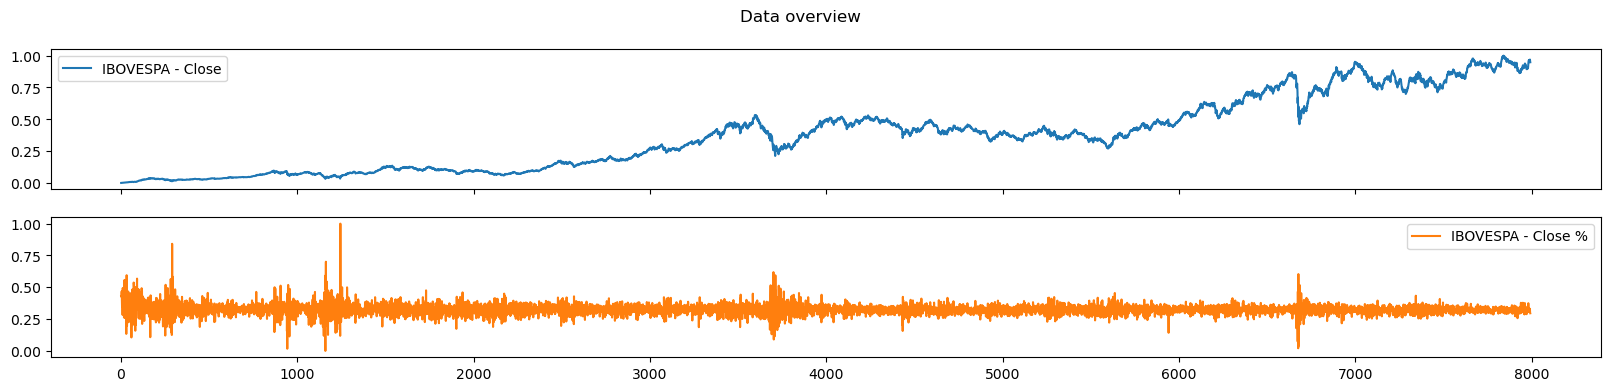

In [18]:
df_x_values.plot(subplots=True, figsize=(20, 2*len(df_x_values.columns)), title="Data overview") 

In [19]:
len(train_df), len(val_df), len(test_df), len(df_x_values)

(7602, 261, 129, 7992)

Criar a classe/função geradora das janelas

In [20]:
class WindowGenerator():
  def __init__(self, INPUT_WINDOW_SIZE, label_width, shift,
               train_df=train_df, val_df=val_df, test_df=test_df,
               label_columns=None):
    # Store the raw data.
    self.train_df = train_df
    self.val_df = val_df
    self.test_df = test_df

    # Work out the label column indices.
    self.label_columns = label_columns
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
    self.column_indices = {name: i for i, name in
                           enumerate(train_df.columns)}

    # Work out the window parameters.
    self.INPUT_WINDOW_SIZE = INPUT_WINDOW_SIZE
    self.label_width = label_width
    self.shift = shift

    self.total_window_size = INPUT_WINDOW_SIZE + shift

    self.input_slice = slice(0, INPUT_WINDOW_SIZE)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])
  
  def split_window(self, features):
    inputs = features[:, self.input_slice, :]
    labels = features[:, self.labels_slice, :]
    if self.label_columns is not None:
      labels = tf.stack(
          [labels[:, :, self.column_indices[name]] for name in self.label_columns],
          axis=-1)

    # Slicing doesn't preserve static shape information, so set the shapes
    # manually. This way the `tf.data.Datasets` are easier to inspect.
    inputs.set_shape([None, self.INPUT_WINDOW_SIZE, None])
    labels.set_shape([None, self.label_width, None])

    return inputs, labels

  def plot(self, model=None, plot_col='IBOVESPA - Close', max_subplots=3):
    inputs, labels = self.example
    plt.figure(figsize=(12, 8))
    plot_col_index = self.column_indices[plot_col]
    max_n = min(max_subplots, len(inputs))
    for i in range(max_n):
      n = i#random.randint(0, len(inputs)-1)
      plt.subplot(max_n, 1, i+1)
      plt.ylabel(f'{plot_col} ({n}) [normed]')
      plt.plot(self.input_indices, inputs[n, :, plot_col_index],
              label='Inputs', marker='.', zorder=-10)

      if self.label_columns:
        label_col_index = self.label_columns_indices.get(plot_col, None)
      else:
        label_col_index = plot_col_index

      if label_col_index is None:
        continue

      plt.scatter(self.label_indices, labels[n, :, label_col_index],
                  edgecolors='k', label='Labels', c='#2ca02c', s=64)
      if model is not None:
        predictions = model(inputs)
        plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                    marker='X', edgecolors='k', label='Predictions',
                    c='#ff7f0e', s=64)

      if n == 0:
        plt.legend()

    plt.xlabel('Time [day]')

  def make_dataset(self, data):
    data = np.array(data, dtype=np.float32)
    ds = tf.keras.utils.timeseries_dataset_from_array(
        data=data,
        targets=None,
        sequence_length=self.total_window_size,
        sequence_stride=1,
        shuffle=False,
        # shuffle=True,
        seed=RANDOM_SEED,
        batch_size=BATCH_SIZE,)

    ds = ds.map(self.split_window)

    return ds

  @property
  def train(self):
    return self.make_dataset(self.train_df)

  @property
  def val(self):
    return self.make_dataset(self.val_df)

  @property
  def test(self):
    return self.make_dataset(self.test_df)
  
  @property
  def example(self):
    """Get and cache an example batch of `inputs, labels` for plotting."""
    result = getattr(self, '_example', None)
    if result is None:
      # No example batch was found, so get one from the `.train` dataset
      result = next(iter(self.test))
      # And cache it for next time
      self._example = result
    return result

Criar função de erro customizado, aumentando o peso de previsões na direção incorreta

In [21]:
import keras.backend as K
import tensorflow as tf

def custom_loss(y_true, y_pred):
    threshold = 0.5955062488  # Define the threshold

    # Calculate the error between the true and predicted values
    error = y_true - y_pred
    
    # Determine the direction (increase or decrease) for both true and predicted values
    true_direction = tf.cast(tf.greater(y_true, threshold), tf.float32)  # 1 if true value is above threshold (increase), 0 if below (decrease)
    pred_direction = tf.cast(tf.greater(y_pred, threshold), tf.float32)  # 1 if predicted value is above threshold (increase), 0 if below (decrease)
    
    # Check for mismatches: wrong direction between true and predicted
    direction_mismatch = tf.abs(true_direction - pred_direction)  # 1 if directions mismatch, 0 if they match
    
    # Calculate the weighted error: apply a higher penalty when directions mismatch
    loss = tf.square(error) * (1 + MISMATCH_PENALITY * direction_mismatch)  # 5x penalty for mismatch, adjust factor as needed
    
    # Return the mean of the loss over all samples
    return tf.reduce_mean(loss)


Total window size: 5
Input indices: [0 1 2 3]
Label indices: [4]
Label column name(s): ['IBOVESPA - Close']

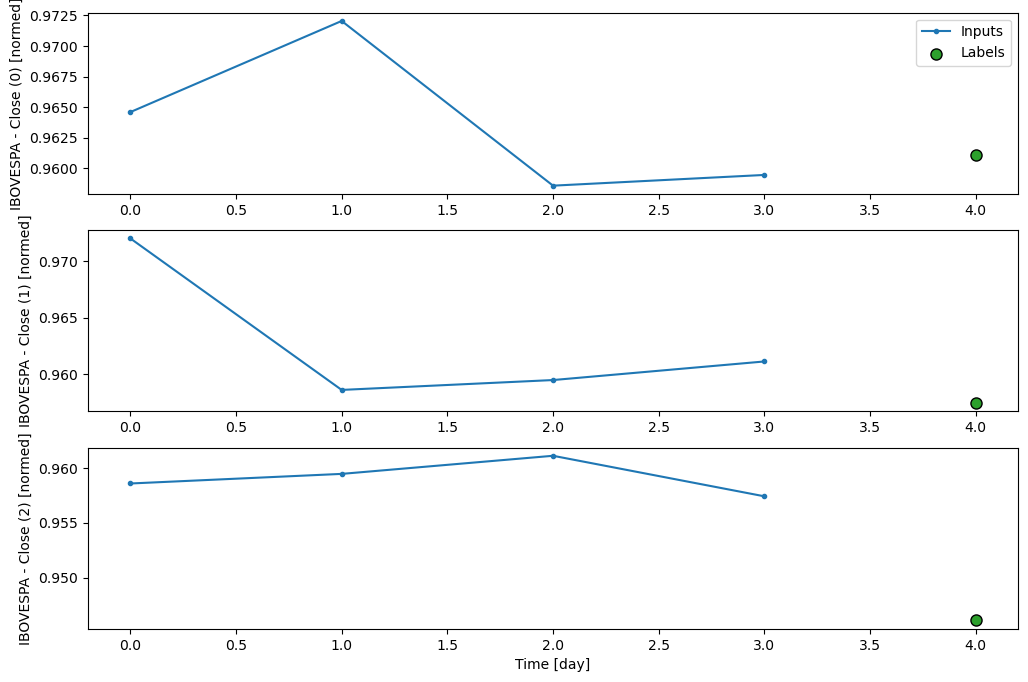

In [22]:
multi_window = WindowGenerator(INPUT_WINDOW_SIZE=INPUT_WINDOW_SIZE,
                               label_width=OUTPUT_WINDOW_SIZE,
                               shift=OUTPUT_WINDOW_SIZE, label_columns=[COLUMN_TO_PREDICT])

multi_window.plot(plot_col=COLUMN_TO_PREDICT)
multi_window

Criação da função de treino da rede

In [23]:
# Define the Required Callback Function
class printlearningrate(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        optimizer = self.model.optimizer
        lr = tf.keras.backend.eval(optimizer.learning_rate)
        # lr = tf.keras.backend.eval(optimizer.lr)
        Epoch_count = epoch + 1
        print(f"\nEpoch: {Epoch_count} - LR: {lr}")
        return lr

In [24]:
def compile_and_fit(model, window, PATIENCE=2, MAX_EPOCHS=150, LEARNING_RATE=0.00001):
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=PATIENCE,
                                                    mode='min')
  
  # optimizer using learning rate schedule 
  lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=LEARNING_RATE,
    decay_steps=DECAY_STEPS,
    decay_rate=LEARNING_DECAY)

  # config optimizer
  optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)

  # opitimizer AdamW
  # optimizer = tf.keras.optimizers.AdamW(learning_rate=LEARNING_RATE) # weight_decay=0.004
  # optimizer =  tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE, weight_decay=0.004)

  # optimizer =  tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE, weight_decay=1e-6)
  
  def scheduler(epoch, lr):
    decay = LEARNING_DECAY
    decayEveryEpochs = DECAY_EVERY_EPOCHS
    iterations = epoch // decayEveryEpochs
    optimizer = model.optimizer
    # return tf.keras.backend.eval(optimizer.learning_rate)
    # decay by 0.1 every 5 epochs; use `% 1` to decay after each epoch
    if (epoch % decayEveryEpochs == 0) and (epoch != 0):
        lr = lr * (1 - decay)
        lr = lr * (1. / (1. + decay * iterations))
    print(f"Epoch: {epoch} - Learning rate: {optimizer.learning_rate} - LR: {lr}")
    return lr
    return tf.keras.backend.eval(optimizer.learning_rate)
  
  printlr = printlearningrate() 
  updatelr = tf.keras.callbacks.LearningRateScheduler(scheduler)
  
  # config loss function
  if LOSS_FUNCTION == 'MAE':
    loss_function = tf.keras.losses.MeanAbsoluteError()
  elif LOSS_FUNCTION == 'MSE':
    loss_function = tf.keras.losses.MeanSquaredError()
  # elif LOSS_FUNCTION == 'CUSTOM':
  #   loss_function = custom_loss

  # model.compile(loss=tf.keras.losses.MeanAbsoluteError(),
  # model.compile(loss=tf.keras.losses.MeanSquaredError(),
  # model.compile(loss=custom_loss,
  model.compile(
                loss=loss_function,
                optimizer=optimizer,
                metrics=[
                  tf.keras.metrics.MeanAbsoluteError(),
                  tf.keras.metrics.MeanSquaredError(),
                  tf.keras.metrics.MeanAbsolutePercentageError(),
                  tf.keras.metrics.RootMeanSquaredError(),
                  # tf.keras.metrics.R2Score()
                  ]
              )

  history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val,
                      callbacks=[printlr,early_stopping]) # updatelr])
  return history

Definir modelo da rede e realizar o treinamento

In [25]:
multi_window.train

<_MapDataset element_spec=(TensorSpec(shape=(None, 4, 2), dtype=tf.float32, name=None), TensorSpec(shape=(None, 1, 1), dtype=tf.float32, name=None))>

# Definir modelos

In [26]:
num_features = df_x_values.shape[1]

num_features

2

In [27]:
def get_model():
    if NUM_FEATURES is not None:
        num_features = NUM_FEATURES
    else:
        num_features = df_x_values.shape[1]
    
    if MODEL_TO_USE == 1:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(50, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model
    
    elif MODEL_TO_USE == 2:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(50, return_sequences=True), 
                    tf.keras.layers.LSTM(50, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model
    
    elif MODEL_TO_USE == 3:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(100, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model

Calculate metrics

In [28]:
# create dataframe for "hard" predictions
def create_df_repeat_prediction(data):        
    # predictions = data[COLUMN_TO_PREDICT].values[:-1]
    # labels = data[COLUMN_TO_PREDICT].values[1:]
    predictions, labels = None, None
    for part in iter(data):
        # print(part)
        if predictions is None:
            labels = part[1]
        else:
            labels = np.concatenate((labels, part[1]), axis=0)
    labels = labels[:, :, 0]
    # convert labels to 1D array
    # print(labels.shape)
    # print(labels)
    predictions = labels
    for i, label in enumerate(labels[:-1]):
        # if i == 3:
        #     break
        for j in range(len(label)):
            # replace values of predictions[i] with the first value of label
            predictions = tf.tensor_scatter_nd_update(
                predictions, 
                [[i, j]], 
                [label[0]]
            )
        # print(f"Label {i}: {label}")
        # print(f"Prediction {i}: {predictions[i]}")
    predictions = predictions[:-1]    
    labels = labels[1:]
    return {"predictions": predictions, "labels": labels}
    predictions_df = pd.DataFrame({"predictions": predictions, "labels": labels})
    predictions_df = predictions_df.dropna()
    return predictions_df

In [29]:
def make_repeat_predictions_metrics(data):
    predictions = create_df_repeat_prediction(data)
    mae = tf.keras.metrics.MeanAbsoluteError()
    mae.update_state(predictions["labels"], predictions["predictions"])
    mse = tf.keras.metrics.MeanSquaredError()
    mse.update_state(predictions["labels"], predictions["predictions"])
    mape = tf.keras.metrics.MeanAbsolutePercentageError()
    mape.update_state(predictions["labels"], predictions["predictions"])
    rmse = tf.keras.metrics.RootMeanSquaredError()
    rmse.update_state(predictions["labels"], predictions["predictions"])
    print(f"MAE: {mae.result()} - MSE: {mse.result()} - MAPE: {mape.result()} - RMSE: {rmse.result()}")
    return {
            "Loss": None,
            "MAE": float(mae.result()),
            "MSE": float(mse.result()),
            "MAPE": float(mape.result()),
            "RMSE": float(rmse.result()),
        }


In [30]:
def make_model_predictions_metrics(model, data):
    loss, mae, mse, mape, rmse = model.evaluate(data)
    print(f"Loss: {loss} - MAE: {mae} - MSE: {mse} - MAPE: {mape} - RMSE: {rmse}")
    return {
            "Loss": loss,
            "MAE": mae,
            "MSE": mse,
            "MAPE": mape,
            "RMSE": rmse,
        }

Treinar modelos

In [31]:
# record start time
training_start = time.time()

model = get_model()

history = compile_and_fit(model, multi_window, PATIENCE, MAX_EPOCHS, LEARNING_RATE)

# record end time
training_end = time.time()

Epoch 1/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 9:16 2s/step - loss: 0.0030 - mean_absolute_error: 0.0030 - mean_absolute_percentage_error: 100.0000 - mean_squared_error: 1.0882e-05 - root_mean_squared_error: 0.0033

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 110.0480 - mean_squared_error: 2.3705e-04 - root_mean_squared_error: 0.0146 

 18/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 92.5710 - mean_squared_error: 2.3990e-04 - root_mean_squared_error: 0.0151 

 27/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 78.1506 - mean_squared_error: 2.1543e-04 - root_mean_squared_error: 0.0143

 36/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 68.5711 - mean_squared_error: 2.0592e-04 - root_mean_squared_error: 0.0141

 43/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 63.4777 - mean_squared_error: 2.0614e-04 - root_mean_squared_error: 0.0141

 51/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 59.0197 - mean_squared_error: 2.1488e-04 - root_mean_squared_error: 0.0144

 59/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 55.3419 - mean_squared_error: 2.2323e-04 - root_mean_squared_error: 0.0147

 69/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 51.5827 - mean_squared_error: 2.3030e-04 - root_mean_squared_error: 0.0150

 79/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 48.6302 - mean_squared_error: 2.3877e-04 - root_mean_squared_error: 0.0153

 88/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 46.4518 - mean_squared_error: 2.5190e-04 - root_mean_squared_error: 0.0157

 98/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 44.3503 - mean_squared_error: 2.6937e-04 - root_mean_squared_error: 0.0162

107/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 42.7375 - mean_squared_error: 3.0901e-04 - root_mean_squared_error: 0.0171

117/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 41.1762 - mean_squared_error: 3.8046e-04 - root_mean_squared_error: 0.0185

126/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 39.9753 - mean_squared_error: 4.8091e-04 - root_mean_squared_error: 0.0202

136/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 38.8598 - mean_squared_error: 6.9488e-04 - root_mean_squared_error: 0.0230

145/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0184 - mean_absolute_error: 0.0184 - mean_absolute_percentage_error: 37.9350 - mean_squared_error: 8.6722e-04 - root_mean_squared_error: 0.0252

155/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0197 - mean_absolute_error: 0.0197 - mean_absolute_percentage_error: 36.9768 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0274    

165/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0208 - mean_absolute_error: 0.0208 - mean_absolute_percentage_error: 36.0797 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0292

173/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0216 - mean_absolute_error: 0.0216 - mean_absolute_percentage_error: 35.4023 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0305

181/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0223 - mean_absolute_error: 0.0223 - mean_absolute_percentage_error: 34.7676 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0317

191/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0232 - mean_absolute_error: 0.0232 - mean_absolute_percentage_error: 34.0349 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0330

200/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0240 - mean_absolute_error: 0.0240 - mean_absolute_percentage_error: 33.4204 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0342

209/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0247 - mean_absolute_error: 0.0247 - mean_absolute_percentage_error: 32.8388 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0353

218/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0256 - mean_absolute_error: 0.0256 - mean_absolute_percentage_error: 32.3106 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0368

227/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0265 - mean_absolute_error: 0.0265 - mean_absolute_percentage_error: 31.8096 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0382

236/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0273 - mean_absolute_error: 0.0273 - mean_absolute_percentage_error: 31.3257 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0394


Epoch: 1 - LR: 0.009752360172569752
238/238 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 0.0276 - mean_absolute_error: 0.0276 - mean_absolute_percentage_error: 31.1684 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0398 - val_loss: 0.0622 - val_mean_absolute_error: 0.0622 - val_mean_absolute_percentage_error: 6.6171 - val_mean_squared_error: 0.0047 - val_root_mean_squared_error: 0.0686


Epoch 2/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 0.7174 - mean_absolute_error: 0.7174 - mean_absolute_percentage_error: 30963.3672 - mean_squared_error: 0.5147 - root_mean_squared_error: 0.7174

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.6884 - mean_absolute_error: 0.6884 - mean_absolute_percentage_error: 13017.5674 - mean_squared_error: 0.4771 - root_mean_squared_error: 0.6901 

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.5750 - mean_absolute_error: 0.5750 - mean_absolute_percentage_error: 8746.9023 - mean_squared_error: 0.3780 - root_mean_squared_error: 0.6080 

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.4880 - mean_absolute_error: 0.4880 - mean_absolute_percentage_error: 6884.5728 - mean_squared_error: 0.3133 - root_mean_squared_error: 0.5469

 39/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.4191 - mean_absolute_error: 0.4191 - mean_absolute_percentage_error: 5629.9629 - mean_squared_error: 0.2644 - root_mean_squared_error: 0.4964

 48/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.3734 - mean_absolute_error: 0.3734 - mean_absolute_percentage_error: 4867.3081 - mean_squared_error: 0.2328 - root_mean_squared_error: 0.4614

 58/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.3345 - mean_absolute_error: 0.3345 - mean_absolute_percentage_error: 4250.1201 - mean_squared_error: 0.2063 - root_mean_squared_error: 0.4302

 67/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3068 - mean_absolute_error: 0.3068 - mean_absolute_percentage_error: 3826.2651 - mean_squared_error: 0.1876 - root_mean_squared_error: 0.4072

 76/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2839 - mean_absolute_error: 0.2839 - mean_absolute_percentage_error: 3486.8555 - mean_squared_error: 0.1723 - root_mean_squared_error: 0.3877

 85/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2647 - mean_absolute_error: 0.2647 - mean_absolute_percentage_error: 3208.1479 - mean_squared_error: 0.1596 - root_mean_squared_error: 0.3708

 95/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2467 - mean_absolute_error: 0.2467 - mean_absolute_percentage_error: 2951.0476 - mean_squared_error: 0.1477 - root_mean_squared_error: 0.3545

104/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2328 - mean_absolute_error: 0.2328 - mean_absolute_percentage_error: 2755.6733 - mean_squared_error: 0.1386 - root_mean_squared_error: 0.3416

114/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2195 - mean_absolute_error: 0.2195 - mean_absolute_percentage_error: 2569.5486 - mean_squared_error: 0.1298 - root_mean_squared_error: 0.3289

123/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2095 - mean_absolute_error: 0.2095 - mean_absolute_percentage_error: 2424.3726 - mean_squared_error: 0.1230 - root_mean_squared_error: 0.3189

133/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1998 - mean_absolute_error: 0.1998 - mean_absolute_percentage_error: 2282.9634 - mean_squared_error: 0.1164 - root_mean_squared_error: 0.3089

142/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1920 - mean_absolute_error: 0.1920 - mean_absolute_percentage_error: 2170.3787 - mean_squared_error: 0.1110 - root_mean_squared_error: 0.3007

151/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1851 - mean_absolute_error: 0.1851 - mean_absolute_percentage_error: 2069.3977 - mean_squared_error: 0.1062 - root_mean_squared_error: 0.2932

160/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1787 - mean_absolute_error: 0.1787 - mean_absolute_percentage_error: 1978.2471 - mean_squared_error: 0.1019 - root_mean_squared_error: 0.2862

170/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1723 - mean_absolute_error: 0.1723 - mean_absolute_percentage_error: 1886.7917 - mean_squared_error: 0.0975 - root_mean_squared_error: 0.2790

179/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1669 - mean_absolute_error: 0.1669 - mean_absolute_percentage_error: 1812.0809 - mean_squared_error: 0.0939 - root_mean_squared_error: 0.2731

189/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1616 - mean_absolute_error: 0.1616 - mean_absolute_percentage_error: 1736.3539 - mean_squared_error: 0.0902 - root_mean_squared_error: 0.2669

199/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1568 - mean_absolute_error: 0.1568 - mean_absolute_percentage_error: 1667.2827 - mean_squared_error: 0.0868 - root_mean_squared_error: 0.2612

208/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1527 - mean_absolute_error: 0.1527 - mean_absolute_percentage_error: 1610.0748 - mean_squared_error: 0.0841 - root_mean_squared_error: 0.2564

218/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1486 - mean_absolute_error: 0.1486 - mean_absolute_percentage_error: 1551.3693 - mean_squared_error: 0.0812 - root_mean_squared_error: 0.2514

227/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1453 - mean_absolute_error: 0.1453 - mean_absolute_percentage_error: 1502.4133 - mean_squared_error: 0.0788 - root_mean_squared_error: 0.2472

232/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1435 - mean_absolute_error: 0.1435 - mean_absolute_percentage_error: 1476.6521 - mean_squared_error: 0.0776 - root_mean_squared_error: 0.2450


Epoch: 2 - LR: 0.009510851465165615
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1412 - mean_absolute_error: 0.1412 - mean_absolute_percentage_error: 1442.1825 - mean_squared_error: 0.0759 - root_mean_squared_error: 0.2420 - val_loss: 0.0429 - val_mean_absolute_error: 0.0429 - val_mean_absolute_percentage_error: 4.5622 - val_mean_squared_error: 0.0023 - val_root_mean_squared_error: 0.0479


Epoch 3/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.4686 - mean_absolute_error: 0.4686 - mean_absolute_percentage_error: 20209.0234 - mean_squared_error: 0.2196 - root_mean_squared_error: 0.4686

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.4558 - mean_absolute_error: 0.4558 - mean_absolute_percentage_error: 8514.4307 - mean_squared_error: 0.2083 - root_mean_squared_error: 0.4562  

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.4043 - mean_absolute_error: 0.4043 - mean_absolute_percentage_error: 5813.8677 - mean_squared_error: 0.1745 - root_mean_squared_error: 0.4150

 30/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.3475 - mean_absolute_error: 0.3475 - mean_absolute_percentage_error: 4515.5938 - mean_squared_error: 0.1452 - root_mean_squared_error: 0.3746

 39/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.3077 - mean_absolute_error: 0.3077 - mean_absolute_percentage_error: 3795.9924 - mean_squared_error: 0.1261 - root_mean_squared_error: 0.3459

 48/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2772 - mean_absolute_error: 0.2772 - mean_absolute_percentage_error: 3293.9224 - mean_squared_error: 0.1119 - root_mean_squared_error: 0.3230

 58/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2506 - mean_absolute_error: 0.2506 - mean_absolute_percentage_error: 2885.0625 - mean_squared_error: 0.0997 - root_mean_squared_error: 0.3023

 68/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2291 - mean_absolute_error: 0.2291 - mean_absolute_percentage_error: 2575.1775 - mean_squared_error: 0.0901 - root_mean_squared_error: 0.2852

 78/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2114 - mean_absolute_error: 0.2114 - mean_absolute_percentage_error: 2331.2756 - mean_squared_error: 0.0824 - root_mean_squared_error: 0.2708

 87/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1981 - mean_absolute_error: 0.1981 - mean_absolute_percentage_error: 2151.8088 - mean_squared_error: 0.0766 - root_mean_squared_error: 0.2597

 96/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1866 - mean_absolute_error: 0.1866 - mean_absolute_percentage_error: 2000.5862 - mean_squared_error: 0.0717 - root_mean_squared_error: 0.2498

105/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1766 - mean_absolute_error: 0.1766 - mean_absolute_percentage_error: 1871.2056 - mean_squared_error: 0.0674 - root_mean_squared_error: 0.2411

114/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1678 - mean_absolute_error: 0.1678 - mean_absolute_percentage_error: 1759.0941 - mean_squared_error: 0.0637 - root_mean_squared_error: 0.2332

123/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1600 - mean_absolute_error: 0.1600 - mean_absolute_percentage_error: 1660.9349 - mean_squared_error: 0.0604 - root_mean_squared_error: 0.2262

133/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1526 - mean_absolute_error: 0.1526 - mean_absolute_percentage_error: 1565.1859 - mean_squared_error: 0.0572 - root_mean_squared_error: 0.2191

142/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1466 - mean_absolute_error: 0.1466 - mean_absolute_percentage_error: 1488.8734 - mean_squared_error: 0.0546 - root_mean_squared_error: 0.2133

151/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1412 - mean_absolute_error: 0.1412 - mean_absolute_percentage_error: 1420.3516 - mean_squared_error: 0.0522 - root_mean_squared_error: 0.2079

160/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1362 - mean_absolute_error: 0.1362 - mean_absolute_percentage_error: 1358.4460 - mean_squared_error: 0.0501 - root_mean_squared_error: 0.2030

170/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1312 - mean_absolute_error: 0.1312 - mean_absolute_percentage_error: 1296.2808 - mean_squared_error: 0.0480 - root_mean_squared_error: 0.1979

179/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1270 - mean_absolute_error: 0.1270 - mean_absolute_percentage_error: 1245.4564 - mean_squared_error: 0.0462 - root_mean_squared_error: 0.1937

188/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1232 - mean_absolute_error: 0.1232 - mean_absolute_percentage_error: 1198.8440 - mean_squared_error: 0.0446 - root_mean_squared_error: 0.1897

197/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1197 - mean_absolute_error: 0.1197 - mean_absolute_percentage_error: 1155.9194 - mean_squared_error: 0.0431 - root_mean_squared_error: 0.1860

206/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1165 - mean_absolute_error: 0.1165 - mean_absolute_percentage_error: 1116.2462 - mean_squared_error: 0.0417 - root_mean_squared_error: 0.1825

215/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1135 - mean_absolute_error: 0.1135 - mean_absolute_percentage_error: 1079.4612 - mean_squared_error: 0.0404 - root_mean_squared_error: 0.1793

224/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1107 - mean_absolute_error: 0.1107 - mean_absolute_percentage_error: 1045.2550 - mean_squared_error: 0.0392 - root_mean_squared_error: 0.1762

233/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1082 - mean_absolute_error: 0.1082 - mean_absolute_percentage_error: 1013.3552 - mean_squared_error: 0.0381 - root_mean_squared_error: 0.1733


Epoch: 3 - LR: 0.009275324642658234
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1066 - mean_absolute_error: 0.1066 - mean_absolute_percentage_error: 993.2612 - mean_squared_error: 0.0374 - root_mean_squared_error: 0.1715 - val_loss: 0.0281 - val_mean_absolute_error: 0.0281 - val_mean_absolute_percentage_error: 3.1060 - val_mean_squared_error: 0.0010 - val_root_mean_squared_error: 0.0318


Epoch 4/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.2186 - mean_absolute_error: 0.2186 - mean_absolute_percentage_error: 9403.3945 - mean_squared_error: 0.0478 - root_mean_squared_error: 0.2186

 11/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1866 - mean_absolute_error: 0.1866 - mean_absolute_percentage_error: 3667.2603 - mean_squared_error: 0.0372 - root_mean_squared_error: 0.1915 

 21/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1547 - mean_absolute_error: 0.1547 - mean_absolute_percentage_error: 2496.0940 - mean_squared_error: 0.0284 - root_mean_squared_error: 0.1653

 31/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1321 - mean_absolute_error: 0.1321 - mean_absolute_percentage_error: 1938.0297 - mean_squared_error: 0.0231 - root_mean_squared_error: 0.1471

 40/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1170 - mean_absolute_error: 0.1170 - mean_absolute_percentage_error: 1629.1049 - mean_squared_error: 0.0199 - root_mean_squared_error: 0.1351

 50/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1043 - mean_absolute_error: 0.1043 - mean_absolute_percentage_error: 1393.2184 - mean_squared_error: 0.0173 - root_mean_squared_error: 0.1248

 59/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0954 - mean_absolute_error: 0.0954 - mean_absolute_percentage_error: 1237.5465 - mean_squared_error: 0.0155 - root_mean_squared_error: 0.1173

 68/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0881 - mean_absolute_error: 0.0881 - mean_absolute_percentage_error: 1116.2129 - mean_squared_error: 0.0141 - root_mean_squared_error: 0.1111

 77/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0819 - mean_absolute_error: 0.0819 - mean_absolute_percentage_error: 1018.6810 - mean_squared_error: 0.0130 - root_mean_squared_error: 0.1058

 85/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0773 - mean_absolute_error: 0.0773 - mean_absolute_percentage_error: 946.5835 - mean_squared_error: 0.0121 - root_mean_squared_error: 0.1017 

 92/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0737 - mean_absolute_error: 0.0737 - mean_absolute_percentage_error: 892.1762 - mean_squared_error: 0.0115 - root_mean_squared_error: 0.0985

101/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0696 - mean_absolute_error: 0.0696 - mean_absolute_percentage_error: 831.6241 - mean_squared_error: 0.0107 - root_mean_squared_error: 0.0949

110/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0660 - mean_absolute_error: 0.0660 - mean_absolute_percentage_error: 779.5164 - mean_squared_error: 0.0101 - root_mean_squared_error: 0.0916

120/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0626 - mean_absolute_error: 0.0626 - mean_absolute_percentage_error: 729.4704 - mean_squared_error: 0.0095 - root_mean_squared_error: 0.0883

129/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0599 - mean_absolute_error: 0.0599 - mean_absolute_percentage_error: 690.1323 - mean_squared_error: 0.0090 - root_mean_squared_error: 0.0857

139/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0573 - mean_absolute_error: 0.0573 - mean_absolute_percentage_error: 651.5699 - mean_squared_error: 0.0085 - root_mean_squared_error: 0.0831

148/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0551 - mean_absolute_error: 0.0551 - mean_absolute_percentage_error: 620.7077 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0809

157/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0532 - mean_absolute_error: 0.0532 - mean_absolute_percentage_error: 592.9029 - mean_squared_error: 0.0078 - root_mean_squared_error: 0.0789

166/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0514 - mean_absolute_error: 0.0514 - mean_absolute_percentage_error: 567.7098 - mean_squared_error: 0.0075 - root_mean_squared_error: 0.0771

175/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0498 - mean_absolute_error: 0.0498 - mean_absolute_percentage_error: 544.7661 - mean_squared_error: 0.0072 - root_mean_squared_error: 0.0754

185/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0482 - mean_absolute_error: 0.0482 - mean_absolute_percentage_error: 521.5508 - mean_squared_error: 0.0069 - root_mean_squared_error: 0.0736

194/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0468 - mean_absolute_error: 0.0468 - mean_absolute_percentage_error: 502.4385 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0721

204/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0454 - mean_absolute_error: 0.0454 - mean_absolute_percentage_error: 482.9283 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0706

214/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0441 - mean_absolute_error: 0.0441 - mean_absolute_percentage_error: 465.0140 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0692

223/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0430 - mean_absolute_error: 0.0430 - mean_absolute_percentage_error: 450.0959 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0680

232/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0421 - mean_absolute_error: 0.0421 - mean_absolute_percentage_error: 436.1930 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0669


Epoch: 4 - LR: 0.009045630693435669
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0414 - mean_absolute_error: 0.0414 - mean_absolute_percentage_error: 426.0174 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0660 - val_loss: 0.0090 - val_mean_absolute_error: 0.0090 - val_mean_absolute_percentage_error: 0.9786 - val_mean_squared_error: 1.2703e-04 - val_root_mean_squared_error: 0.0113


Epoch 5/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 0.0589 - mean_absolute_error: 0.0589 - mean_absolute_percentage_error: 2524.5078 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0596

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 973.3158 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0439  

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0323 - mean_absolute_error: 0.0323 - mean_absolute_percentage_error: 637.3725 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0367

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0282 - mean_absolute_error: 0.0282 - mean_absolute_percentage_error: 499.6711 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0328

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0255 - mean_absolute_error: 0.0255 - mean_absolute_percentage_error: 415.7917 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0301

 47/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0234 - mean_absolute_error: 0.0234 - mean_absolute_percentage_error: 358.6245 - mean_squared_error: 8.8732e-04 - root_mean_squared_error: 0.0281

 57/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0215 - mean_absolute_error: 0.0215 - mean_absolute_percentage_error: 312.6723 - mean_squared_error: 7.8758e-04 - root_mean_squared_error: 0.0263

 66/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0201 - mean_absolute_error: 0.0201 - mean_absolute_percentage_error: 281.2527 - mean_squared_error: 7.1724e-04 - root_mean_squared_error: 0.0250

 76/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 253.7274 - mean_squared_error: 6.5433e-04 - root_mean_squared_error: 0.0237

 85/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 233.6410 - mean_squared_error: 6.0769e-04 - root_mean_squared_error: 0.0228

 94/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 216.8029 - mean_squared_error: 5.6807e-04 - root_mean_squared_error: 0.0219

104/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 200.9953 - mean_squared_error: 5.3051e-04 - root_mean_squared_error: 0.0211

113/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 188.8050 - mean_squared_error: 5.0149e-04 - root_mean_squared_error: 0.0204

122/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 178.1564 - mean_squared_error: 4.7651e-04 - root_mean_squared_error: 0.0199

131/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 168.7622 - mean_squared_error: 4.5449e-04 - root_mean_squared_error: 0.0194

141/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 159.5325 - mean_squared_error: 4.3283e-04 - root_mean_squared_error: 0.0189

150/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 152.1341 - mean_squared_error: 4.1560e-04 - root_mean_squared_error: 0.0185

159/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 145.4611 - mean_squared_error: 4.0020e-04 - root_mean_squared_error: 0.0181

168/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 139.4068 - mean_squared_error: 3.8619e-04 - root_mean_squared_error: 0.0177

178/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 133.3044 - mean_squared_error: 3.7212e-04 - root_mean_squared_error: 0.0174

187/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 128.2986 - mean_squared_error: 3.6066e-04 - root_mean_squared_error: 0.0171

197/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 123.2042 - mean_squared_error: 3.4913e-04 - root_mean_squared_error: 0.0168

206/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 118.9898 - mean_squared_error: 3.4022e-04 - root_mean_squared_error: 0.0166

214/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 115.5058 - mean_squared_error: 3.3404e-04 - root_mean_squared_error: 0.0165

223/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 111.8521 - mean_squared_error: 3.3026e-04 - root_mean_squared_error: 0.0165

232/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 108.4515 - mean_squared_error: 3.2977e-04 - root_mean_squared_error: 0.0165


Epoch: 5 - LR: 0.008821624331176281
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 105.9635 - mean_squared_error: 3.2997e-04 - root_mean_squared_error: 0.0166 - val_loss: 0.0284 - val_mean_absolute_error: 0.0284 - val_mean_absolute_percentage_error: 3.0357 - val_mean_squared_error: 9.1940e-04 - val_root_mean_squared_error: 0.0303


Epoch 6/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0523 - mean_absolute_error: 0.0523 - mean_absolute_percentage_error: 2236.3552 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0531

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0353 - mean_absolute_error: 0.0353 - mean_absolute_percentage_error: 860.6877 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0389  

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0284 - mean_absolute_error: 0.0284 - mean_absolute_percentage_error: 563.2000 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0325

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0249 - mean_absolute_error: 0.0249 - mean_absolute_percentage_error: 441.6892 - mean_squared_error: 9.2453e-04 - root_mean_squared_error: 0.0291

 39/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0221 - mean_absolute_error: 0.0221 - mean_absolute_percentage_error: 360.7731 - mean_squared_error: 7.7739e-04 - root_mean_squared_error: 0.0264

 48/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0202 - mean_absolute_error: 0.0202 - mean_absolute_percentage_error: 312.0123 - mean_squared_error: 6.8545e-04 - root_mean_squared_error: 0.0247

 58/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 272.6494 - mean_squared_error: 6.0915e-04 - root_mean_squared_error: 0.0231

 66/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 248.3426 - mean_squared_error: 5.6089e-04 - root_mean_squared_error: 0.0221

 74/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 228.4453 - mean_squared_error: 5.2058e-04 - root_mean_squared_error: 0.0212

 83/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 209.9233 - mean_squared_error: 4.8246e-04 - root_mean_squared_error: 0.0203

 92/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 194.4670 - mean_squared_error: 4.5026e-04 - root_mean_squared_error: 0.0195

101/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 181.3464 - mean_squared_error: 4.2267e-04 - root_mean_squared_error: 0.0188

111/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 168.8940 - mean_squared_error: 3.9640e-04 - root_mean_squared_error: 0.0182

120/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 159.2077 - mean_squared_error: 3.7630e-04 - root_mean_squared_error: 0.0176

130/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 149.7969 - mean_squared_error: 3.5690e-04 - root_mean_squared_error: 0.0171

139/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 142.3215 - mean_squared_error: 3.4146e-04 - root_mean_squared_error: 0.0167

148/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 135.6299 - mean_squared_error: 3.2767e-04 - root_mean_squared_error: 0.0164

157/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 129.6017 - mean_squared_error: 3.1529e-04 - root_mean_squared_error: 0.0160

166/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 124.1399 - mean_squared_error: 3.0406e-04 - root_mean_squared_error: 0.0157

175/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 119.1658 - mean_squared_error: 2.9382e-04 - root_mean_squared_error: 0.0155

185/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 114.1329 - mean_squared_error: 2.8347e-04 - root_mean_squared_error: 0.0152

194/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 109.9889 - mean_squared_error: 2.7493e-04 - root_mean_squared_error: 0.0149

203/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 106.1653 - mean_squared_error: 2.6717e-04 - root_mean_squared_error: 0.0147

212/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 102.6269 - mean_squared_error: 2.6072e-04 - root_mean_squared_error: 0.0145

221/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 99.3445 - mean_squared_error: 2.5645e-04 - root_mean_squared_error: 0.0144 

230/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 96.2896 - mean_squared_error: 2.5370e-04 - root_mean_squared_error: 0.0144


Epoch: 6 - LR: 0.008603165857493877
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 93.4373 - mean_squared_error: 2.5137e-04 - root_mean_squared_error: 0.0144 - val_loss: 0.0131 - val_mean_absolute_error: 0.0131 - val_mean_absolute_percentage_error: 1.4471 - val_mean_squared_error: 2.2894e-04 - val_root_mean_squared_error: 0.0151


Epoch 7/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 704.9437 - mean_squared_error: 3.4253e-04 - root_mean_squared_error: 0.0185

 11/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 246.0434 - mean_squared_error: 1.7157e-04 - root_mean_squared_error: 0.0129 

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 171.0360 - mean_squared_error: 1.3358e-04 - root_mean_squared_error: 0.0113

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 134.3422 - mean_squared_error: 1.1082e-04 - root_mean_squared_error: 0.0102

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 111.9991 - mean_squared_error: 9.6391e-05 - root_mean_squared_error: 0.0094

 48/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0070 - mean_absolute_error: 0.0070 - mean_absolute_percentage_error: 95.6150 - mean_squared_error: 8.6769e-05 - root_mean_squared_error: 0.0090 

 58/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0068 - mean_absolute_error: 0.0068 - mean_absolute_percentage_error: 84.0505 - mean_squared_error: 8.1625e-05 - root_mean_squared_error: 0.0087

 67/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0067 - mean_absolute_error: 0.0067 - mean_absolute_percentage_error: 76.1484 - mean_squared_error: 7.8312e-05 - root_mean_squared_error: 0.0086

 75/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0066 - mean_absolute_error: 0.0066 - mean_absolute_percentage_error: 70.5089 - mean_squared_error: 7.6102e-05 - root_mean_squared_error: 0.0085

 84/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0066 - mean_absolute_error: 0.0066 - mean_absolute_percentage_error: 65.2746 - mean_squared_error: 7.4885e-05 - root_mean_squared_error: 0.0084

 93/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0066 - mean_absolute_error: 0.0066 - mean_absolute_percentage_error: 60.8911 - mean_squared_error: 7.4235e-05 - root_mean_squared_error: 0.0084

102/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0066 - mean_absolute_error: 0.0066 - mean_absolute_percentage_error: 57.1393 - mean_squared_error: 7.3554e-05 - root_mean_squared_error: 0.0084

112/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0066 - mean_absolute_error: 0.0066 - mean_absolute_percentage_error: 53.5479 - mean_squared_error: 7.2902e-05 - root_mean_squared_error: 0.0084

121/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0066 - mean_absolute_error: 0.0066 - mean_absolute_percentage_error: 50.7341 - mean_squared_error: 7.2710e-05 - root_mean_squared_error: 0.0084

130/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0066 - mean_absolute_error: 0.0066 - mean_absolute_percentage_error: 48.2420 - mean_squared_error: 7.2626e-05 - root_mean_squared_error: 0.0084

139/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0066 - mean_absolute_error: 0.0066 - mean_absolute_percentage_error: 46.0136 - mean_squared_error: 7.2440e-05 - root_mean_squared_error: 0.0084

148/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0066 - mean_absolute_error: 0.0066 - mean_absolute_percentage_error: 44.0083 - mean_squared_error: 7.2187e-05 - root_mean_squared_error: 0.0084

157/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0066 - mean_absolute_error: 0.0066 - mean_absolute_percentage_error: 42.1929 - mean_squared_error: 7.1860e-05 - root_mean_squared_error: 0.0083

167/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0066 - mean_absolute_error: 0.0066 - mean_absolute_percentage_error: 40.3662 - mean_squared_error: 7.1425e-05 - root_mean_squared_error: 0.0083

176/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0066 - mean_absolute_error: 0.0066 - mean_absolute_percentage_error: 38.8709 - mean_squared_error: 7.1038e-05 - root_mean_squared_error: 0.0083

186/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0066 - mean_absolute_error: 0.0066 - mean_absolute_percentage_error: 37.3522 - mean_squared_error: 7.0634e-05 - root_mean_squared_error: 0.0083

195/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0066 - mean_absolute_error: 0.0066 - mean_absolute_percentage_error: 36.0967 - mean_squared_error: 7.0270e-05 - root_mean_squared_error: 0.0083

204/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0066 - mean_absolute_error: 0.0066 - mean_absolute_percentage_error: 34.9342 - mean_squared_error: 6.9996e-05 - root_mean_squared_error: 0.0083

213/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0066 - mean_absolute_error: 0.0066 - mean_absolute_percentage_error: 33.8554 - mean_squared_error: 7.0249e-05 - root_mean_squared_error: 0.0083

223/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0066 - mean_absolute_error: 0.0066 - mean_absolute_percentage_error: 32.7452 - mean_squared_error: 7.1321e-05 - root_mean_squared_error: 0.0083

232/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0066 - mean_absolute_error: 0.0066 - mean_absolute_percentage_error: 31.8158 - mean_squared_error: 7.2489e-05 - root_mean_squared_error: 0.0084


Epoch: 7 - LR: 0.00839011650532484
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0066 - mean_absolute_error: 0.0066 - mean_absolute_percentage_error: 31.1344 - mean_squared_error: 7.3441e-05 - root_mean_squared_error: 0.0085 - val_loss: 0.0077 - val_mean_absolute_error: 0.0077 - val_mean_absolute_percentage_error: 0.8281 - val_mean_squared_error: 9.3701e-05 - val_root_mean_squared_error: 0.0097


Epoch 8/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0296 - mean_absolute_error: 0.0296 - mean_absolute_percentage_error: 1248.3025 - mean_squared_error: 8.9612e-04 - root_mean_squared_error: 0.0299

 11/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 440.6045 - mean_squared_error: 4.2692e-04 - root_mean_squared_error: 0.0201  

 21/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 292.7645 - mean_squared_error: 3.0007e-04 - root_mean_squared_error: 0.0165

 31/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 225.1333 - mean_squared_error: 2.3742e-04 - root_mean_squared_error: 0.0145

 40/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 188.4090 - mean_squared_error: 2.0223e-04 - root_mean_squared_error: 0.0133

 50/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 160.7272 - mean_squared_error: 1.7535e-04 - root_mean_squared_error: 0.0123

 59/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 142.6182 - mean_squared_error: 1.5790e-04 - root_mean_squared_error: 0.0116

 68/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 128.5794 - mean_squared_error: 1.4418e-04 - root_mean_squared_error: 0.0110

 77/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 117.3547 - mean_squared_error: 1.3311e-04 - root_mean_squared_error: 0.0106

 87/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 107.2112 - mean_squared_error: 1.2307e-04 - root_mean_squared_error: 0.0101

 96/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 99.6196 - mean_squared_error: 1.1548e-04 - root_mean_squared_error: 0.0098 

105/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0071 - mean_absolute_error: 0.0071 - mean_absolute_percentage_error: 93.1384 - mean_squared_error: 1.0902e-04 - root_mean_squared_error: 0.0095

115/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0069 - mean_absolute_error: 0.0069 - mean_absolute_percentage_error: 86.9574 - mean_squared_error: 1.0312e-04 - root_mean_squared_error: 0.0092

124/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0068 - mean_absolute_error: 0.0068 - mean_absolute_percentage_error: 82.1334 - mean_squared_error: 9.9033e-05 - root_mean_squared_error: 0.0090

133/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0066 - mean_absolute_error: 0.0066 - mean_absolute_percentage_error: 77.8718 - mean_squared_error: 9.5532e-05 - root_mean_squared_error: 0.0089

143/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0065 - mean_absolute_error: 0.0065 - mean_absolute_percentage_error: 73.6789 - mean_squared_error: 9.2111e-05 - root_mean_squared_error: 0.0088

152/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0064 - mean_absolute_error: 0.0064 - mean_absolute_percentage_error: 70.3132 - mean_squared_error: 8.9400e-05 - root_mean_squared_error: 0.0086

161/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0063 - mean_absolute_error: 0.0063 - mean_absolute_percentage_error: 67.2734 - mean_squared_error: 8.6938e-05 - root_mean_squared_error: 0.0085

171/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0062 - mean_absolute_error: 0.0062 - mean_absolute_percentage_error: 64.2223 - mean_squared_error: 8.4495e-05 - root_mean_squared_error: 0.0084

180/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0062 - mean_absolute_error: 0.0062 - mean_absolute_percentage_error: 61.7293 - mean_squared_error: 8.2533e-05 - root_mean_squared_error: 0.0083

188/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0061 - mean_absolute_error: 0.0061 - mean_absolute_percentage_error: 59.6881 - mean_squared_error: 8.0956e-05 - root_mean_squared_error: 0.0083

194/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0061 - mean_absolute_error: 0.0061 - mean_absolute_percentage_error: 58.2531 - mean_squared_error: 7.9853e-05 - root_mean_squared_error: 0.0082

203/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 56.2397 - mean_squared_error: 7.8423e-05 - root_mean_squared_error: 0.0082

212/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 54.3773 - mean_squared_error: 7.7695e-05 - root_mean_squared_error: 0.0082

222/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 52.4667 - mean_squared_error: 7.8354e-05 - root_mean_squared_error: 0.0082

231/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 50.8728 - mean_squared_error: 7.9566e-05 - root_mean_squared_error: 0.0083


Epoch: 8 - LR: 0.008182344026863575
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 49.5451 - mean_squared_error: 8.0735e-05 - root_mean_squared_error: 0.0084 - val_loss: 0.0087 - val_mean_absolute_error: 0.0087 - val_mean_absolute_percentage_error: 0.9313 - val_mean_squared_error: 1.1762e-04 - val_root_mean_squared_error: 0.0108


Epoch 9/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0256 - mean_absolute_error: 0.0256 - mean_absolute_percentage_error: 1084.5039 - mean_squared_error: 6.7424e-04 - root_mean_squared_error: 0.0260

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 404.5817 - mean_squared_error: 3.4130e-04 - root_mean_squared_error: 0.0181  

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 263.4793 - mean_squared_error: 2.4160e-04 - root_mean_squared_error: 0.0150

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 206.2151 - mean_squared_error: 1.9726e-04 - root_mean_squared_error: 0.0134

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 171.6038 - mean_squared_error: 1.7061e-04 - root_mean_squared_error: 0.0124

 47/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 148.3024 - mean_squared_error: 1.5368e-04 - root_mean_squared_error: 0.0118

 56/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 131.2597 - mean_squared_error: 1.4120e-04 - root_mean_squared_error: 0.0113

 65/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 118.1294 - mean_squared_error: 1.3090e-04 - root_mean_squared_error: 0.0108

 74/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 107.6748 - mean_squared_error: 1.2222e-04 - root_mean_squared_error: 0.0105

 84/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 98.2746 - mean_squared_error: 1.1419e-04 - root_mean_squared_error: 0.0101 

 93/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 91.2685 - mean_squared_error: 1.0809e-04 - root_mean_squared_error: 0.0098

103/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 84.6923 - mean_squared_error: 1.0229e-04 - root_mean_squared_error: 0.0095

112/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 79.6213 - mean_squared_error: 9.7929e-05 - root_mean_squared_error: 0.0093

121/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 75.1968 - mean_squared_error: 9.4949e-05 - root_mean_squared_error: 0.0092

130/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 71.3104 - mean_squared_error: 9.4545e-05 - root_mean_squared_error: 0.0092

140/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 67.4985 - mean_squared_error: 9.5333e-05 - root_mean_squared_error: 0.0093

149/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 64.4417 - mean_squared_error: 9.5957e-05 - root_mean_squared_error: 0.0094

158/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 61.6817 - mean_squared_error: 9.6360e-05 - root_mean_squared_error: 0.0094

168/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 58.9120 - mean_squared_error: 9.6594e-05 - root_mean_squared_error: 0.0094

177/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 56.6496 - mean_squared_error: 9.6709e-05 - root_mean_squared_error: 0.0095

187/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 54.3578 - mean_squared_error: 9.6900e-05 - root_mean_squared_error: 0.0095

196/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 52.4701 - mean_squared_error: 9.7471e-05 - root_mean_squared_error: 0.0095

205/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 50.7281 - mean_squared_error: 9.8669e-05 - root_mean_squared_error: 0.0096

214/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 49.1136 - mean_squared_error: 1.0028e-04 - root_mean_squared_error: 0.0097

223/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 47.6122 - mean_squared_error: 1.0217e-04 - root_mean_squared_error: 0.0098

232/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 46.2114 - mean_squared_error: 1.0405e-04 - root_mean_squared_error: 0.0099


Epoch: 9 - LR: 0.007979716174304485
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 45.1852 - mean_squared_error: 1.0548e-04 - root_mean_squared_error: 0.0100 - val_loss: 0.0089 - val_mean_absolute_error: 0.0089 - val_mean_absolute_percentage_error: 0.9527 - val_mean_squared_error: 1.2258e-04 - val_root_mean_squared_error: 0.0111


Epoch 10/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0566 - mean_absolute_error: 0.0566 - mean_absolute_percentage_error: 2423.1497 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0567

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - mean_absolute_percentage_error: 948.5673 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0435  

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0342 - mean_absolute_error: 0.0342 - mean_absolute_percentage_error: 647.2996 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0377

 26/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0305 - mean_absolute_error: 0.0305 - mean_absolute_percentage_error: 529.1323 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0345

 33/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0276 - mean_absolute_error: 0.0276 - mean_absolute_percentage_error: 451.1133 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0320

 41/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0250 - mean_absolute_error: 0.0250 - mean_absolute_percentage_error: 388.5542 - mean_squared_error: 9.7391e-04 - root_mean_squared_error: 0.0297

 49/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0231 - mean_absolute_error: 0.0231 - mean_absolute_percentage_error: 342.9565 - mean_squared_error: 8.7372e-04 - root_mean_squared_error: 0.0280

 56/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0218 - mean_absolute_error: 0.0218 - mean_absolute_percentage_error: 311.9030 - mean_squared_error: 8.0406e-04 - root_mean_squared_error: 0.0267

 64/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0205 - mean_absolute_error: 0.0205 - mean_absolute_percentage_error: 283.3470 - mean_squared_error: 7.3880e-04 - root_mean_squared_error: 0.0255

 71/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0195 - mean_absolute_error: 0.0195 - mean_absolute_percentage_error: 262.7736 - mean_squared_error: 6.9087e-04 - root_mean_squared_error: 0.0245

 78/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 245.2914 - mean_squared_error: 6.4951e-04 - root_mean_squared_error: 0.0237

 85/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 230.2222 - mean_squared_error: 6.1341e-04 - root_mean_squared_error: 0.0229

 92/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 217.0809 - mean_squared_error: 5.8159e-04 - root_mean_squared_error: 0.0223

 99/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 205.5075 - mean_squared_error: 5.5333e-04 - root_mean_squared_error: 0.0216

106/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 195.2283 - mean_squared_error: 5.2809e-04 - root_mean_squared_error: 0.0211

112/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 187.2858 - mean_squared_error: 5.0860e-04 - root_mean_squared_error: 0.0206

119/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 178.8841 - mean_squared_error: 4.8819e-04 - root_mean_squared_error: 0.0202

126/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 171.2831 - mean_squared_error: 4.6990e-04 - root_mean_squared_error: 0.0197

133/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 164.3674 - mean_squared_error: 4.5330e-04 - root_mean_squared_error: 0.0194

139/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 158.9154 - mean_squared_error: 4.4030e-04 - root_mean_squared_error: 0.0191

144/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 154.6713 - mean_squared_error: 4.3030e-04 - root_mean_squared_error: 0.0188

147/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 152.2443 - mean_squared_error: 4.2465e-04 - root_mean_squared_error: 0.0187

149/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 150.6731 - mean_squared_error: 4.2101e-04 - root_mean_squared_error: 0.0186

152/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 148.3826 - mean_squared_error: 4.1568e-04 - root_mean_squared_error: 0.0185

154/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 146.8981 - mean_squared_error: 4.1222e-04 - root_mean_squared_error: 0.0184

157/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 144.7323 - mean_squared_error: 4.0716e-04 - root_mean_squared_error: 0.0183

160/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 142.6362 - mean_squared_error: 4.0225e-04 - root_mean_squared_error: 0.0182

162/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 141.2758 - mean_squared_error: 3.9905e-04 - root_mean_squared_error: 0.0181

166/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 138.6401 - mean_squared_error: 3.9287e-04 - root_mean_squared_error: 0.0179

172/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 134.8863 - mean_squared_error: 3.8412e-04 - root_mean_squared_error: 0.0177

177/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 131.9263 - mean_squared_error: 3.7720e-04 - root_mean_squared_error: 0.0176

182/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 129.1073 - mean_squared_error: 3.7060e-04 - root_mean_squared_error: 0.0174

186/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 126.9468 - mean_squared_error: 3.6556e-04 - root_mean_squared_error: 0.0173

190/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 124.8654 - mean_squared_error: 3.6073e-04 - root_mean_squared_error: 0.0172

194/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 122.8585 - mean_squared_error: 3.5612e-04 - root_mean_squared_error: 0.0170

198/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 120.9228 - mean_squared_error: 3.5181e-04 - root_mean_squared_error: 0.0169

203/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 118.5969 - mean_squared_error: 3.4680e-04 - root_mean_squared_error: 0.0168

208/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 116.3685 - mean_squared_error: 3.4210e-04 - root_mean_squared_error: 0.0167

213/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 114.2320 - mean_squared_error: 3.3799e-04 - root_mean_squared_error: 0.0166

218/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 112.1813 - mean_squared_error: 3.3418e-04 - root_mean_squared_error: 0.0165

220/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 111.3837 - mean_squared_error: 3.3272e-04 - root_mean_squared_error: 0.0165

223/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 110.2106 - mean_squared_error: 3.3058e-04 - root_mean_squared_error: 0.0165

226/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 109.0647 - mean_squared_error: 3.2852e-04 - root_mean_squared_error: 0.0164

230/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 107.5776 - mean_squared_error: 3.2591e-04 - root_mean_squared_error: 0.0164

234/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 106.1349 - mean_squared_error: 3.2340e-04 - root_mean_squared_error: 0.0163


Epoch: 10 - LR: 0.0077821058221161366
238/238 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 104.3914 - mean_squared_error: 3.2037e-04 - root_mean_squared_error: 0.0163 - val_loss: 0.0074 - val_mean_absolute_error: 0.0074 - val_mean_absolute_percentage_error: 0.7987 - val_mean_squared_error: 8.5180e-05 - val_root_mean_squared_error: 0.0092


Epoch 11/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 9:58 3s/step - loss: 0.0583 - mean_absolute_error: 0.0583 - mean_absolute_percentage_error: 2499.6785 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0585

  3/238 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0557 - mean_absolute_error: 0.0557 - mean_absolute_percentage_error: 1795.8777 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0560

 12/238 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 880.2066 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0425 

 21/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0318 - mean_absolute_error: 0.0318 - mean_absolute_percentage_error: 620.9003 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0361 

 31/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0268 - mean_absolute_error: 0.0268 - mean_absolute_percentage_error: 478.5731 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0317

 40/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0236 - mean_absolute_error: 0.0236 - mean_absolute_percentage_error: 400.7216 - mean_squared_error: 9.4737e-04 - root_mean_squared_error: 0.0289

 49/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0212 - mean_absolute_error: 0.0212 - mean_absolute_percentage_error: 346.7152 - mean_squared_error: 8.2847e-04 - root_mean_squared_error: 0.0268

 59/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 302.9413 - mean_squared_error: 7.3033e-04 - root_mean_squared_error: 0.0249

 69/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 269.9239 - mean_squared_error: 6.5525e-04 - root_mean_squared_error: 0.0234

 78/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 246.3963 - mean_squared_error: 6.0123e-04 - root_mean_squared_error: 0.0223

 88/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 225.0709 - mean_squared_error: 5.5190e-04 - root_mean_squared_error: 0.0212

 98/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 207.4707 - mean_squared_error: 5.1094e-04 - root_mean_squared_error: 0.0203

107/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 194.0433 - mean_squared_error: 4.7961e-04 - root_mean_squared_error: 0.0196

117/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 181.2124 - mean_squared_error: 4.4996e-04 - root_mean_squared_error: 0.0189

126/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 171.1734 - mean_squared_error: 4.2713e-04 - root_mean_squared_error: 0.0184

134/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 163.2287 - mean_squared_error: 4.0914e-04 - root_mean_squared_error: 0.0179

143/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 155.2122 - mean_squared_error: 3.9108e-04 - root_mean_squared_error: 0.0175

152/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 148.0236 - mean_squared_error: 3.7513e-04 - root_mean_squared_error: 0.0171

161/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 141.5353 - mean_squared_error: 3.6078e-04 - root_mean_squared_error: 0.0168

170/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 135.6467 - mean_squared_error: 3.4778e-04 - root_mean_squared_error: 0.0165

179/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 130.2765 - mean_squared_error: 3.3597e-04 - root_mean_squared_error: 0.0162

188/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 125.3569 - mean_squared_error: 3.2519e-04 - root_mean_squared_error: 0.0159

197/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 120.8322 - mean_squared_error: 3.1549e-04 - root_mean_squared_error: 0.0156

206/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 116.6566 - mean_squared_error: 3.0716e-04 - root_mean_squared_error: 0.0155

215/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 112.7898 - mean_squared_error: 3.0016e-04 - root_mean_squared_error: 0.0153

224/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 109.1972 - mean_squared_error: 2.9412e-04 - root_mean_squared_error: 0.0152

233/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 105.8492 - mean_squared_error: 2.8874e-04 - root_mean_squared_error: 0.0151


Epoch: 11 - LR: 0.007589389570057392
238/238 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 103.7412 - mean_squared_error: 2.8542e-04 - root_mean_squared_error: 0.0150 - val_loss: 0.0073 - val_mean_absolute_error: 0.0073 - val_mean_absolute_percentage_error: 0.7958 - val_mean_squared_error: 8.4142e-05 - val_root_mean_squared_error: 0.0092


Epoch 12/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0418 - mean_absolute_error: 0.0418 - mean_absolute_percentage_error: 1788.3574 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0421

  9/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0292 - mean_absolute_error: 0.0292 - mean_absolute_percentage_error: 732.4761 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0317  

 17/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0240 - mean_absolute_error: 0.0240 - mean_absolute_percentage_error: 500.1436 - mean_squared_error: 7.7236e-04 - root_mean_squared_error: 0.0270

 25/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0211 - mean_absolute_error: 0.0211 - mean_absolute_percentage_error: 390.5702 - mean_squared_error: 6.3044e-04 - root_mean_squared_error: 0.0241

 34/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 317.6093 - mean_squared_error: 5.2851e-04 - root_mean_squared_error: 0.0219

 43/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 270.0155 - mean_squared_error: 4.5942e-04 - root_mean_squared_error: 0.0202

 52/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 236.1600 - mean_squared_error: 4.0886e-04 - root_mean_squared_error: 0.0190

 62/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 208.1818 - mean_squared_error: 3.6605e-04 - root_mean_squared_error: 0.0179

 71/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 188.6674 - mean_squared_error: 3.3548e-04 - root_mean_squared_error: 0.0170

 81/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 171.2829 - mean_squared_error: 3.0772e-04 - root_mean_squared_error: 0.0162

 90/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 158.4281 - mean_squared_error: 2.8690e-04 - root_mean_squared_error: 0.0156

100/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 146.4472 - mean_squared_error: 2.6732e-04 - root_mean_squared_error: 0.0150

109/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 137.2632 - mean_squared_error: 2.5226e-04 - root_mean_squared_error: 0.0145

118/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 129.2778 - mean_squared_error: 2.3948e-04 - root_mean_squared_error: 0.0141

127/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 122.2664 - mean_squared_error: 2.2858e-04 - root_mean_squared_error: 0.0138

136/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 116.0519 - mean_squared_error: 2.1901e-04 - root_mean_squared_error: 0.0135

145/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 110.5034 - mean_squared_error: 2.1067e-04 - root_mean_squared_error: 0.0132

154/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 105.5180 - mean_squared_error: 2.0348e-04 - root_mean_squared_error: 0.0130

163/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 101.0082 - mean_squared_error: 1.9692e-04 - root_mean_squared_error: 0.0128

172/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 96.9081 - mean_squared_error: 1.9100e-04 - root_mean_squared_error: 0.0126 

181/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 93.1625 - mean_squared_error: 1.8560e-04 - root_mean_squared_error: 0.0124

191/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 89.3617 - mean_squared_error: 1.8020e-04 - root_mean_squared_error: 0.0122

200/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 86.2257 - mean_squared_error: 1.7608e-04 - root_mean_squared_error: 0.0121

210/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 83.0186 - mean_squared_error: 1.7260e-04 - root_mean_squared_error: 0.0120

219/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 80.3527 - mean_squared_error: 1.7044e-04 - root_mean_squared_error: 0.0120

228/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 77.8710 - mean_squared_error: 1.6869e-04 - root_mean_squared_error: 0.0119

238/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 75.3068 - mean_squared_error: 1.6710e-04 - root_mean_squared_error: 0.0119


Epoch: 12 - LR: 0.007401445880532265
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 75.0611 - mean_squared_error: 1.6695e-04 - root_mean_squared_error: 0.0119 - val_loss: 0.0080 - val_mean_absolute_error: 0.0080 - val_mean_absolute_percentage_error: 0.8583 - val_mean_squared_error: 9.9300e-05 - val_root_mean_squared_error: 0.0100


Epoch 13/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0419 - mean_absolute_error: 0.0419 - mean_absolute_percentage_error: 1790.1033 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0421

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0289 - mean_absolute_error: 0.0289 - mean_absolute_percentage_error: 692.8540 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0313  

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0232 - mean_absolute_error: 0.0232 - mean_absolute_percentage_error: 454.4050 - mean_squared_error: 7.3711e-04 - root_mean_squared_error: 0.0263

 30/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0196 - mean_absolute_error: 0.0196 - mean_absolute_percentage_error: 347.2251 - mean_squared_error: 5.8622e-04 - root_mean_squared_error: 0.0232

 39/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 289.6797 - mean_squared_error: 5.0021e-04 - root_mean_squared_error: 0.0212

 48/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 250.2610 - mean_squared_error: 4.3981e-04 - root_mean_squared_error: 0.0197

 57/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 221.3218 - mean_squared_error: 3.9538e-04 - root_mean_squared_error: 0.0186

 67/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 196.9050 - mean_squared_error: 3.5750e-04 - root_mean_squared_error: 0.0176

 76/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 179.6432 - mean_squared_error: 3.3048e-04 - root_mean_squared_error: 0.0169

 86/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 164.0639 - mean_squared_error: 3.0578e-04 - root_mean_squared_error: 0.0162

 95/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 152.4099 - mean_squared_error: 2.8697e-04 - root_mean_squared_error: 0.0156

105/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 141.4465 - mean_squared_error: 2.6906e-04 - root_mean_squared_error: 0.0151

114/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 132.9779 - mean_squared_error: 2.5529e-04 - root_mean_squared_error: 0.0146

124/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 124.8058 - mean_squared_error: 2.4247e-04 - root_mean_squared_error: 0.0143

131/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 119.7209 - mean_squared_error: 2.3460e-04 - root_mean_squared_error: 0.0140

140/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 113.8246 - mean_squared_error: 2.2560e-04 - root_mean_squared_error: 0.0137

149/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 108.5438 - mean_squared_error: 2.1784e-04 - root_mean_squared_error: 0.0135

159/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 103.2812 - mean_squared_error: 2.1013e-04 - root_mean_squared_error: 0.0133

168/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 99.0076 - mean_squared_error: 2.0383e-04 - root_mean_squared_error: 0.0131 

178/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 94.6991 - mean_squared_error: 1.9750e-04 - root_mean_squared_error: 0.0129

187/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 91.1634 - mean_squared_error: 1.9229e-04 - root_mean_squared_error: 0.0127

196/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 87.9104 - mean_squared_error: 1.8763e-04 - root_mean_squared_error: 0.0126

206/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 84.5883 - mean_squared_error: 1.8345e-04 - root_mean_squared_error: 0.0124

215/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 81.8303 - mean_squared_error: 1.8069e-04 - root_mean_squared_error: 0.0124

225/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 78.9927 - mean_squared_error: 1.7838e-04 - root_mean_squared_error: 0.0123

234/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 76.6204 - mean_squared_error: 1.7670e-04 - root_mean_squared_error: 0.0123


Epoch: 13 - LR: 0.007218156475573778
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 75.3703 - mean_squared_error: 1.7584e-04 - root_mean_squared_error: 0.0123 - val_loss: 0.0079 - val_mean_absolute_error: 0.0079 - val_mean_absolute_percentage_error: 0.8511 - val_mean_squared_error: 9.7175e-05 - val_root_mean_squared_error: 0.0099


Epoch 14/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 0.0453 - mean_absolute_error: 0.0453 - mean_absolute_percentage_error: 1934.3917 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0455

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0329 - mean_absolute_error: 0.0329 - mean_absolute_percentage_error: 759.2844 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0351  

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0287 - mean_absolute_error: 0.0287 - mean_absolute_percentage_error: 507.6975 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0312

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0266 - mean_absolute_error: 0.0266 - mean_absolute_percentage_error: 403.8772 - mean_squared_error: 8.8610e-04 - root_mean_squared_error: 0.0292

 39/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0249 - mean_absolute_error: 0.0249 - mean_absolute_percentage_error: 333.7777 - mean_squared_error: 7.9055e-04 - root_mean_squared_error: 0.0275

 48/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0235 - mean_absolute_error: 0.0235 - mean_absolute_percentage_error: 290.9413 - mean_squared_error: 7.2262e-04 - root_mean_squared_error: 0.0263

 57/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0223 - mean_absolute_error: 0.0223 - mean_absolute_percentage_error: 258.9524 - mean_squared_error: 6.6589e-04 - root_mean_squared_error: 0.0251

 66/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0211 - mean_absolute_error: 0.0211 - mean_absolute_percentage_error: 233.9998 - mean_squared_error: 6.1773e-04 - root_mean_squared_error: 0.0241

 76/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0200 - mean_absolute_error: 0.0200 - mean_absolute_percentage_error: 211.9599 - mean_squared_error: 5.7247e-04 - root_mean_squared_error: 0.0231

 85/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0191 - mean_absolute_error: 0.0191 - mean_absolute_percentage_error: 195.7630 - mean_squared_error: 5.3762e-04 - root_mean_squared_error: 0.0223

 95/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 180.7359 - mean_squared_error: 5.0416e-04 - root_mean_squared_error: 0.0215

104/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 169.2569 - mean_squared_error: 4.7792e-04 - root_mean_squared_error: 0.0209

114/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 158.2720 - mean_squared_error: 4.5243e-04 - root_mean_squared_error: 0.0203

123/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 149.6679 - mean_squared_error: 4.3260e-04 - root_mean_squared_error: 0.0198

133/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 141.2567 - mean_squared_error: 4.1311e-04 - root_mean_squared_error: 0.0193

142/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 134.5412 - mean_squared_error: 3.9752e-04 - root_mean_squared_error: 0.0189

151/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 128.5052 - mean_squared_error: 3.8364e-04 - root_mean_squared_error: 0.0185

160/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 123.0445 - mean_squared_error: 3.7093e-04 - root_mean_squared_error: 0.0182

169/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 118.0781 - mean_squared_error: 3.5926e-04 - root_mean_squared_error: 0.0179

179/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 113.0602 - mean_squared_error: 3.4739e-04 - root_mean_squared_error: 0.0175

188/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 108.9338 - mean_squared_error: 3.3754e-04 - root_mean_squared_error: 0.0173

197/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 105.1302 - mean_squared_error: 3.2848e-04 - root_mean_squared_error: 0.0170

206/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 101.6130 - mean_squared_error: 3.2048e-04 - root_mean_squared_error: 0.0168

216/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 98.0024 - mean_squared_error: 3.1302e-04 - root_mean_squared_error: 0.0166 

225/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 94.9899 - mean_squared_error: 3.0720e-04 - root_mean_squared_error: 0.0165

234/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 92.1773 - mean_squared_error: 3.0194e-04 - root_mean_squared_error: 0.0163


Epoch: 14 - LR: 0.007039405405521393
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 90.6943 - mean_squared_error: 2.9917e-04 - root_mean_squared_error: 0.0163 - val_loss: 0.0076 - val_mean_absolute_error: 0.0076 - val_mean_absolute_percentage_error: 0.8178 - val_mean_squared_error: 9.0262e-05 - val_root_mean_squared_error: 0.0095


Epoch 15/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 0.0291 - mean_absolute_error: 0.0291 - mean_absolute_percentage_error: 1230.6702 - mean_squared_error: 8.5882e-04 - root_mean_squared_error: 0.0293

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0201 - mean_absolute_error: 0.0201 - mean_absolute_percentage_error: 473.5016 - mean_squared_error: 4.8516e-04 - root_mean_squared_error: 0.0217  

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 324.0636 - mean_squared_error: 3.8403e-04 - root_mean_squared_error: 0.0192

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 248.7919 - mean_squared_error: 3.2688e-04 - root_mean_squared_error: 0.0177

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 208.4979 - mean_squared_error: 2.9121e-04 - root_mean_squared_error: 0.0166

 48/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 178.3757 - mean_squared_error: 2.6255e-04 - root_mean_squared_error: 0.0157

 57/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 158.6413 - mean_squared_error: 2.4226e-04 - root_mean_squared_error: 0.0151

 66/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 143.2901 - mean_squared_error: 2.2515e-04 - root_mean_squared_error: 0.0145

 76/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 129.7344 - mean_squared_error: 2.0897e-04 - root_mean_squared_error: 0.0139

 86/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 118.7785 - mean_squared_error: 1.9519e-04 - root_mean_squared_error: 0.0134

 95/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 110.5522 - mean_squared_error: 1.8448e-04 - root_mean_squared_error: 0.0130

104/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 103.5108 - mean_squared_error: 1.7514e-04 - root_mean_squared_error: 0.0126

114/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 96.7786 - mean_squared_error: 1.6625e-04 - root_mean_squared_error: 0.0123 

123/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 91.5114 - mean_squared_error: 1.5967e-04 - root_mean_squared_error: 0.0120

133/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 86.3648 - mean_squared_error: 1.5329e-04 - root_mean_squared_error: 0.0118

142/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 82.2572 - mean_squared_error: 1.4824e-04 - root_mean_squared_error: 0.0116

151/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 78.5676 - mean_squared_error: 1.4387e-04 - root_mean_squared_error: 0.0114

160/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 75.2316 - mean_squared_error: 1.3992e-04 - root_mean_squared_error: 0.0112

170/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 71.8788 - mean_squared_error: 1.3593e-04 - root_mean_squared_error: 0.0111

179/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 69.1361 - mean_squared_error: 1.3269e-04 - root_mean_squared_error: 0.0109

188/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 66.6188 - mean_squared_error: 1.2971e-04 - root_mean_squared_error: 0.0108

198/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 64.0529 - mean_squared_error: 1.2681e-04 - root_mean_squared_error: 0.0107

207/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 61.9281 - mean_squared_error: 1.2496e-04 - root_mean_squared_error: 0.0106

216/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 59.9576 - mean_squared_error: 1.2391e-04 - root_mean_squared_error: 0.0106

225/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 58.1239 - mean_squared_error: 1.2332e-04 - root_mean_squared_error: 0.0106

234/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 56.4127 - mean_squared_error: 1.2304e-04 - root_mean_squared_error: 0.0106


Epoch: 15 - LR: 0.0068650818429887295
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 55.5105 - mean_squared_error: 1.2293e-04 - root_mean_squared_error: 0.0106 - val_loss: 0.0076 - val_mean_absolute_error: 0.0076 - val_mean_absolute_percentage_error: 0.8319 - val_mean_squared_error: 9.1001e-05 - val_root_mean_squared_error: 0.0095


Epoch 16/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 1716.0112 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0405

  9/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0299 - mean_absolute_error: 0.0299 - mean_absolute_percentage_error: 715.3508 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0318  

 17/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0266 - mean_absolute_error: 0.0266 - mean_absolute_percentage_error: 498.1873 - mean_squared_error: 8.5606e-04 - root_mean_squared_error: 0.0288

 25/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0248 - mean_absolute_error: 0.0248 - mean_absolute_percentage_error: 395.1744 - mean_squared_error: 7.5569e-04 - root_mean_squared_error: 0.0271

 33/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0233 - mean_absolute_error: 0.0233 - mean_absolute_percentage_error: 331.8456 - mean_squared_error: 6.8364e-04 - root_mean_squared_error: 0.0257

 41/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0221 - mean_absolute_error: 0.0221 - mean_absolute_percentage_error: 288.2314 - mean_squared_error: 6.2624e-04 - root_mean_squared_error: 0.0245

 48/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0211 - mean_absolute_error: 0.0211 - mean_absolute_percentage_error: 259.6277 - mean_squared_error: 5.8415e-04 - root_mean_squared_error: 0.0236

 56/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0201 - mean_absolute_error: 0.0201 - mean_absolute_percentage_error: 233.9292 - mean_squared_error: 5.4303e-04 - root_mean_squared_error: 0.0227

 63/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0193 - mean_absolute_error: 0.0193 - mean_absolute_percentage_error: 215.7377 - mean_squared_error: 5.1178e-04 - root_mean_squared_error: 0.0220

 68/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 204.6029 - mean_squared_error: 4.9185e-04 - root_mean_squared_error: 0.0215

 72/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0184 - mean_absolute_error: 0.0184 - mean_absolute_percentage_error: 196.6057 - mean_squared_error: 4.7718e-04 - root_mean_squared_error: 0.0212

 78/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 185.8685 - mean_squared_error: 4.5702e-04 - root_mean_squared_error: 0.0207

 83/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 177.8862 - mean_squared_error: 4.4169e-04 - root_mean_squared_error: 0.0203

 88/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 170.6402 - mean_squared_error: 4.2747e-04 - root_mean_squared_error: 0.0199

 94/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 162.7762 - mean_squared_error: 4.1174e-04 - root_mean_squared_error: 0.0195

100/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 155.6865 - mean_squared_error: 3.9733e-04 - root_mean_squared_error: 0.0191

106/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 149.2578 - mean_squared_error: 3.8409e-04 - root_mean_squared_error: 0.0187

111/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 144.3390 - mean_squared_error: 3.7392e-04 - root_mean_squared_error: 0.0185

118/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 138.0354 - mean_squared_error: 3.6098e-04 - root_mean_squared_error: 0.0181

124/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 133.1059 - mean_squared_error: 3.5088e-04 - root_mean_squared_error: 0.0178

131/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 127.8305 - mean_squared_error: 3.3998e-04 - root_mean_squared_error: 0.0175

138/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 123.0027 - mean_squared_error: 3.2992e-04 - root_mean_squared_error: 0.0172

145/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 118.5670 - mean_squared_error: 3.2067e-04 - root_mean_squared_error: 0.0170

152/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 114.4765 - mean_squared_error: 3.1217e-04 - root_mean_squared_error: 0.0167

160/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 110.1716 - mean_squared_error: 3.0312e-04 - root_mean_squared_error: 0.0165

169/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 105.7416 - mean_squared_error: 2.9373e-04 - root_mean_squared_error: 0.0162

178/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 101.6928 - mean_squared_error: 2.8508e-04 - root_mean_squared_error: 0.0159

187/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 97.9762 - mean_squared_error: 2.7709e-04 - root_mean_squared_error: 0.0157 

196/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 94.5511 - mean_squared_error: 2.6973e-04 - root_mean_squared_error: 0.0155

205/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 91.3842 - mean_squared_error: 2.6318e-04 - root_mean_squared_error: 0.0153

213/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 88.7629 - mean_squared_error: 2.5825e-04 - root_mean_squared_error: 0.0151

223/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 85.7154 - mean_squared_error: 2.5329e-04 - root_mean_squared_error: 0.0150

232/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 83.1666 - mean_squared_error: 2.4955e-04 - root_mean_squared_error: 0.0149


Epoch: 16 - LR: 0.006695074494928122
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 81.2992 - mean_squared_error: 2.4689e-04 - root_mean_squared_error: 0.0148 - val_loss: 0.0094 - val_mean_absolute_error: 0.0094 - val_mean_absolute_percentage_error: 1.0345 - val_mean_squared_error: 1.2877e-04 - val_root_mean_squared_error: 0.0113


Epoch 17/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 9s 40ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 800.2190 - mean_squared_error: 3.8129e-04 - root_mean_squared_error: 0.0195

  8/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 345.0211 - mean_squared_error: 2.2130e-04 - root_mean_squared_error: 0.0146 

 15/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 236.9497 - mean_squared_error: 1.6343e-04 - root_mean_squared_error: 0.0124

 21/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 191.2574 - mean_squared_error: 1.3662e-04 - root_mean_squared_error: 0.0112

 28/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 157.9254 - mean_squared_error: 1.1566e-04 - root_mean_squared_error: 0.0102

 34/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0079 - mean_absolute_error: 0.0079 - mean_absolute_percentage_error: 138.2830 - mean_squared_error: 1.0315e-04 - root_mean_squared_error: 0.0096

 40/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 123.6003 - mean_squared_error: 9.4082e-05 - root_mean_squared_error: 0.0091

 46/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0071 - mean_absolute_error: 0.0071 - mean_absolute_percentage_error: 112.2076 - mean_squared_error: 8.7740e-05 - root_mean_squared_error: 0.0088

 51/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0069 - mean_absolute_error: 0.0069 - mean_absolute_percentage_error: 104.4360 - mean_squared_error: 8.3840e-05 - root_mean_squared_error: 0.0086

 57/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0068 - mean_absolute_error: 0.0068 - mean_absolute_percentage_error: 96.6121 - mean_squared_error: 7.9992e-05 - root_mean_squared_error: 0.0085 

 64/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0066 - mean_absolute_error: 0.0066 - mean_absolute_percentage_error: 89.0469 - mean_squared_error: 7.6244e-05 - root_mean_squared_error: 0.0083

 71/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0065 - mean_absolute_error: 0.0065 - mean_absolute_percentage_error: 82.7590 - mean_squared_error: 7.3117e-05 - root_mean_squared_error: 0.0081

 78/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0064 - mean_absolute_error: 0.0064 - mean_absolute_percentage_error: 77.4301 - mean_squared_error: 7.0389e-05 - root_mean_squared_error: 0.0080

 85/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0063 - mean_absolute_error: 0.0063 - mean_absolute_percentage_error: 72.8423 - mean_squared_error: 6.8134e-05 - root_mean_squared_error: 0.0079

 87/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0062 - mean_absolute_error: 0.0062 - mean_absolute_percentage_error: 71.6453 - mean_squared_error: 6.7564e-05 - root_mean_squared_error: 0.0078

 89/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0062 - mean_absolute_error: 0.0062 - mean_absolute_percentage_error: 70.4928 - mean_squared_error: 6.7016e-05 - root_mean_squared_error: 0.0078

 90/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0062 - mean_absolute_error: 0.0062 - mean_absolute_percentage_error: 69.9328 - mean_squared_error: 6.6756e-05 - root_mean_squared_error: 0.0078

 94/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0062 - mean_absolute_error: 0.0062 - mean_absolute_percentage_error: 67.7916 - mean_squared_error: 6.5766e-05 - root_mean_squared_error: 0.0077

 99/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0061 - mean_absolute_error: 0.0061 - mean_absolute_percentage_error: 65.3192 - mean_squared_error: 6.4723e-05 - root_mean_squared_error: 0.0077

104/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0061 - mean_absolute_error: 0.0061 - mean_absolute_percentage_error: 63.0471 - mean_squared_error: 6.3896e-05 - root_mean_squared_error: 0.0076

109/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0061 - mean_absolute_error: 0.0061 - mean_absolute_percentage_error: 60.9493 - mean_squared_error: 6.3247e-05 - root_mean_squared_error: 0.0076

114/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0061 - mean_absolute_error: 0.0061 - mean_absolute_percentage_error: 59.0057 - mean_squared_error: 6.2804e-05 - root_mean_squared_error: 0.0076

118/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0061 - mean_absolute_error: 0.0061 - mean_absolute_percentage_error: 57.5514 - mean_squared_error: 6.2643e-05 - root_mean_squared_error: 0.0076

122/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0061 - mean_absolute_error: 0.0061 - mean_absolute_percentage_error: 56.1783 - mean_squared_error: 6.2581e-05 - root_mean_squared_error: 0.0076

127/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0061 - mean_absolute_error: 0.0061 - mean_absolute_percentage_error: 54.5651 - mean_squared_error: 6.2649e-05 - root_mean_squared_error: 0.0076

132/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0061 - mean_absolute_error: 0.0061 - mean_absolute_percentage_error: 53.0548 - mean_squared_error: 6.2800e-05 - root_mean_squared_error: 0.0076

138/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0061 - mean_absolute_error: 0.0061 - mean_absolute_percentage_error: 51.3636 - mean_squared_error: 6.2989e-05 - root_mean_squared_error: 0.0077

145/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0061 - mean_absolute_error: 0.0061 - mean_absolute_percentage_error: 49.5401 - mean_squared_error: 6.3227e-05 - root_mean_squared_error: 0.0077

151/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0061 - mean_absolute_error: 0.0061 - mean_absolute_percentage_error: 48.0909 - mean_squared_error: 6.3430e-05 - root_mean_squared_error: 0.0077

157/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0061 - mean_absolute_error: 0.0061 - mean_absolute_percentage_error: 46.7350 - mean_squared_error: 6.3577e-05 - root_mean_squared_error: 0.0077

161/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0062 - mean_absolute_error: 0.0062 - mean_absolute_percentage_error: 45.8781 - mean_squared_error: 6.3636e-05 - root_mean_squared_error: 0.0077

167/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0062 - mean_absolute_error: 0.0062 - mean_absolute_percentage_error: 44.6579 - mean_squared_error: 6.3689e-05 - root_mean_squared_error: 0.0078

174/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0062 - mean_absolute_error: 0.0062 - mean_absolute_percentage_error: 43.3246 - mean_squared_error: 6.3719e-05 - root_mean_squared_error: 0.0078

182/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0062 - mean_absolute_error: 0.0062 - mean_absolute_percentage_error: 41.9078 - mean_squared_error: 6.3709e-05 - root_mean_squared_error: 0.0078

189/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0062 - mean_absolute_error: 0.0062 - mean_absolute_percentage_error: 40.7515 - mean_squared_error: 6.3663e-05 - root_mean_squared_error: 0.0078

195/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0062 - mean_absolute_error: 0.0062 - mean_absolute_percentage_error: 39.8162 - mean_squared_error: 6.3606e-05 - root_mean_squared_error: 0.0078

202/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0062 - mean_absolute_error: 0.0062 - mean_absolute_percentage_error: 38.7849 - mean_squared_error: 6.3569e-05 - root_mean_squared_error: 0.0078

209/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0062 - mean_absolute_error: 0.0062 - mean_absolute_percentage_error: 37.8125 - mean_squared_error: 6.3616e-05 - root_mean_squared_error: 0.0078

217/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0062 - mean_absolute_error: 0.0062 - mean_absolute_percentage_error: 36.7684 - mean_squared_error: 6.4198e-05 - root_mean_squared_error: 0.0078

224/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0062 - mean_absolute_error: 0.0062 - mean_absolute_percentage_error: 35.9075 - mean_squared_error: 6.4843e-05 - root_mean_squared_error: 0.0079

231/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0062 - mean_absolute_error: 0.0062 - mean_absolute_percentage_error: 35.0916 - mean_squared_error: 6.5543e-05 - root_mean_squared_error: 0.0079

237/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0062 - mean_absolute_error: 0.0062 - mean_absolute_percentage_error: 34.4251 - mean_squared_error: 6.6151e-05 - root_mean_squared_error: 0.0080


Epoch: 17 - LR: 0.006529277190566063


238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0062 - mean_absolute_error: 0.0062 - mean_absolute_percentage_error: 34.2095 - mean_squared_error: 6.6345e-05 - root_mean_squared_error: 0.0080 - val_loss: 0.0084 - val_mean_absolute_error: 0.0084 - val_mean_absolute_percentage_error: 0.9055 - val_mean_squared_error: 1.0804e-04 - val_root_mean_squared_error: 0.0104


Epoch 18/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 9s 39ms/step - loss: 0.0045 - mean_absolute_error: 0.0045 - mean_absolute_percentage_error: 228.5544 - mean_squared_error: 2.7090e-05 - root_mean_squared_error: 0.0052

  8/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0034 - mean_absolute_error: 0.0034 - mean_absolute_percentage_error: 95.3331 - mean_squared_error: 1.8971e-05 - root_mean_squared_error: 0.0043  

 16/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0032 - mean_absolute_error: 0.0032 - mean_absolute_percentage_error: 64.6112 - mean_squared_error: 1.6686e-05 - root_mean_squared_error: 0.0041

 23/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0029 - mean_absolute_error: 0.0029 - mean_absolute_percentage_error: 51.7940 - mean_squared_error: 1.4707e-05 - root_mean_squared_error: 0.0038

 30/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0027 - mean_absolute_error: 0.0027 - mean_absolute_percentage_error: 43.7151 - mean_squared_error: 1.3225e-05 - root_mean_squared_error: 0.0036

 37/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0026 - mean_absolute_error: 0.0026 - mean_absolute_percentage_error: 38.1419 - mean_squared_error: 1.2335e-05 - root_mean_squared_error: 0.0035

 43/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0026 - mean_absolute_error: 0.0026 - mean_absolute_percentage_error: 34.6048 - mean_squared_error: 1.1919e-05 - root_mean_squared_error: 0.0034

 48/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0025 - mean_absolute_error: 0.0025 - mean_absolute_percentage_error: 32.2209 - mean_squared_error: 1.1690e-05 - root_mean_squared_error: 0.0034

 55/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0025 - mean_absolute_error: 0.0025 - mean_absolute_percentage_error: 29.4972 - mean_squared_error: 1.1706e-05 - root_mean_squared_error: 0.0034

 62/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0026 - mean_absolute_error: 0.0026 - mean_absolute_percentage_error: 27.2922 - mean_squared_error: 1.1843e-05 - root_mean_squared_error: 0.0034

 70/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0026 - mean_absolute_error: 0.0026 - mean_absolute_percentage_error: 25.2260 - mean_squared_error: 1.1950e-05 - root_mean_squared_error: 0.0034

 77/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0026 - mean_absolute_error: 0.0026 - mean_absolute_percentage_error: 23.7159 - mean_squared_error: 1.1996e-05 - root_mean_squared_error: 0.0034

 82/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0026 - mean_absolute_error: 0.0026 - mean_absolute_percentage_error: 22.7642 - mean_squared_error: 1.2011e-05 - root_mean_squared_error: 0.0034

 89/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0026 - mean_absolute_error: 0.0026 - mean_absolute_percentage_error: 21.5747 - mean_squared_error: 1.2006e-05 - root_mean_squared_error: 0.0034

 96/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0026 - mean_absolute_error: 0.0026 - mean_absolute_percentage_error: 20.5239 - mean_squared_error: 1.2001e-05 - root_mean_squared_error: 0.0034

104/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0026 - mean_absolute_error: 0.0026 - mean_absolute_percentage_error: 19.4631 - mean_squared_error: 1.2064e-05 - root_mean_squared_error: 0.0035

111/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0027 - mean_absolute_error: 0.0027 - mean_absolute_percentage_error: 18.6368 - mean_squared_error: 1.2256e-05 - root_mean_squared_error: 0.0035

115/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0027 - mean_absolute_error: 0.0027 - mean_absolute_percentage_error: 18.2017 - mean_squared_error: 1.2471e-05 - root_mean_squared_error: 0.0035

122/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0027 - mean_absolute_error: 0.0027 - mean_absolute_percentage_error: 17.5006 - mean_squared_error: 1.3157e-05 - root_mean_squared_error: 0.0036

130/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0028 - mean_absolute_error: 0.0028 - mean_absolute_percentage_error: 16.7756 - mean_squared_error: 1.3977e-05 - root_mean_squared_error: 0.0037

137/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0028 - mean_absolute_error: 0.0028 - mean_absolute_percentage_error: 16.1974 - mean_squared_error: 1.4663e-05 - root_mean_squared_error: 0.0038

144/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0029 - mean_absolute_error: 0.0029 - mean_absolute_percentage_error: 15.6650 - mean_squared_error: 1.5326e-05 - root_mean_squared_error: 0.0038

151/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0029 - mean_absolute_error: 0.0029 - mean_absolute_percentage_error: 15.1732 - mean_squared_error: 1.5964e-05 - root_mean_squared_error: 0.0039

158/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0029 - mean_absolute_error: 0.0029 - mean_absolute_percentage_error: 14.7169 - mean_squared_error: 1.6542e-05 - root_mean_squared_error: 0.0040

165/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0030 - mean_absolute_error: 0.0030 - mean_absolute_percentage_error: 14.2923 - mean_squared_error: 1.7063e-05 - root_mean_squared_error: 0.0040

168/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0030 - mean_absolute_error: 0.0030 - mean_absolute_percentage_error: 14.1194 - mean_squared_error: 1.7281e-05 - root_mean_squared_error: 0.0041

173/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0030 - mean_absolute_error: 0.0030 - mean_absolute_percentage_error: 13.8421 - mean_squared_error: 1.7626e-05 - root_mean_squared_error: 0.0041

179/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0030 - mean_absolute_error: 0.0030 - mean_absolute_percentage_error: 13.5264 - mean_squared_error: 1.8021e-05 - root_mean_squared_error: 0.0041

187/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0031 - mean_absolute_error: 0.0031 - mean_absolute_percentage_error: 13.1316 - mean_squared_error: 1.8522e-05 - root_mean_squared_error: 0.0042

194/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0031 - mean_absolute_error: 0.0031 - mean_absolute_percentage_error: 12.8080 - mean_squared_error: 1.8938e-05 - root_mean_squared_error: 0.0042

202/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0031 - mean_absolute_error: 0.0031 - mean_absolute_percentage_error: 12.4610 - mean_squared_error: 1.9445e-05 - root_mean_squared_error: 0.0043

209/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0032 - mean_absolute_error: 0.0032 - mean_absolute_percentage_error: 12.1758 - mean_squared_error: 1.9994e-05 - root_mean_squared_error: 0.0044

216/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0032 - mean_absolute_error: 0.0032 - mean_absolute_percentage_error: 11.9078 - mean_squared_error: 2.1149e-05 - root_mean_squared_error: 0.0045

223/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0033 - mean_absolute_error: 0.0033 - mean_absolute_percentage_error: 11.6548 - mean_squared_error: 2.2609e-05 - root_mean_squared_error: 0.0046

230/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0033 - mean_absolute_error: 0.0033 - mean_absolute_percentage_error: 11.4153 - mean_squared_error: 2.4218e-05 - root_mean_squared_error: 0.0047

238/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0034 - mean_absolute_error: 0.0034 - mean_absolute_percentage_error: 11.1563 - mean_squared_error: 2.6044e-05 - root_mean_squared_error: 0.0048


Epoch: 18 - LR: 0.006367586553096771
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0034 - mean_absolute_error: 0.0034 - mean_absolute_percentage_error: 11.1250 - mean_squared_error: 2.6267e-05 - root_mean_squared_error: 0.0049 - val_loss: 0.0067 - val_mean_absolute_error: 0.0067 - val_mean_absolute_percentage_error: 0.7338 - val_mean_squared_error: 6.8980e-05 - val_root_mean_squared_error: 0.0083


Epoch 19/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 10s 43ms/step - loss: 0.0079 - mean_absolute_error: 0.0079 - mean_absolute_percentage_error: 314.9940 - mean_squared_error: 6.7513e-05 - root_mean_squared_error: 0.0082

  9/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0059 - mean_absolute_error: 0.0059 - mean_absolute_percentage_error: 127.4007 - mean_squared_error: 4.1741e-05 - root_mean_squared_error: 0.0064  

 15/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0054 - mean_absolute_error: 0.0054 - mean_absolute_percentage_error: 95.9295 - mean_squared_error: 3.7066e-05 - root_mean_squared_error: 0.0060 

 21/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0051 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 78.9025 - mean_squared_error: 3.3965e-05 - root_mean_squared_error: 0.0058

 25/238 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 71.1079 - mean_squared_error: 3.2442e-05 - root_mean_squared_error: 0.0056

 29/238 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0049 - mean_absolute_error: 0.0049 - mean_absolute_percentage_error: 64.9650 - mean_squared_error: 3.1188e-05 - root_mean_squared_error: 0.0055

 33/238 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0048 - mean_absolute_error: 0.0048 - mean_absolute_percentage_error: 59.9851 - mean_squared_error: 3.0238e-05 - root_mean_squared_error: 0.0054

 40/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0047 - mean_absolute_error: 0.0047 - mean_absolute_percentage_error: 53.2874 - mean_squared_error: 2.9554e-05 - root_mean_squared_error: 0.0054

 50/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0047 - mean_absolute_error: 0.0047 - mean_absolute_percentage_error: 46.4709 - mean_squared_error: 2.9432e-05 - root_mean_squared_error: 0.0054 

 59/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 41.8669 - mean_squared_error: 2.8875e-05 - root_mean_squared_error: 0.0053

 68/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0045 - mean_absolute_error: 0.0045 - mean_absolute_percentage_error: 38.2119 - mean_squared_error: 2.8078e-05 - root_mean_squared_error: 0.0053

 77/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0044 - mean_absolute_error: 0.0044 - mean_absolute_percentage_error: 35.2313 - mean_squared_error: 2.7184e-05 - root_mean_squared_error: 0.0052

 87/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0043 - mean_absolute_error: 0.0043 - mean_absolute_percentage_error: 32.4947 - mean_squared_error: 2.6238e-05 - root_mean_squared_error: 0.0051

 95/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0042 - mean_absolute_error: 0.0042 - mean_absolute_percentage_error: 30.6360 - mean_squared_error: 2.5544e-05 - root_mean_squared_error: 0.0050

103/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 29.0084 - mean_squared_error: 2.4950e-05 - root_mean_squared_error: 0.0050

113/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0040 - mean_absolute_error: 0.0040 - mean_absolute_percentage_error: 27.2359 - mean_squared_error: 2.4487e-05 - root_mean_squared_error: 0.0049

122/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0040 - mean_absolute_error: 0.0040 - mean_absolute_percentage_error: 25.8482 - mean_squared_error: 2.4665e-05 - root_mean_squared_error: 0.0049

131/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0040 - mean_absolute_error: 0.0040 - mean_absolute_percentage_error: 24.6195 - mean_squared_error: 2.5111e-05 - root_mean_squared_error: 0.0050

140/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0040 - mean_absolute_error: 0.0040 - mean_absolute_percentage_error: 23.5210 - mean_squared_error: 2.5682e-05 - root_mean_squared_error: 0.0050

150/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0040 - mean_absolute_error: 0.0040 - mean_absolute_percentage_error: 22.4301 - mean_squared_error: 2.6487e-05 - root_mean_squared_error: 0.0051

159/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 21.5454 - mean_squared_error: 2.7162e-05 - root_mean_squared_error: 0.0052

169/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 20.6540 - mean_squared_error: 2.7833e-05 - root_mean_squared_error: 0.0052

177/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 20.0017 - mean_squared_error: 2.8344e-05 - root_mean_squared_error: 0.0053

184/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 19.4699 - mean_squared_error: 2.8764e-05 - root_mean_squared_error: 0.0053

191/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0042 - mean_absolute_error: 0.0042 - mean_absolute_percentage_error: 18.9706 - mean_squared_error: 2.9189e-05 - root_mean_squared_error: 0.0053

198/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0042 - mean_absolute_error: 0.0042 - mean_absolute_percentage_error: 18.5013 - mean_squared_error: 2.9689e-05 - root_mean_squared_error: 0.0054

205/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0042 - mean_absolute_error: 0.0042 - mean_absolute_percentage_error: 18.0598 - mean_squared_error: 3.0440e-05 - root_mean_squared_error: 0.0055

213/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0043 - mean_absolute_error: 0.0043 - mean_absolute_percentage_error: 17.5859 - mean_squared_error: 3.1640e-05 - root_mean_squared_error: 0.0055

220/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0043 - mean_absolute_error: 0.0043 - mean_absolute_percentage_error: 17.1957 - mean_squared_error: 3.2921e-05 - root_mean_squared_error: 0.0056

228/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0044 - mean_absolute_error: 0.0044 - mean_absolute_percentage_error: 16.7744 - mean_squared_error: 3.4439e-05 - root_mean_squared_error: 0.0057

235/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0044 - mean_absolute_error: 0.0044 - mean_absolute_percentage_error: 16.4258 - mean_squared_error: 3.5815e-05 - root_mean_squared_error: 0.0058


Epoch: 19 - LR: 0.0062098996713757515
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0044 - mean_absolute_error: 0.0044 - mean_absolute_percentage_error: 16.2344 - mean_squared_error: 3.6577e-05 - root_mean_squared_error: 0.0059 - val_loss: 0.0072 - val_mean_absolute_error: 0.0072 - val_mean_absolute_percentage_error: 0.7778 - val_mean_squared_error: 8.2419e-05 - val_root_mean_squared_error: 0.0091


Epoch 20/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 1662.9207 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0391

  8/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0293 - mean_absolute_error: 0.0293 - mean_absolute_percentage_error: 738.2631 - mean_squared_error: 9.9564e-04 - root_mean_squared_error: 0.0311

 14/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0256 - mean_absolute_error: 0.0256 - mean_absolute_percentage_error: 536.1779 - mean_squared_error: 8.0241e-04 - root_mean_squared_error: 0.0278

 21/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0232 - mean_absolute_error: 0.0232 - mean_absolute_percentage_error: 419.5803 - mean_squared_error: 6.8058e-04 - root_mean_squared_error: 0.0255

 27/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0215 - mean_absolute_error: 0.0215 - mean_absolute_percentage_error: 357.7821 - mean_squared_error: 6.0609e-04 - root_mean_squared_error: 0.0239

 35/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0198 - mean_absolute_error: 0.0198 - mean_absolute_percentage_error: 301.6831 - mean_squared_error: 5.3230e-04 - root_mean_squared_error: 0.0223

 42/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 266.8610 - mean_squared_error: 4.8371e-04 - root_mean_squared_error: 0.0212

 49/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 240.0966 - mean_squared_error: 4.4432e-04 - root_mean_squared_error: 0.0202

 56/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 218.7456 - mean_squared_error: 4.1150e-04 - root_mean_squared_error: 0.0194

 63/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 201.2655 - mean_squared_error: 3.8371e-04 - root_mean_squared_error: 0.0186

 70/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 186.6620 - mean_squared_error: 3.5984e-04 - root_mean_squared_error: 0.0180

 78/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 172.6324 - mean_squared_error: 3.3636e-04 - root_mean_squared_error: 0.0173

 84/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 163.5669 - mean_squared_error: 3.2093e-04 - root_mean_squared_error: 0.0169

 88/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 158.0931 - mean_squared_error: 3.1153e-04 - root_mean_squared_error: 0.0166

 94/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 150.6110 - mean_squared_error: 2.9856e-04 - root_mean_squared_error: 0.0162

102/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 141.7841 - mean_squared_error: 2.8315e-04 - root_mean_squared_error: 0.0157

109/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 134.9558 - mean_squared_error: 2.7120e-04 - root_mean_squared_error: 0.0153

116/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 128.8250 - mean_squared_error: 2.6066e-04 - root_mean_squared_error: 0.0150

123/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 123.2916 - mean_squared_error: 2.5155e-04 - root_mean_squared_error: 0.0147

130/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 118.2677 - mean_squared_error: 2.4358e-04 - root_mean_squared_error: 0.0145

139/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 112.4438 - mean_squared_error: 2.3451e-04 - root_mean_squared_error: 0.0142

148/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 107.2276 - mean_squared_error: 2.2655e-04 - root_mean_squared_error: 0.0139

157/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 102.5240 - mean_squared_error: 2.1932e-04 - root_mean_squared_error: 0.0137

166/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 98.2582 - mean_squared_error: 2.1268e-04 - root_mean_squared_error: 0.0135 

175/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 94.3703 - mean_squared_error: 2.0657e-04 - root_mean_squared_error: 0.0133

184/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 90.8107 - mean_squared_error: 2.0094e-04 - root_mean_squared_error: 0.0131

194/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 87.1906 - mean_squared_error: 1.9523e-04 - root_mean_squared_error: 0.0129

203/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 84.1974 - mean_squared_error: 1.9073e-04 - root_mean_squared_error: 0.0128

213/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 81.1303 - mean_squared_error: 1.8663e-04 - root_mean_squared_error: 0.0127

222/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 78.5760 - mean_squared_error: 1.8364e-04 - root_mean_squared_error: 0.0126

232/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 75.9401 - mean_squared_error: 1.8073e-04 - root_mean_squared_error: 0.0125


Epoch: 20 - LR: 0.006056117359548807
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 74.2098 - mean_squared_error: 1.7888e-04 - root_mean_squared_error: 0.0125 - val_loss: 0.0073 - val_mean_absolute_error: 0.0073 - val_mean_absolute_percentage_error: 0.7855 - val_mean_squared_error: 8.4365e-05 - val_root_mean_squared_error: 0.0092


Epoch 21/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0325 - mean_absolute_error: 0.0325 - mean_absolute_percentage_error: 1382.0481 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0326

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0234 - mean_absolute_error: 0.0234 - mean_absolute_percentage_error: 541.2755 - mean_squared_error: 6.4973e-04 - root_mean_squared_error: 0.0252

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0207 - mean_absolute_error: 0.0207 - mean_absolute_percentage_error: 362.7675 - mean_squared_error: 5.2640e-04 - root_mean_squared_error: 0.0226

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0190 - mean_absolute_error: 0.0190 - mean_absolute_percentage_error: 288.3013 - mean_squared_error: 4.5798e-04 - root_mean_squared_error: 0.0210

 39/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 237.7094 - mean_squared_error: 4.0025e-04 - root_mean_squared_error: 0.0195

 48/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 206.6835 - mean_squared_error: 3.6000e-04 - root_mean_squared_error: 0.0184

 58/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 181.3862 - mean_squared_error: 3.2479e-04 - root_mean_squared_error: 0.0174

 67/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 163.8947 - mean_squared_error: 2.9904e-04 - root_mean_squared_error: 0.0166

 77/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 148.4166 - mean_squared_error: 2.7529e-04 - root_mean_squared_error: 0.0159

 86/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 137.0388 - mean_squared_error: 2.5732e-04 - root_mean_squared_error: 0.0153

 95/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 127.4584 - mean_squared_error: 2.4190e-04 - root_mean_squared_error: 0.0147

104/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 119.2671 - mean_squared_error: 2.2857e-04 - root_mean_squared_error: 0.0143

114/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 111.4433 - mean_squared_error: 2.1592e-04 - root_mean_squared_error: 0.0138

123/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 105.3305 - mean_squared_error: 2.0682e-04 - root_mean_squared_error: 0.0135

133/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 99.3724 - mean_squared_error: 1.9908e-04 - root_mean_squared_error: 0.0133 

142/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 94.6220 - mean_squared_error: 1.9315e-04 - root_mean_squared_error: 0.0131

152/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 89.9060 - mean_squared_error: 1.8718e-04 - root_mean_squared_error: 0.0129

162/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 85.6866 - mean_squared_error: 1.8168e-04 - root_mean_squared_error: 0.0127

171/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 82.2503 - mean_squared_error: 1.7710e-04 - root_mean_squared_error: 0.0125

180/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 79.1089 - mean_squared_error: 1.7283e-04 - root_mean_squared_error: 0.0124

189/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 76.2251 - mean_squared_error: 1.6891e-04 - root_mean_squared_error: 0.0123

198/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 73.5676 - mean_squared_error: 1.6539e-04 - root_mean_squared_error: 0.0121

205/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 71.6407 - mean_squared_error: 1.6307e-04 - root_mean_squared_error: 0.0121

213/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 69.5732 - mean_squared_error: 1.6091e-04 - root_mean_squared_error: 0.0120

221/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 67.6356 - mean_squared_error: 1.5919e-04 - root_mean_squared_error: 0.0119

230/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 65.5954 - mean_squared_error: 1.5752e-04 - root_mean_squared_error: 0.0119


Epoch: 21 - LR: 0.005906143691390753
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 63.6890 - mean_squared_error: 1.5607e-04 - root_mean_squared_error: 0.0119 - val_loss: 0.0067 - val_mean_absolute_error: 0.0067 - val_mean_absolute_percentage_error: 0.7262 - val_mean_squared_error: 7.0660e-05 - val_root_mean_squared_error: 0.0084


Epoch 22/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0343 - mean_absolute_error: 0.0343 - mean_absolute_percentage_error: 1460.8018 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0345

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0247 - mean_absolute_error: 0.0247 - mean_absolute_percentage_error: 573.2708 - mean_squared_error: 7.1833e-04 - root_mean_squared_error: 0.0264

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0212 - mean_absolute_error: 0.0212 - mean_absolute_percentage_error: 381.9967 - mean_squared_error: 5.5754e-04 - root_mean_squared_error: 0.0232

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0190 - mean_absolute_error: 0.0190 - mean_absolute_percentage_error: 302.0396 - mean_squared_error: 4.7151e-04 - root_mean_squared_error: 0.0212

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 252.6135 - mean_squared_error: 4.1142e-04 - root_mean_squared_error: 0.0196

 47/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 218.6960 - mean_squared_error: 3.6717e-04 - root_mean_squared_error: 0.0185

 57/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 191.2624 - mean_squared_error: 3.2904e-04 - root_mean_squared_error: 0.0174

 66/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 172.4092 - mean_squared_error: 3.0157e-04 - root_mean_squared_error: 0.0165

 76/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 155.8107 - mean_squared_error: 2.7654e-04 - root_mean_squared_error: 0.0157

 86/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 142.4338 - mean_squared_error: 2.5583e-04 - root_mean_squared_error: 0.0151

 95/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 132.4115 - mean_squared_error: 2.4005e-04 - root_mean_squared_error: 0.0145

105/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 122.9727 - mean_squared_error: 2.2506e-04 - root_mean_squared_error: 0.0140

114/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 115.6749 - mean_squared_error: 2.1358e-04 - root_mean_squared_error: 0.0136

124/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 108.6284 - mean_squared_error: 2.0309e-04 - root_mean_squared_error: 0.0133

133/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 103.0610 - mean_squared_error: 1.9506e-04 - root_mean_squared_error: 0.0130

142/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 98.0969 - mean_squared_error: 1.8806e-04 - root_mean_squared_error: 0.0127 

151/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 93.6413 - mean_squared_error: 1.8198e-04 - root_mean_squared_error: 0.0125

161/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 89.1916 - mean_squared_error: 1.7583e-04 - root_mean_squared_error: 0.0123

170/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 85.5715 - mean_squared_error: 1.7079e-04 - root_mean_squared_error: 0.0121

180/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 81.9153 - mean_squared_error: 1.6565e-04 - root_mean_squared_error: 0.0120

190/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 78.5923 - mean_squared_error: 1.6102e-04 - root_mean_squared_error: 0.0118

200/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 75.5581 - mean_squared_error: 1.5702e-04 - root_mean_squared_error: 0.0117

209/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 73.0434 - mean_squared_error: 1.5405e-04 - root_mean_squared_error: 0.0116

219/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 70.4611 - mean_squared_error: 1.5158e-04 - root_mean_squared_error: 0.0115

228/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 68.3053 - mean_squared_error: 1.4969e-04 - root_mean_squared_error: 0.0114

238/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 66.0766 - mean_squared_error: 1.4789e-04 - root_mean_squared_error: 0.0114


Epoch: 22 - LR: 0.00575988320633769
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 65.8630 - mean_squared_error: 1.4772e-04 - root_mean_squared_error: 0.0114 - val_loss: 0.0065 - val_mean_absolute_error: 0.0065 - val_mean_absolute_percentage_error: 0.7075 - val_mean_squared_error: 6.5598e-05 - val_root_mean_squared_error: 0.0081


Epoch 23/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 0.0291 - mean_absolute_error: 0.0291 - mean_absolute_percentage_error: 1234.9739 - mean_squared_error: 8.5548e-04 - root_mean_squared_error: 0.0292

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0210 - mean_absolute_error: 0.0210 - mean_absolute_percentage_error: 483.8880 - mean_squared_error: 5.2264e-04 - root_mean_squared_error: 0.0226  

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 334.9360 - mean_squared_error: 4.3739e-04 - root_mean_squared_error: 0.0206

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 259.2096 - mean_squared_error: 3.8570e-04 - root_mean_squared_error: 0.0194

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 218.1587 - mean_squared_error: 3.4918e-04 - root_mean_squared_error: 0.0184

 48/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 186.9139 - mean_squared_error: 3.1479e-04 - root_mean_squared_error: 0.0174

 57/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 166.2852 - mean_squared_error: 2.8918e-04 - root_mean_squared_error: 0.0166

 67/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 148.6346 - mean_squared_error: 2.6549e-04 - root_mean_squared_error: 0.0158

 76/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 136.0061 - mean_squared_error: 2.4753e-04 - root_mean_squared_error: 0.0152

 86/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 124.5288 - mean_squared_error: 2.3056e-04 - root_mean_squared_error: 0.0146

 94/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 116.8023 - mean_squared_error: 2.1884e-04 - root_mean_squared_error: 0.0142

101/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 110.8759 - mean_squared_error: 2.0979e-04 - root_mean_squared_error: 0.0139

109/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 104.8805 - mean_squared_error: 2.0066e-04 - root_mean_squared_error: 0.0135

116/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 100.2026 - mean_squared_error: 1.9370e-04 - root_mean_squared_error: 0.0133

125/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 94.8394 - mean_squared_error: 1.8603e-04 - root_mean_squared_error: 0.0130 

134/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 90.0823 - mean_squared_error: 1.7919e-04 - root_mean_squared_error: 0.0127

144/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 85.3853 - mean_squared_error: 1.7238e-04 - root_mean_squared_error: 0.0125

153/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 81.6033 - mean_squared_error: 1.6687e-04 - root_mean_squared_error: 0.0123

163/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 77.8174 - mean_squared_error: 1.6127e-04 - root_mean_squared_error: 0.0120

172/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 74.7309 - mean_squared_error: 1.5667e-04 - root_mean_squared_error: 0.0119

182/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 71.6079 - mean_squared_error: 1.5198e-04 - root_mean_squared_error: 0.0117

191/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 69.0364 - mean_squared_error: 1.4810e-04 - root_mean_squared_error: 0.0115

201/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 66.4107 - mean_squared_error: 1.4417e-04 - root_mean_squared_error: 0.0113

210/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 64.2320 - mean_squared_error: 1.4116e-04 - root_mean_squared_error: 0.0112

219/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 62.2100 - mean_squared_error: 1.3923e-04 - root_mean_squared_error: 0.0112

228/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 60.3273 - mean_squared_error: 1.3803e-04 - root_mean_squared_error: 0.0111

238/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 58.3808 - mean_squared_error: 1.3719e-04 - root_mean_squared_error: 0.0111


Epoch: 23 - LR: 0.005617246031761169
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 58.1943 - mean_squared_error: 1.3713e-04 - root_mean_squared_error: 0.0111 - val_loss: 0.0062 - val_mean_absolute_error: 0.0062 - val_mean_absolute_percentage_error: 0.6693 - val_mean_squared_error: 6.0559e-05 - val_root_mean_squared_error: 0.0078


Epoch 24/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0031 - mean_absolute_error: 0.0031 - mean_absolute_percentage_error: 107.2602 - mean_squared_error: 1.4366e-05 - root_mean_squared_error: 0.0038

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0031 - mean_absolute_error: 0.0031 - mean_absolute_percentage_error: 47.0852 - mean_squared_error: 1.4315e-05 - root_mean_squared_error: 0.0038  

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0034 - mean_absolute_error: 0.0034 - mean_absolute_percentage_error: 36.1165 - mean_squared_error: 1.7023e-05 - root_mean_squared_error: 0.0041

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0036 - mean_absolute_error: 0.0036 - mean_absolute_percentage_error: 29.8829 - mean_squared_error: 1.7768e-05 - root_mean_squared_error: 0.0042

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0038 - mean_absolute_error: 0.0038 - mean_absolute_percentage_error: 26.4418 - mean_squared_error: 2.0043e-05 - root_mean_squared_error: 0.0044

 48/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0039 - mean_absolute_error: 0.0039 - mean_absolute_percentage_error: 23.7907 - mean_squared_error: 2.1931e-05 - root_mean_squared_error: 0.0046

 57/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0040 - mean_absolute_error: 0.0040 - mean_absolute_percentage_error: 21.9319 - mean_squared_error: 2.2994e-05 - root_mean_squared_error: 0.0048

 67/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 20.2581 - mean_squared_error: 2.3572e-05 - root_mean_squared_error: 0.0048

 76/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 19.0640 - mean_squared_error: 2.4087e-05 - root_mean_squared_error: 0.0049

 86/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 17.9438 - mean_squared_error: 2.4556e-05 - root_mean_squared_error: 0.0049

 95/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0042 - mean_absolute_error: 0.0042 - mean_absolute_percentage_error: 17.0687 - mean_squared_error: 2.4927e-05 - root_mean_squared_error: 0.0050

105/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0042 - mean_absolute_error: 0.0042 - mean_absolute_percentage_error: 16.2201 - mean_squared_error: 2.5737e-05 - root_mean_squared_error: 0.0050

115/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0043 - mean_absolute_error: 0.0043 - mean_absolute_percentage_error: 15.4751 - mean_squared_error: 2.7232e-05 - root_mean_squared_error: 0.0052

120/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0044 - mean_absolute_error: 0.0044 - mean_absolute_percentage_error: 15.1372 - mean_squared_error: 2.8328e-05 - root_mean_squared_error: 0.0053

125/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0044 - mean_absolute_error: 0.0044 - mean_absolute_percentage_error: 14.8207 - mean_squared_error: 2.9695e-05 - root_mean_squared_error: 0.0054

134/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 14.2959 - mean_squared_error: 3.2718e-05 - root_mean_squared_error: 0.0056

144/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0047 - mean_absolute_error: 0.0047 - mean_absolute_percentage_error: 13.7676 - mean_squared_error: 3.6099e-05 - root_mean_squared_error: 0.0058

153/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0048 - mean_absolute_error: 0.0048 - mean_absolute_percentage_error: 13.3318 - mean_squared_error: 3.8718e-05 - root_mean_squared_error: 0.0060

163/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0049 - mean_absolute_error: 0.0049 - mean_absolute_percentage_error: 12.8853 - mean_squared_error: 4.1131e-05 - root_mean_squared_error: 0.0062

173/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 12.4742 - mean_squared_error: 4.3141e-05 - root_mean_squared_error: 0.0063

182/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0051 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 12.1317 - mean_squared_error: 4.4691e-05 - root_mean_squared_error: 0.0064

191/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 11.8120 - mean_squared_error: 4.6054e-05 - root_mean_squared_error: 0.0065

201/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 11.4800 - mean_squared_error: 4.7395e-05 - root_mean_squared_error: 0.0066

210/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0053 - mean_absolute_error: 0.0053 - mean_absolute_percentage_error: 11.2003 - mean_squared_error: 4.8571e-05 - root_mean_squared_error: 0.0067

217/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0053 - mean_absolute_error: 0.0053 - mean_absolute_percentage_error: 10.9948 - mean_squared_error: 4.9650e-05 - root_mean_squared_error: 0.0068

226/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0054 - mean_absolute_error: 0.0054 - mean_absolute_percentage_error: 10.7437 - mean_squared_error: 5.0998e-05 - root_mean_squared_error: 0.0069

235/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0054 - mean_absolute_error: 0.0054 - mean_absolute_percentage_error: 10.5065 - mean_squared_error: 5.2290e-05 - root_mean_squared_error: 0.0070


Epoch: 24 - LR: 0.005478139966726303
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0055 - mean_absolute_error: 0.0055 - mean_absolute_percentage_error: 10.4053 - mean_squared_error: 5.2839e-05 - root_mean_squared_error: 0.0070 - val_loss: 0.0066 - val_mean_absolute_error: 0.0066 - val_mean_absolute_percentage_error: 0.7148 - val_mean_squared_error: 6.9521e-05 - val_root_mean_squared_error: 0.0083


Epoch 25/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 607.3774 - mean_squared_error: 1.8627e-04 - root_mean_squared_error: 0.0136

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 214.3061 - mean_squared_error: 8.9665e-05 - root_mean_squared_error: 0.0093 

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 141.2160 - mean_squared_error: 7.1028e-05 - root_mean_squared_error: 0.0083

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0068 - mean_absolute_error: 0.0068 - mean_absolute_percentage_error: 111.4346 - mean_squared_error: 6.1456e-05 - root_mean_squared_error: 0.0077

 39/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0063 - mean_absolute_error: 0.0063 - mean_absolute_percentage_error: 91.5712 - mean_squared_error: 5.4283e-05 - root_mean_squared_error: 0.0072 

 48/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0059 - mean_absolute_error: 0.0059 - mean_absolute_percentage_error: 79.5515 - mean_squared_error: 4.9458e-05 - root_mean_squared_error: 0.0068

 58/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0056 - mean_absolute_error: 0.0056 - mean_absolute_percentage_error: 69.8206 - mean_squared_error: 4.5441e-05 - root_mean_squared_error: 0.0065

 67/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0054 - mean_absolute_error: 0.0054 - mean_absolute_percentage_error: 63.1193 - mean_squared_error: 4.2464e-05 - root_mean_squared_error: 0.0063

 77/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 57.2060 - mean_squared_error: 3.9646e-05 - root_mean_squared_error: 0.0061

 87/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0049 - mean_absolute_error: 0.0049 - mean_absolute_percentage_error: 52.4274 - mean_squared_error: 3.7285e-05 - root_mean_squared_error: 0.0059

 97/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0048 - mean_absolute_error: 0.0048 - mean_absolute_percentage_error: 48.4752 - mean_squared_error: 3.5324e-05 - root_mean_squared_error: 0.0057

106/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0047 - mean_absolute_error: 0.0047 - mean_absolute_percentage_error: 45.4543 - mean_squared_error: 3.3898e-05 - root_mean_squared_error: 0.0056

116/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 42.5637 - mean_squared_error: 3.2906e-05 - root_mean_squared_error: 0.0055

125/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0045 - mean_absolute_error: 0.0045 - mean_absolute_percentage_error: 40.3053 - mean_squared_error: 3.2819e-05 - root_mean_squared_error: 0.0055

135/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0045 - mean_absolute_error: 0.0045 - mean_absolute_percentage_error: 38.0982 - mean_squared_error: 3.3050e-05 - root_mean_squared_error: 0.0056

144/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0045 - mean_absolute_error: 0.0045 - mean_absolute_percentage_error: 36.3351 - mean_squared_error: 3.3350e-05 - root_mean_squared_error: 0.0056

153/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0045 - mean_absolute_error: 0.0045 - mean_absolute_percentage_error: 34.7494 - mean_squared_error: 3.3688e-05 - root_mean_squared_error: 0.0056

162/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0045 - mean_absolute_error: 0.0045 - mean_absolute_percentage_error: 33.3134 - mean_squared_error: 3.3949e-05 - root_mean_squared_error: 0.0057

171/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0045 - mean_absolute_error: 0.0045 - mean_absolute_percentage_error: 32.0068 - mean_squared_error: 3.4178e-05 - root_mean_squared_error: 0.0057

181/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0045 - mean_absolute_error: 0.0045 - mean_absolute_percentage_error: 30.6859 - mean_squared_error: 3.4396e-05 - root_mean_squared_error: 0.0057

190/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0045 - mean_absolute_error: 0.0045 - mean_absolute_percentage_error: 29.5991 - mean_squared_error: 3.4578e-05 - root_mean_squared_error: 0.0057

200/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0045 - mean_absolute_error: 0.0045 - mean_absolute_percentage_error: 28.4899 - mean_squared_error: 3.4806e-05 - root_mean_squared_error: 0.0058

209/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0045 - mean_absolute_error: 0.0045 - mean_absolute_percentage_error: 27.5702 - mean_squared_error: 3.5192e-05 - root_mean_squared_error: 0.0058

219/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0045 - mean_absolute_error: 0.0045 - mean_absolute_percentage_error: 26.6271 - mean_squared_error: 3.6396e-05 - root_mean_squared_error: 0.0059

228/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 25.8401 - mean_squared_error: 3.7719e-05 - root_mean_squared_error: 0.0060

238/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 25.0262 - mean_squared_error: 3.9205e-05 - root_mean_squared_error: 0.0061


Epoch: 25 - LR: 0.005342479329556227
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 24.9482 - mean_squared_error: 3.9349e-05 - root_mean_squared_error: 0.0061 - val_loss: 0.0058 - val_mean_absolute_error: 0.0058 - val_mean_absolute_percentage_error: 0.6271 - val_mean_squared_error: 5.1818e-05 - val_root_mean_squared_error: 0.0072


Epoch 26/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0239 - mean_absolute_error: 0.0239 - mean_absolute_percentage_error: 1012.3997 - mean_squared_error: 5.7546e-04 - root_mean_squared_error: 0.0240

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 390.0940 - mean_squared_error: 3.1727e-04 - root_mean_squared_error: 0.0174  

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 263.1906 - mean_squared_error: 2.3058e-04 - root_mean_squared_error: 0.0146

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 199.7683 - mean_squared_error: 1.8426e-04 - root_mean_squared_error: 0.0130

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 166.2002 - mean_squared_error: 1.5801e-04 - root_mean_squared_error: 0.0119

 48/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 141.1939 - mean_squared_error: 1.3748e-04 - root_mean_squared_error: 0.0111

 58/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 123.4127 - mean_squared_error: 1.2260e-04 - root_mean_squared_error: 0.0104

 67/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 111.2142 - mean_squared_error: 1.1211e-04 - root_mean_squared_error: 0.0099

 75/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 102.4379 - mean_squared_error: 1.0437e-04 - root_mean_squared_error: 0.0095

 83/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 95.0862 - mean_squared_error: 9.7800e-05 - root_mean_squared_error: 0.0092 

 92/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0070 - mean_absolute_error: 0.0070 - mean_absolute_percentage_error: 88.1102 - mean_squared_error: 9.1518e-05 - root_mean_squared_error: 0.0088

101/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0067 - mean_absolute_error: 0.0067 - mean_absolute_percentage_error: 82.1919 - mean_squared_error: 8.6209e-05 - root_mean_squared_error: 0.0085

110/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0065 - mean_absolute_error: 0.0065 - mean_absolute_percentage_error: 77.1003 - mean_squared_error: 8.1768e-05 - root_mean_squared_error: 0.0083

120/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0063 - mean_absolute_error: 0.0063 - mean_absolute_percentage_error: 72.2150 - mean_squared_error: 7.8082e-05 - root_mean_squared_error: 0.0081

129/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0061 - mean_absolute_error: 0.0061 - mean_absolute_percentage_error: 68.3813 - mean_squared_error: 7.5756e-05 - root_mean_squared_error: 0.0080

138/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0061 - mean_absolute_error: 0.0061 - mean_absolute_percentage_error: 64.9788 - mean_squared_error: 7.3901e-05 - root_mean_squared_error: 0.0080

148/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 61.6178 - mean_squared_error: 7.2204e-05 - root_mean_squared_error: 0.0079

157/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0059 - mean_absolute_error: 0.0059 - mean_absolute_percentage_error: 58.9087 - mean_squared_error: 7.0819e-05 - root_mean_squared_error: 0.0078

167/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0058 - mean_absolute_error: 0.0058 - mean_absolute_percentage_error: 56.1945 - mean_squared_error: 6.9383e-05 - root_mean_squared_error: 0.0078

176/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0058 - mean_absolute_error: 0.0058 - mean_absolute_percentage_error: 53.9808 - mean_squared_error: 6.8212e-05 - root_mean_squared_error: 0.0077

186/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0057 - mean_absolute_error: 0.0057 - mean_absolute_percentage_error: 51.7396 - mean_squared_error: 6.7026e-05 - root_mean_squared_error: 0.0077

195/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0057 - mean_absolute_error: 0.0057 - mean_absolute_percentage_error: 49.8935 - mean_squared_error: 6.6080e-05 - root_mean_squared_error: 0.0076

205/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0057 - mean_absolute_error: 0.0057 - mean_absolute_percentage_error: 48.0084 - mean_squared_error: 6.5280e-05 - root_mean_squared_error: 0.0076

214/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0057 - mean_absolute_error: 0.0057 - mean_absolute_percentage_error: 46.4442 - mean_squared_error: 6.5066e-05 - root_mean_squared_error: 0.0076

224/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0057 - mean_absolute_error: 0.0057 - mean_absolute_percentage_error: 44.8361 - mean_squared_error: 6.5275e-05 - root_mean_squared_error: 0.0076

233/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0057 - mean_absolute_error: 0.0057 - mean_absolute_percentage_error: 43.4923 - mean_squared_error: 6.5622e-05 - root_mean_squared_error: 0.0077


Epoch: 26 - LR: 0.005210177972912788
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0057 - mean_absolute_error: 0.0057 - mean_absolute_percentage_error: 42.6458 - mean_squared_error: 6.5875e-05 - root_mean_squared_error: 0.0077 - val_loss: 0.0058 - val_mean_absolute_error: 0.0058 - val_mean_absolute_percentage_error: 0.6294 - val_mean_squared_error: 5.2538e-05 - val_root_mean_squared_error: 0.0072


Epoch 27/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0238 - mean_absolute_error: 0.0238 - mean_absolute_percentage_error: 1006.6246 - mean_squared_error: 5.6888e-04 - root_mean_squared_error: 0.0239

 11/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 366.3791 - mean_squared_error: 2.9875e-04 - root_mean_squared_error: 0.0169  

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 253.3033 - mean_squared_error: 2.2224e-04 - root_mean_squared_error: 0.0144

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 198.9951 - mean_squared_error: 1.8427e-04 - root_mean_squared_error: 0.0130

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 165.8264 - mean_squared_error: 1.5962e-04 - root_mean_squared_error: 0.0120

 47/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 143.1674 - mean_squared_error: 1.4165e-04 - root_mean_squared_error: 0.0113

 56/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 126.5260 - mean_squared_error: 1.2785e-04 - root_mean_squared_error: 0.0107

 65/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 113.7203 - mean_squared_error: 1.1686e-04 - root_mean_squared_error: 0.0102

 74/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0079 - mean_absolute_error: 0.0079 - mean_absolute_percentage_error: 103.5260 - mean_squared_error: 1.0784e-04 - root_mean_squared_error: 0.0097

 84/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 94.3597 - mean_squared_error: 9.9571e-05 - root_mean_squared_error: 0.0093 

 93/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0072 - mean_absolute_error: 0.0072 - mean_absolute_percentage_error: 87.5355 - mean_squared_error: 9.3355e-05 - root_mean_squared_error: 0.0090

102/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0069 - mean_absolute_error: 0.0069 - mean_absolute_percentage_error: 81.7325 - mean_squared_error: 8.8076e-05 - root_mean_squared_error: 0.0087

111/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0067 - mean_absolute_error: 0.0067 - mean_absolute_percentage_error: 76.7304 - mean_squared_error: 8.3660e-05 - root_mean_squared_error: 0.0085

121/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0065 - mean_absolute_error: 0.0065 - mean_absolute_percentage_error: 71.9232 - mean_squared_error: 7.9971e-05 - root_mean_squared_error: 0.0083

130/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0063 - mean_absolute_error: 0.0063 - mean_absolute_percentage_error: 68.1424 - mean_squared_error: 7.7397e-05 - root_mean_squared_error: 0.0082

139/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0062 - mean_absolute_error: 0.0062 - mean_absolute_percentage_error: 64.7822 - mean_squared_error: 7.5252e-05 - root_mean_squared_error: 0.0081

148/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0061 - mean_absolute_error: 0.0061 - mean_absolute_percentage_error: 61.7749 - mean_squared_error: 7.3483e-05 - root_mean_squared_error: 0.0080

157/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0061 - mean_absolute_error: 0.0061 - mean_absolute_percentage_error: 59.0649 - mean_squared_error: 7.1907e-05 - root_mean_squared_error: 0.0079

166/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 56.6083 - mean_squared_error: 7.0451e-05 - root_mean_squared_error: 0.0078

175/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0059 - mean_absolute_error: 0.0059 - mean_absolute_percentage_error: 54.3709 - mean_squared_error: 6.9140e-05 - root_mean_squared_error: 0.0078

184/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0059 - mean_absolute_error: 0.0059 - mean_absolute_percentage_error: 52.3234 - mean_squared_error: 6.7934e-05 - root_mean_squared_error: 0.0077

193/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0058 - mean_absolute_error: 0.0058 - mean_absolute_percentage_error: 50.4413 - mean_squared_error: 6.6834e-05 - root_mean_squared_error: 0.0077

200/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0058 - mean_absolute_error: 0.0058 - mean_absolute_percentage_error: 49.0792 - mean_squared_error: 6.6102e-05 - root_mean_squared_error: 0.0077

210/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0058 - mean_absolute_error: 0.0058 - mean_absolute_percentage_error: 47.2713 - mean_squared_error: 6.5425e-05 - root_mean_squared_error: 0.0076

219/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0058 - mean_absolute_error: 0.0058 - mean_absolute_percentage_error: 45.7687 - mean_squared_error: 6.5432e-05 - root_mean_squared_error: 0.0077

229/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0058 - mean_absolute_error: 0.0058 - mean_absolute_percentage_error: 44.2205 - mean_squared_error: 6.5685e-05 - root_mean_squared_error: 0.0077


Epoch: 27 - LR: 0.005081153009086847


238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0058 - mean_absolute_error: 0.0058 - mean_absolute_percentage_error: 42.7860 - mean_squared_error: 6.6054e-05 - root_mean_squared_error: 0.0077 - val_loss: 0.0058 - val_mean_absolute_error: 0.0058 - val_mean_absolute_percentage_error: 0.6303 - val_mean_squared_error: 5.2122e-05 - val_root_mean_squared_error: 0.0072


Epoch 28/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0218 - mean_absolute_error: 0.0218 - mean_absolute_percentage_error: 920.6660 - mean_squared_error: 4.7987e-04 - root_mean_squared_error: 0.0219

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 355.4913 - mean_squared_error: 2.6773e-04 - root_mean_squared_error: 0.0160 

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 241.1005 - mean_squared_error: 1.9944e-04 - root_mean_squared_error: 0.0137

 28/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 187.6434 - mean_squared_error: 1.6316e-04 - root_mean_squared_error: 0.0123

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 152.6527 - mean_squared_error: 1.3756e-04 - root_mean_squared_error: 0.0112

 47/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 131.7815 - mean_squared_error: 1.2171e-04 - root_mean_squared_error: 0.0105

 57/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 115.0201 - mean_squared_error: 1.0861e-04 - root_mean_squared_error: 0.0098

 66/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 103.5593 - mean_squared_error: 9.9371e-05 - root_mean_squared_error: 0.0094

 76/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 93.5125 - mean_squared_error: 9.1074e-05 - root_mean_squared_error: 0.0089 

 85/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0069 - mean_absolute_error: 0.0069 - mean_absolute_percentage_error: 86.1756 - mean_squared_error: 8.4930e-05 - root_mean_squared_error: 0.0086

 95/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0066 - mean_absolute_error: 0.0066 - mean_absolute_percentage_error: 79.4025 - mean_squared_error: 7.9224e-05 - root_mean_squared_error: 0.0083

105/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0064 - mean_absolute_error: 0.0064 - mean_absolute_percentage_error: 73.7252 - mean_squared_error: 7.4502e-05 - root_mean_squared_error: 0.0080

114/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0062 - mean_absolute_error: 0.0062 - mean_absolute_percentage_error: 69.3409 - mean_squared_error: 7.1079e-05 - root_mean_squared_error: 0.0078

124/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 65.1164 - mean_squared_error: 6.8596e-05 - root_mean_squared_error: 0.0077

133/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 61.7850 - mean_squared_error: 6.7206e-05 - root_mean_squared_error: 0.0076

143/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0059 - mean_absolute_error: 0.0059 - mean_absolute_percentage_error: 58.5064 - mean_squared_error: 6.6028e-05 - root_mean_squared_error: 0.0076

152/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0058 - mean_absolute_error: 0.0058 - mean_absolute_percentage_error: 55.8725 - mean_squared_error: 6.5091e-05 - root_mean_squared_error: 0.0076

161/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0058 - mean_absolute_error: 0.0058 - mean_absolute_percentage_error: 53.4913 - mean_squared_error: 6.4182e-05 - root_mean_squared_error: 0.0075

170/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0057 - mean_absolute_error: 0.0057 - mean_absolute_percentage_error: 51.3274 - mean_squared_error: 6.3321e-05 - root_mean_squared_error: 0.0075

180/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0057 - mean_absolute_error: 0.0057 - mean_absolute_percentage_error: 49.1427 - mean_squared_error: 6.2424e-05 - root_mean_squared_error: 0.0075

189/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0057 - mean_absolute_error: 0.0057 - mean_absolute_percentage_error: 47.3476 - mean_squared_error: 6.1681e-05 - root_mean_squared_error: 0.0074

199/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0056 - mean_absolute_error: 0.0056 - mean_absolute_percentage_error: 45.5179 - mean_squared_error: 6.0961e-05 - root_mean_squared_error: 0.0074

208/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0056 - mean_absolute_error: 0.0056 - mean_absolute_percentage_error: 44.0023 - mean_squared_error: 6.0523e-05 - root_mean_squared_error: 0.0074

218/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0056 - mean_absolute_error: 0.0056 - mean_absolute_percentage_error: 42.4477 - mean_squared_error: 6.0742e-05 - root_mean_squared_error: 0.0074

227/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0056 - mean_absolute_error: 0.0056 - mean_absolute_percentage_error: 41.1510 - mean_squared_error: 6.1164e-05 - root_mean_squared_error: 0.0075

237/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0056 - mean_absolute_error: 0.0056 - mean_absolute_percentage_error: 39.8112 - mean_squared_error: 6.1772e-05 - root_mean_squared_error: 0.0075


Epoch: 28 - LR: 0.004955323413014412
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0056 - mean_absolute_error: 0.0056 - mean_absolute_percentage_error: 39.5553 - mean_squared_error: 6.1897e-05 - root_mean_squared_error: 0.0075 - val_loss: 0.0065 - val_mean_absolute_error: 0.0065 - val_mean_absolute_percentage_error: 0.7115 - val_mean_squared_error: 6.5078e-05 - val_root_mean_squared_error: 0.0081


Epoch 29/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 817.5094 - mean_squared_error: 3.7942e-04 - root_mean_squared_error: 0.0195

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 316.0016 - mean_squared_error: 2.1771e-04 - root_mean_squared_error: 0.0145 

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 215.8365 - mean_squared_error: 1.6925e-04 - root_mean_squared_error: 0.0127

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 164.7511 - mean_squared_error: 1.3868e-04 - root_mean_squared_error: 0.0114

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 137.5687 - mean_squared_error: 1.2096e-04 - root_mean_squared_error: 0.0106

 48/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 117.1972 - mean_squared_error: 1.0651e-04 - root_mean_squared_error: 0.0099

 57/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 103.9105 - mean_squared_error: 9.6700e-05 - root_mean_squared_error: 0.0094

 65/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 94.6634 - mean_squared_error: 8.9648e-05 - root_mean_squared_error: 0.0090 

 74/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0072 - mean_absolute_error: 0.0072 - mean_absolute_percentage_error: 86.2677 - mean_squared_error: 8.3066e-05 - root_mean_squared_error: 0.0086

 84/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0068 - mean_absolute_error: 0.0068 - mean_absolute_percentage_error: 78.7108 - mean_squared_error: 7.7000e-05 - root_mean_squared_error: 0.0083

 94/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0065 - mean_absolute_error: 0.0065 - mean_absolute_percentage_error: 72.5067 - mean_squared_error: 7.1949e-05 - root_mean_squared_error: 0.0080

103/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0063 - mean_absolute_error: 0.0063 - mean_absolute_percentage_error: 67.7922 - mean_squared_error: 6.8135e-05 - root_mean_squared_error: 0.0077

113/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0061 - mean_absolute_error: 0.0061 - mean_absolute_percentage_error: 63.3009 - mean_squared_error: 6.4708e-05 - root_mean_squared_error: 0.0075

122/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0059 - mean_absolute_error: 0.0059 - mean_absolute_percentage_error: 59.7992 - mean_squared_error: 6.2566e-05 - root_mean_squared_error: 0.0074

132/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0058 - mean_absolute_error: 0.0058 - mean_absolute_percentage_error: 56.3886 - mean_squared_error: 6.0731e-05 - root_mean_squared_error: 0.0073

141/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0057 - mean_absolute_error: 0.0057 - mean_absolute_percentage_error: 53.6727 - mean_squared_error: 5.9384e-05 - root_mean_squared_error: 0.0073

150/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0057 - mean_absolute_error: 0.0057 - mean_absolute_percentage_error: 51.2373 - mean_squared_error: 5.8325e-05 - root_mean_squared_error: 0.0072

159/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0056 - mean_absolute_error: 0.0056 - mean_absolute_percentage_error: 49.0384 - mean_squared_error: 5.7364e-05 - root_mean_squared_error: 0.0072

169/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0055 - mean_absolute_error: 0.0055 - mean_absolute_percentage_error: 46.8317 - mean_squared_error: 5.6391e-05 - root_mean_squared_error: 0.0071

178/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0055 - mean_absolute_error: 0.0055 - mean_absolute_percentage_error: 45.0287 - mean_squared_error: 5.5598e-05 - root_mean_squared_error: 0.0071

185/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0055 - mean_absolute_error: 0.0055 - mean_absolute_percentage_error: 43.7310 - mean_squared_error: 5.5030e-05 - root_mean_squared_error: 0.0071

191/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0054 - mean_absolute_error: 0.0054 - mean_absolute_percentage_error: 42.6839 - mean_squared_error: 5.4580e-05 - root_mean_squared_error: 0.0070

197/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0054 - mean_absolute_error: 0.0054 - mean_absolute_percentage_error: 41.6919 - mean_squared_error: 5.4187e-05 - root_mean_squared_error: 0.0070

204/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0054 - mean_absolute_error: 0.0054 - mean_absolute_percentage_error: 40.5989 - mean_squared_error: 5.3870e-05 - root_mean_squared_error: 0.0070

214/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0054 - mean_absolute_error: 0.0054 - mean_absolute_percentage_error: 39.1457 - mean_squared_error: 5.3873e-05 - root_mean_squared_error: 0.0070

223/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0054 - mean_absolute_error: 0.0054 - mean_absolute_percentage_error: 37.9358 - mean_squared_error: 5.4321e-05 - root_mean_squared_error: 0.0071

233/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0054 - mean_absolute_error: 0.0054 - mean_absolute_percentage_error: 36.6871 - mean_squared_error: 5.4985e-05 - root_mean_squared_error: 0.0071


Epoch: 29 - LR: 0.004832609556615353
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0054 - mean_absolute_error: 0.0054 - mean_absolute_percentage_error: 35.9818 - mean_squared_error: 5.5413e-05 - root_mean_squared_error: 0.0072 - val_loss: 0.0064 - val_mean_absolute_error: 0.0064 - val_mean_absolute_percentage_error: 0.6950 - val_mean_squared_error: 6.2284e-05 - val_root_mean_squared_error: 0.0079


Epoch 30/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0234 - mean_absolute_error: 0.0234 - mean_absolute_percentage_error: 988.3416 - mean_squared_error: 5.5332e-04 - root_mean_squared_error: 0.0235

  9/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 406.8181 - mean_squared_error: 3.2573e-04 - root_mean_squared_error: 0.0177 

 18/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 267.0714 - mean_squared_error: 2.3059e-04 - root_mean_squared_error: 0.0147

 27/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 205.6220 - mean_squared_error: 1.8677e-04 - root_mean_squared_error: 0.0131

 36/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 169.4392 - mean_squared_error: 1.5945e-04 - root_mean_squared_error: 0.0120

 45/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 145.2959 - mean_squared_error: 1.4047e-04 - root_mean_squared_error: 0.0112

 55/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 126.2182 - mean_squared_error: 1.2524e-04 - root_mean_squared_error: 0.0105

 64/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 113.3107 - mean_squared_error: 1.1470e-04 - root_mean_squared_error: 0.0101

 74/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0079 - mean_absolute_error: 0.0079 - mean_absolute_percentage_error: 102.0745 - mean_squared_error: 1.0525e-04 - root_mean_squared_error: 0.0096

 83/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 93.9141 - mean_squared_error: 9.8251e-05 - root_mean_squared_error: 0.0093 

 93/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0072 - mean_absolute_error: 0.0072 - mean_absolute_percentage_error: 86.4130 - mean_squared_error: 9.1788e-05 - root_mean_squared_error: 0.0089

102/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0070 - mean_absolute_error: 0.0070 - mean_absolute_percentage_error: 80.7260 - mean_squared_error: 8.6921e-05 - root_mean_squared_error: 0.0087

111/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0068 - mean_absolute_error: 0.0068 - mean_absolute_percentage_error: 75.8207 - mean_squared_error: 8.2866e-05 - root_mean_squared_error: 0.0085

120/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0066 - mean_absolute_error: 0.0066 - mean_absolute_percentage_error: 71.5445 - mean_squared_error: 7.9774e-05 - root_mean_squared_error: 0.0083

130/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0065 - mean_absolute_error: 0.0065 - mean_absolute_percentage_error: 67.3879 - mean_squared_error: 7.7006e-05 - root_mean_squared_error: 0.0082

139/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0064 - mean_absolute_error: 0.0064 - mean_absolute_percentage_error: 64.0830 - mean_squared_error: 7.4842e-05 - root_mean_squared_error: 0.0081

149/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0063 - mean_absolute_error: 0.0063 - mean_absolute_percentage_error: 60.8128 - mean_squared_error: 7.2775e-05 - root_mean_squared_error: 0.0080

158/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0062 - mean_absolute_error: 0.0062 - mean_absolute_percentage_error: 58.1734 - mean_squared_error: 7.1101e-05 - root_mean_squared_error: 0.0079

167/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0061 - mean_absolute_error: 0.0061 - mean_absolute_percentage_error: 55.7785 - mean_squared_error: 6.9558e-05 - root_mean_squared_error: 0.0078

174/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0061 - mean_absolute_error: 0.0061 - mean_absolute_percentage_error: 54.0635 - mean_squared_error: 6.8460e-05 - root_mean_squared_error: 0.0078

183/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 52.0252 - mean_squared_error: 6.7152e-05 - root_mean_squared_error: 0.0077

192/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0059 - mean_absolute_error: 0.0059 - mean_absolute_percentage_error: 50.1517 - mean_squared_error: 6.5954e-05 - root_mean_squared_error: 0.0077

201/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0059 - mean_absolute_error: 0.0059 - mean_absolute_percentage_error: 48.4234 - mean_squared_error: 6.4901e-05 - root_mean_squared_error: 0.0076

210/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0059 - mean_absolute_error: 0.0059 - mean_absolute_percentage_error: 46.8241 - mean_squared_error: 6.4144e-05 - root_mean_squared_error: 0.0076

220/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0058 - mean_absolute_error: 0.0058 - mean_absolute_percentage_error: 45.1821 - mean_squared_error: 6.3970e-05 - root_mean_squared_error: 0.0076

230/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0058 - mean_absolute_error: 0.0058 - mean_absolute_percentage_error: 43.6648 - mean_squared_error: 6.4049e-05 - root_mean_squared_error: 0.0076


Epoch: 30 - LR: 0.004712934605777264
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0058 - mean_absolute_error: 0.0058 - mean_absolute_percentage_error: 42.3942 - mean_squared_error: 6.4226e-05 - root_mean_squared_error: 0.0076 - val_loss: 0.0058 - val_mean_absolute_error: 0.0058 - val_mean_absolute_percentage_error: 0.6271 - val_mean_squared_error: 5.1728e-05 - val_root_mean_squared_error: 0.0072


Epoch 31/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 393.0531 - mean_squared_error: 9.9095e-05 - root_mean_squared_error: 0.0100

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0064 - mean_absolute_error: 0.0064 - mean_absolute_percentage_error: 148.8316 - mean_squared_error: 5.2715e-05 - root_mean_squared_error: 0.0071 

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 97.1751 - mean_squared_error: 3.7705e-05 - root_mean_squared_error: 0.0059 

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0043 - mean_absolute_error: 0.0043 - mean_absolute_percentage_error: 75.9562 - mean_squared_error: 3.0598e-05 - root_mean_squared_error: 0.0053

 39/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0039 - mean_absolute_error: 0.0039 - mean_absolute_percentage_error: 62.0523 - mean_squared_error: 2.6197e-05 - root_mean_squared_error: 0.0049

 48/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0037 - mean_absolute_error: 0.0037 - mean_absolute_percentage_error: 53.8310 - mean_squared_error: 2.4006e-05 - root_mean_squared_error: 0.0047

 58/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0035 - mean_absolute_error: 0.0035 - mean_absolute_percentage_error: 47.2139 - mean_squared_error: 2.2299e-05 - root_mean_squared_error: 0.0045

 67/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0034 - mean_absolute_error: 0.0034 - mean_absolute_percentage_error: 42.6807 - mean_squared_error: 2.1080e-05 - root_mean_squared_error: 0.0044

 77/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0033 - mean_absolute_error: 0.0033 - mean_absolute_percentage_error: 38.7097 - mean_squared_error: 1.9980e-05 - root_mean_squared_error: 0.0043

 86/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0033 - mean_absolute_error: 0.0033 - mean_absolute_percentage_error: 35.8033 - mean_squared_error: 1.9187e-05 - root_mean_squared_error: 0.0042

 96/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0032 - mean_absolute_error: 0.0032 - mean_absolute_percentage_error: 33.1121 - mean_squared_error: 1.8491e-05 - root_mean_squared_error: 0.0041

105/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0032 - mean_absolute_error: 0.0032 - mean_absolute_percentage_error: 31.0592 - mean_squared_error: 1.8059e-05 - root_mean_squared_error: 0.0041

114/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0032 - mean_absolute_error: 0.0032 - mean_absolute_percentage_error: 29.2798 - mean_squared_error: 1.7927e-05 - root_mean_squared_error: 0.0041

123/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0032 - mean_absolute_error: 0.0032 - mean_absolute_percentage_error: 27.7270 - mean_squared_error: 1.8428e-05 - root_mean_squared_error: 0.0042

133/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0032 - mean_absolute_error: 0.0032 - mean_absolute_percentage_error: 26.2149 - mean_squared_error: 1.9345e-05 - root_mean_squared_error: 0.0043

142/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0033 - mean_absolute_error: 0.0033 - mean_absolute_percentage_error: 25.0090 - mean_squared_error: 2.0226e-05 - root_mean_squared_error: 0.0044

152/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0033 - mean_absolute_error: 0.0033 - mean_absolute_percentage_error: 23.8114 - mean_squared_error: 2.1150e-05 - root_mean_squared_error: 0.0045

161/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0034 - mean_absolute_error: 0.0034 - mean_absolute_percentage_error: 22.8411 - mean_squared_error: 2.1853e-05 - root_mean_squared_error: 0.0045

171/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0034 - mean_absolute_error: 0.0034 - mean_absolute_percentage_error: 21.8651 - mean_squared_error: 2.2543e-05 - root_mean_squared_error: 0.0046

180/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0034 - mean_absolute_error: 0.0034 - mean_absolute_percentage_error: 21.0661 - mean_squared_error: 2.3100e-05 - root_mean_squared_error: 0.0047

189/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0035 - mean_absolute_error: 0.0035 - mean_absolute_percentage_error: 20.3321 - mean_squared_error: 2.3613e-05 - root_mean_squared_error: 0.0047

198/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0035 - mean_absolute_error: 0.0035 - mean_absolute_percentage_error: 19.6549 - mean_squared_error: 2.4113e-05 - root_mean_squared_error: 0.0048

208/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0035 - mean_absolute_error: 0.0035 - mean_absolute_percentage_error: 18.9619 - mean_squared_error: 2.4778e-05 - root_mean_squared_error: 0.0048

217/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0036 - mean_absolute_error: 0.0036 - mean_absolute_percentage_error: 18.3866 - mean_squared_error: 2.5916e-05 - root_mean_squared_error: 0.0049

227/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0037 - mean_absolute_error: 0.0037 - mean_absolute_percentage_error: 17.7939 - mean_squared_error: 2.7354e-05 - root_mean_squared_error: 0.0051

237/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0037 - mean_absolute_error: 0.0037 - mean_absolute_percentage_error: 17.2445 - mean_squared_error: 2.8838e-05 - root_mean_squared_error: 0.0052


Epoch: 31 - LR: 0.004596223589032888
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0037 - mean_absolute_error: 0.0037 - mean_absolute_percentage_error: 17.1395 - mean_squared_error: 2.9130e-05 - root_mean_squared_error: 0.0052 - val_loss: 0.0063 - val_mean_absolute_error: 0.0063 - val_mean_absolute_percentage_error: 0.6881 - val_mean_squared_error: 6.1425e-05 - val_root_mean_squared_error: 0.0078


Epoch 32/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 712.6840 - mean_squared_error: 2.8972e-04 - root_mean_squared_error: 0.0170

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 275.0718 - mean_squared_error: 1.7131e-04 - root_mean_squared_error: 0.0129 

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 182.9750 - mean_squared_error: 1.3495e-04 - root_mean_squared_error: 0.0114

 28/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 147.9160 - mean_squared_error: 1.1651e-04 - root_mean_squared_error: 0.0106

 35/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 127.7805 - mean_squared_error: 1.0501e-04 - root_mean_squared_error: 0.0100

 45/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 107.8591 - mean_squared_error: 9.2436e-05 - root_mean_squared_error: 0.0093

 54/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 95.0925 - mean_squared_error: 8.3793e-05 - root_mean_squared_error: 0.0088 

 64/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0071 - mean_absolute_error: 0.0071 - mean_absolute_percentage_error: 84.3890 - mean_squared_error: 7.6222e-05 - root_mean_squared_error: 0.0084

 73/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0067 - mean_absolute_error: 0.0067 - mean_absolute_percentage_error: 76.8495 - mean_squared_error: 7.0673e-05 - root_mean_squared_error: 0.0080

 82/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0064 - mean_absolute_error: 0.0064 - mean_absolute_percentage_error: 70.6927 - mean_squared_error: 6.6013e-05 - root_mean_squared_error: 0.0077

 91/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0061 - mean_absolute_error: 0.0061 - mean_absolute_percentage_error: 65.5553 - mean_squared_error: 6.2071e-05 - root_mean_squared_error: 0.0075

101/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0059 - mean_absolute_error: 0.0059 - mean_absolute_percentage_error: 60.7515 - mean_squared_error: 5.8415e-05 - root_mean_squared_error: 0.0072

110/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0057 - mean_absolute_error: 0.0057 - mean_absolute_percentage_error: 57.0591 - mean_squared_error: 5.5740e-05 - root_mean_squared_error: 0.0070

120/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0055 - mean_absolute_error: 0.0055 - mean_absolute_percentage_error: 53.5114 - mean_squared_error: 5.3687e-05 - root_mean_squared_error: 0.0069

129/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0054 - mean_absolute_error: 0.0054 - mean_absolute_percentage_error: 50.7211 - mean_squared_error: 5.2336e-05 - root_mean_squared_error: 0.0069

139/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0053 - mean_absolute_error: 0.0053 - mean_absolute_percentage_error: 47.9809 - mean_squared_error: 5.1060e-05 - root_mean_squared_error: 0.0068

148/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0053 - mean_absolute_error: 0.0053 - mean_absolute_percentage_error: 45.7853 - mean_squared_error: 5.0100e-05 - root_mean_squared_error: 0.0067

157/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 43.8050 - mean_squared_error: 4.9247e-05 - root_mean_squared_error: 0.0067

166/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 42.0088 - mean_squared_error: 4.8460e-05 - root_mean_squared_error: 0.0066

176/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0051 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 40.1991 - mean_squared_error: 4.7699e-05 - root_mean_squared_error: 0.0066

186/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0051 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 38.5574 - mean_squared_error: 4.7020e-05 - root_mean_squared_error: 0.0066

195/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 37.2037 - mean_squared_error: 4.6478e-05 - root_mean_squared_error: 0.0065

204/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 35.9534 - mean_squared_error: 4.6081e-05 - root_mean_squared_error: 0.0065

213/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 34.7954 - mean_squared_error: 4.6078e-05 - root_mean_squared_error: 0.0065

223/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 33.6052 - mean_squared_error: 4.6605e-05 - root_mean_squared_error: 0.0066

232/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 32.6106 - mean_squared_error: 4.7240e-05 - root_mean_squared_error: 0.0066


Epoch: 32 - LR: 0.004482402466237545
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 31.8822 - mean_squared_error: 4.7769e-05 - root_mean_squared_error: 0.0067 - val_loss: 0.0068 - val_mean_absolute_error: 0.0068 - val_mean_absolute_percentage_error: 0.7381 - val_mean_squared_error: 6.9687e-05 - val_root_mean_squared_error: 0.0083


Epoch 33/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 444.3776 - mean_squared_error: 1.2085e-04 - root_mean_squared_error: 0.0110

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0072 - mean_absolute_error: 0.0072 - mean_absolute_percentage_error: 167.9557 - mean_squared_error: 6.4606e-05 - root_mean_squared_error: 0.0079 

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0058 - mean_absolute_error: 0.0058 - mean_absolute_percentage_error: 109.9805 - mean_squared_error: 4.6730e-05 - root_mean_squared_error: 0.0066

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 86.1177 - mean_squared_error: 3.8143e-05 - root_mean_squared_error: 0.0059 

 39/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0045 - mean_absolute_error: 0.0045 - mean_absolute_percentage_error: 70.3732 - mean_squared_error: 3.2434e-05 - root_mean_squared_error: 0.0054

 48/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0042 - mean_absolute_error: 0.0042 - mean_absolute_percentage_error: 60.9617 - mean_squared_error: 2.9066e-05 - root_mean_squared_error: 0.0051

 58/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0040 - mean_absolute_error: 0.0040 - mean_absolute_percentage_error: 53.3968 - mean_squared_error: 2.6533e-05 - root_mean_squared_error: 0.0049

 67/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0038 - mean_absolute_error: 0.0038 - mean_absolute_percentage_error: 48.2296 - mean_squared_error: 2.4844e-05 - root_mean_squared_error: 0.0047

 76/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0037 - mean_absolute_error: 0.0037 - mean_absolute_percentage_error: 44.1178 - mean_squared_error: 2.3516e-05 - root_mean_squared_error: 0.0046

 85/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0036 - mean_absolute_error: 0.0036 - mean_absolute_percentage_error: 40.7447 - mean_squared_error: 2.2468e-05 - root_mean_squared_error: 0.0045

 94/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0036 - mean_absolute_error: 0.0036 - mean_absolute_percentage_error: 37.9172 - mean_squared_error: 2.1635e-05 - root_mean_squared_error: 0.0044

104/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0035 - mean_absolute_error: 0.0035 - mean_absolute_percentage_error: 35.2600 - mean_squared_error: 2.0957e-05 - root_mean_squared_error: 0.0044

113/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0035 - mean_absolute_error: 0.0035 - mean_absolute_percentage_error: 33.2086 - mean_squared_error: 2.0668e-05 - root_mean_squared_error: 0.0044

122/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0035 - mean_absolute_error: 0.0035 - mean_absolute_percentage_error: 31.4182 - mean_squared_error: 2.0936e-05 - root_mean_squared_error: 0.0044

131/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0035 - mean_absolute_error: 0.0035 - mean_absolute_percentage_error: 29.8374 - mean_squared_error: 2.1336e-05 - root_mean_squared_error: 0.0045

141/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0035 - mean_absolute_error: 0.0035 - mean_absolute_percentage_error: 28.2813 - mean_squared_error: 2.1796e-05 - root_mean_squared_error: 0.0045

150/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0035 - mean_absolute_error: 0.0035 - mean_absolute_percentage_error: 27.0324 - mean_squared_error: 2.2243e-05 - root_mean_squared_error: 0.0046

157/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0035 - mean_absolute_error: 0.0035 - mean_absolute_percentage_error: 26.1452 - mean_squared_error: 2.2561e-05 - root_mean_squared_error: 0.0046

166/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0036 - mean_absolute_error: 0.0036 - mean_absolute_percentage_error: 25.0981 - mean_squared_error: 2.2921e-05 - root_mean_squared_error: 0.0046

176/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0036 - mean_absolute_error: 0.0036 - mean_absolute_percentage_error: 24.0430 - mean_squared_error: 2.3315e-05 - root_mean_squared_error: 0.0047

185/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0036 - mean_absolute_error: 0.0036 - mean_absolute_percentage_error: 23.1774 - mean_squared_error: 2.3646e-05 - root_mean_squared_error: 0.0047

195/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0036 - mean_absolute_error: 0.0036 - mean_absolute_percentage_error: 22.2956 - mean_squared_error: 2.3999e-05 - root_mean_squared_error: 0.0048

204/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0036 - mean_absolute_error: 0.0036 - mean_absolute_percentage_error: 21.5657 - mean_squared_error: 2.4386e-05 - root_mean_squared_error: 0.0048

214/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0037 - mean_absolute_error: 0.0037 - mean_absolute_percentage_error: 20.8177 - mean_squared_error: 2.5210e-05 - root_mean_squared_error: 0.0049

224/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0037 - mean_absolute_error: 0.0037 - mean_absolute_percentage_error: 20.1285 - mean_squared_error: 2.6407e-05 - root_mean_squared_error: 0.0050

234/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0038 - mean_absolute_error: 0.0038 - mean_absolute_percentage_error: 19.4906 - mean_squared_error: 2.7720e-05 - root_mean_squared_error: 0.0051


Epoch: 33 - LR: 0.004371399991214275
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0038 - mean_absolute_error: 0.0038 - mean_absolute_percentage_error: 19.1891 - mean_squared_error: 2.8382e-05 - root_mean_squared_error: 0.0052 - val_loss: 0.0070 - val_mean_absolute_error: 0.0070 - val_mean_absolute_percentage_error: 0.7688 - val_mean_squared_error: 7.5056e-05 - val_root_mean_squared_error: 0.0087


Epoch 34/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 645.1588 - mean_squared_error: 2.4238e-04 - root_mean_squared_error: 0.0156

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 248.3654 - mean_squared_error: 1.3821e-04 - root_mean_squared_error: 0.0116 

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 164.7983 - mean_squared_error: 1.0810e-04 - root_mean_squared_error: 0.0102

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 130.7222 - mean_squared_error: 9.4374e-05 - root_mean_squared_error: 0.0095

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 109.6780 - mean_squared_error: 8.4612e-05 - root_mean_squared_error: 0.0090

 47/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 95.2414 - mean_squared_error: 7.7196e-05 - root_mean_squared_error: 0.0086 

 57/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0072 - mean_absolute_error: 0.0072 - mean_absolute_percentage_error: 83.5720 - mean_squared_error: 7.0849e-05 - root_mean_squared_error: 0.0082

 66/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0069 - mean_absolute_error: 0.0069 - mean_absolute_percentage_error: 75.5361 - mean_squared_error: 6.6095e-05 - root_mean_squared_error: 0.0079

 75/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0066 - mean_absolute_error: 0.0066 - mean_absolute_percentage_error: 69.0866 - mean_squared_error: 6.2006e-05 - root_mean_squared_error: 0.0076

 84/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0063 - mean_absolute_error: 0.0063 - mean_absolute_percentage_error: 63.7746 - mean_squared_error: 5.8484e-05 - root_mean_squared_error: 0.0074

 94/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0061 - mean_absolute_error: 0.0061 - mean_absolute_percentage_error: 58.8620 - mean_squared_error: 5.5155e-05 - root_mean_squared_error: 0.0071

103/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0059 - mean_absolute_error: 0.0059 - mean_absolute_percentage_error: 55.1200 - mean_squared_error: 5.2649e-05 - root_mean_squared_error: 0.0070

113/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0057 - mean_absolute_error: 0.0057 - mean_absolute_percentage_error: 51.5473 - mean_squared_error: 5.0455e-05 - root_mean_squared_error: 0.0068

122/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0056 - mean_absolute_error: 0.0056 - mean_absolute_percentage_error: 48.7569 - mean_squared_error: 4.9231e-05 - root_mean_squared_error: 0.0068

132/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0055 - mean_absolute_error: 0.0055 - mean_absolute_percentage_error: 46.0333 - mean_squared_error: 4.8187e-05 - root_mean_squared_error: 0.0067

141/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0055 - mean_absolute_error: 0.0055 - mean_absolute_percentage_error: 43.8600 - mean_squared_error: 4.7390e-05 - root_mean_squared_error: 0.0066

150/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0054 - mean_absolute_error: 0.0054 - mean_absolute_percentage_error: 41.9079 - mean_squared_error: 4.6736e-05 - root_mean_squared_error: 0.0066

159/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0054 - mean_absolute_error: 0.0054 - mean_absolute_percentage_error: 40.1430 - mean_squared_error: 4.6133e-05 - root_mean_squared_error: 0.0066

169/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0053 - mean_absolute_error: 0.0053 - mean_absolute_percentage_error: 38.3697 - mean_squared_error: 4.5521e-05 - root_mean_squared_error: 0.0065

178/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0053 - mean_absolute_error: 0.0053 - mean_absolute_percentage_error: 36.9195 - mean_squared_error: 4.5035e-05 - root_mean_squared_error: 0.0065

188/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 35.4475 - mean_squared_error: 4.4550e-05 - root_mean_squared_error: 0.0065

197/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 34.2317 - mean_squared_error: 4.4167e-05 - root_mean_squared_error: 0.0065

206/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 33.1072 - mean_squared_error: 4.3922e-05 - root_mean_squared_error: 0.0065

215/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0051 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 32.0646 - mean_squared_error: 4.4137e-05 - root_mean_squared_error: 0.0065

225/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0051 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 30.9911 - mean_squared_error: 4.4705e-05 - root_mean_squared_error: 0.0065

235/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 29.9968 - mean_squared_error: 4.5403e-05 - root_mean_squared_error: 0.0066


Epoch: 34 - LR: 0.004263146780431271
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 29.6193 - mean_squared_error: 4.5693e-05 - root_mean_squared_error: 0.0066 - val_loss: 0.0059 - val_mean_absolute_error: 0.0059 - val_mean_absolute_percentage_error: 0.6471 - val_mean_squared_error: 5.5121e-05 - val_root_mean_squared_error: 0.0074


Epoch 35/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 463.2601 - mean_squared_error: 1.3072e-04 - root_mean_squared_error: 0.0114

 11/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0070 - mean_absolute_error: 0.0070 - mean_absolute_percentage_error: 165.8491 - mean_squared_error: 6.5162e-05 - root_mean_squared_error: 0.0079 

 18/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 122.4594 - mean_squared_error: 5.0974e-05 - root_mean_squared_error: 0.0069

 27/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 94.0545 - mean_squared_error: 4.0958e-05 - root_mean_squared_error: 0.0061 

 36/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0047 - mean_absolute_error: 0.0047 - mean_absolute_percentage_error: 77.4826 - mean_squared_error: 3.5299e-05 - root_mean_squared_error: 0.0057

 46/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0044 - mean_absolute_error: 0.0044 - mean_absolute_percentage_error: 65.5400 - mean_squared_error: 3.1399e-05 - root_mean_squared_error: 0.0053

 55/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0042 - mean_absolute_error: 0.0042 - mean_absolute_percentage_error: 57.8990 - mean_squared_error: 2.8885e-05 - root_mean_squared_error: 0.0051

 64/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0040 - mean_absolute_error: 0.0040 - mean_absolute_percentage_error: 52.0465 - mean_squared_error: 2.6867e-05 - root_mean_squared_error: 0.0049

 73/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0039 - mean_absolute_error: 0.0039 - mean_absolute_percentage_error: 47.4047 - mean_squared_error: 2.5170e-05 - root_mean_squared_error: 0.0048

 83/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0037 - mean_absolute_error: 0.0037 - mean_absolute_percentage_error: 43.2394 - mean_squared_error: 2.3590e-05 - root_mean_squared_error: 0.0046

 92/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0036 - mean_absolute_error: 0.0036 - mean_absolute_percentage_error: 40.1427 - mean_squared_error: 2.2416e-05 - root_mean_squared_error: 0.0045

102/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0035 - mean_absolute_error: 0.0035 - mean_absolute_percentage_error: 37.2440 - mean_squared_error: 2.1377e-05 - root_mean_squared_error: 0.0044

111/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0035 - mean_absolute_error: 0.0035 - mean_absolute_percentage_error: 35.0143 - mean_squared_error: 2.0756e-05 - root_mean_squared_error: 0.0043

121/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0034 - mean_absolute_error: 0.0034 - mean_absolute_percentage_error: 32.8728 - mean_squared_error: 2.0721e-05 - root_mean_squared_error: 0.0043

130/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0034 - mean_absolute_error: 0.0034 - mean_absolute_percentage_error: 31.1883 - mean_squared_error: 2.0954e-05 - root_mean_squared_error: 0.0044

139/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0034 - mean_absolute_error: 0.0034 - mean_absolute_percentage_error: 29.6902 - mean_squared_error: 2.1276e-05 - root_mean_squared_error: 0.0044

148/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0034 - mean_absolute_error: 0.0034 - mean_absolute_percentage_error: 28.3490 - mean_squared_error: 2.1695e-05 - root_mean_squared_error: 0.0045

157/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0035 - mean_absolute_error: 0.0035 - mean_absolute_percentage_error: 27.1398 - mean_squared_error: 2.2098e-05 - root_mean_squared_error: 0.0045

166/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0035 - mean_absolute_error: 0.0035 - mean_absolute_percentage_error: 26.0430 - mean_squared_error: 2.2450e-05 - root_mean_squared_error: 0.0046

175/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0035 - mean_absolute_error: 0.0035 - mean_absolute_percentage_error: 25.0437 - mean_squared_error: 2.2791e-05 - root_mean_squared_error: 0.0046

184/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0035 - mean_absolute_error: 0.0035 - mean_absolute_percentage_error: 24.1291 - mean_squared_error: 2.3115e-05 - root_mean_squared_error: 0.0047

194/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0035 - mean_absolute_error: 0.0035 - mean_absolute_percentage_error: 23.1985 - mean_squared_error: 2.3470e-05 - root_mean_squared_error: 0.0047

203/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0035 - mean_absolute_error: 0.0035 - mean_absolute_percentage_error: 22.4289 - mean_squared_error: 2.3869e-05 - root_mean_squared_error: 0.0047

212/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0036 - mean_absolute_error: 0.0036 - mean_absolute_percentage_error: 21.7168 - mean_squared_error: 2.4567e-05 - root_mean_squared_error: 0.0048

222/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0036 - mean_absolute_error: 0.0036 - mean_absolute_percentage_error: 20.9854 - mean_squared_error: 2.5760e-05 - root_mean_squared_error: 0.0049

231/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0037 - mean_absolute_error: 0.0037 - mean_absolute_percentage_error: 20.3745 - mean_squared_error: 2.6944e-05 - root_mean_squared_error: 0.0050


Epoch: 35 - LR: 0.004157573916018009
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0037 - mean_absolute_error: 0.0037 - mean_absolute_percentage_error: 19.8652 - mean_squared_error: 2.8019e-05 - root_mean_squared_error: 0.0051 - val_loss: 0.0070 - val_mean_absolute_error: 0.0070 - val_mean_absolute_percentage_error: 0.7629 - val_mean_squared_error: 7.3855e-05 - val_root_mean_squared_error: 0.0086


Epoch 36/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0222 - mean_absolute_error: 0.0222 - mean_absolute_percentage_error: 937.0642 - mean_squared_error: 4.9566e-04 - root_mean_squared_error: 0.0223

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 366.6665 - mean_squared_error: 2.9588e-04 - root_mean_squared_error: 0.0169 

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 242.5200 - mean_squared_error: 2.2178e-04 - root_mean_squared_error: 0.0145

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 190.6880 - mean_squared_error: 1.8304e-04 - root_mean_squared_error: 0.0131

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 158.8527 - mean_squared_error: 1.5721e-04 - root_mean_squared_error: 0.0120

 47/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 137.1583 - mean_squared_error: 1.3897e-04 - root_mean_squared_error: 0.0112

 56/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 121.2378 - mean_squared_error: 1.2518e-04 - root_mean_squared_error: 0.0106

 65/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 108.9911 - mean_squared_error: 1.1428e-04 - root_mean_squared_error: 0.0101

 75/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 98.2970 - mean_squared_error: 1.0457e-04 - root_mean_squared_error: 0.0096 

 83/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 91.3082 - mean_squared_error: 9.8174e-05 - root_mean_squared_error: 0.0093

 92/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0070 - mean_absolute_error: 0.0070 - mean_absolute_percentage_error: 84.6756 - mean_squared_error: 9.2134e-05 - root_mean_squared_error: 0.0089

101/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0068 - mean_absolute_error: 0.0068 - mean_absolute_percentage_error: 79.0440 - mean_squared_error: 8.7055e-05 - root_mean_squared_error: 0.0087

110/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0065 - mean_absolute_error: 0.0065 - mean_absolute_percentage_error: 74.1944 - mean_squared_error: 8.2821e-05 - root_mean_squared_error: 0.0084

119/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0064 - mean_absolute_error: 0.0064 - mean_absolute_percentage_error: 69.9723 - mean_squared_error: 7.9582e-05 - root_mean_squared_error: 0.0083

126/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0063 - mean_absolute_error: 0.0063 - mean_absolute_percentage_error: 67.0459 - mean_squared_error: 7.7538e-05 - root_mean_squared_error: 0.0082

132/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0062 - mean_absolute_error: 0.0062 - mean_absolute_percentage_error: 64.7475 - mean_squared_error: 7.5961e-05 - root_mean_squared_error: 0.0081

139/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0061 - mean_absolute_error: 0.0061 - mean_absolute_percentage_error: 62.2793 - mean_squared_error: 7.4266e-05 - root_mean_squared_error: 0.0080

148/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 59.4000 - mean_squared_error: 7.2330e-05 - root_mean_squared_error: 0.0079

157/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 56.8040 - mean_squared_error: 7.0582e-05 - root_mean_squared_error: 0.0079

166/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0059 - mean_absolute_error: 0.0059 - mean_absolute_percentage_error: 54.4501 - mean_squared_error: 6.8975e-05 - root_mean_squared_error: 0.0078

175/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0058 - mean_absolute_error: 0.0058 - mean_absolute_percentage_error: 52.3054 - mean_squared_error: 6.7521e-05 - root_mean_squared_error: 0.0077

185/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0058 - mean_absolute_error: 0.0058 - mean_absolute_percentage_error: 50.1345 - mean_squared_error: 6.6062e-05 - root_mean_squared_error: 0.0076

194/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0057 - mean_absolute_error: 0.0057 - mean_absolute_percentage_error: 48.3460 - mean_squared_error: 6.4873e-05 - root_mean_squared_error: 0.0076

202/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0057 - mean_absolute_error: 0.0057 - mean_absolute_percentage_error: 46.8722 - mean_squared_error: 6.3949e-05 - root_mean_squared_error: 0.0075

211/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0056 - mean_absolute_error: 0.0056 - mean_absolute_percentage_error: 45.3303 - mean_squared_error: 6.3202e-05 - root_mean_squared_error: 0.0075

220/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0056 - mean_absolute_error: 0.0056 - mean_absolute_percentage_error: 43.8994 - mean_squared_error: 6.2949e-05 - root_mean_squared_error: 0.0075

230/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0056 - mean_absolute_error: 0.0056 - mean_absolute_percentage_error: 42.4240 - mean_squared_error: 6.2885e-05 - root_mean_squared_error: 0.0075


Epoch: 36 - LR: 0.004054616205394268
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0056 - mean_absolute_error: 0.0056 - mean_absolute_percentage_error: 41.1887 - mean_squared_error: 6.2947e-05 - root_mean_squared_error: 0.0075 - val_loss: 0.0061 - val_mean_absolute_error: 0.0061 - val_mean_absolute_percentage_error: 0.6700 - val_mean_squared_error: 5.8649e-05 - val_root_mean_squared_error: 0.0077


Epoch 37/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 330.1101 - mean_squared_error: 7.0982e-05 - root_mean_squared_error: 0.0084

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0055 - mean_absolute_error: 0.0055 - mean_absolute_percentage_error: 125.4346 - mean_squared_error: 3.8741e-05 - root_mean_squared_error: 0.0061 

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0044 - mean_absolute_error: 0.0044 - mean_absolute_percentage_error: 82.1748 - mean_squared_error: 2.8141e-05 - root_mean_squared_error: 0.0051 

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0038 - mean_absolute_error: 0.0038 - mean_absolute_percentage_error: 64.2894 - mean_squared_error: 2.2930e-05 - root_mean_squared_error: 0.0046

 39/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0034 - mean_absolute_error: 0.0034 - mean_absolute_percentage_error: 52.5275 - mean_squared_error: 1.9583e-05 - root_mean_squared_error: 0.0042

 48/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0031 - mean_absolute_error: 0.0031 - mean_absolute_percentage_error: 45.5049 - mean_squared_error: 1.7621e-05 - root_mean_squared_error: 0.0040

 57/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0030 - mean_absolute_error: 0.0030 - mean_absolute_percentage_error: 40.3500 - mean_squared_error: 1.6260e-05 - root_mean_squared_error: 0.0038

 66/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0029 - mean_absolute_error: 0.0029 - mean_absolute_percentage_error: 36.3839 - mean_squared_error: 1.5209e-05 - root_mean_squared_error: 0.0037

 76/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0028 - mean_absolute_error: 0.0028 - mean_absolute_percentage_error: 32.9191 - mean_squared_error: 1.4261e-05 - root_mean_squared_error: 0.0036

 86/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0027 - mean_absolute_error: 0.0027 - mean_absolute_percentage_error: 30.1371 - mean_squared_error: 1.3502e-05 - root_mean_squared_error: 0.0035

 96/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0026 - mean_absolute_error: 0.0026 - mean_absolute_percentage_error: 27.8466 - mean_squared_error: 1.2915e-05 - root_mean_squared_error: 0.0034

105/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0026 - mean_absolute_error: 0.0026 - mean_absolute_percentage_error: 26.1024 - mean_squared_error: 1.2571e-05 - root_mean_squared_error: 0.0034

115/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0026 - mean_absolute_error: 0.0026 - mean_absolute_percentage_error: 24.4386 - mean_squared_error: 1.2574e-05 - root_mean_squared_error: 0.0034

124/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0026 - mean_absolute_error: 0.0026 - mean_absolute_percentage_error: 23.1433 - mean_squared_error: 1.3148e-05 - root_mean_squared_error: 0.0035

134/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0026 - mean_absolute_error: 0.0026 - mean_absolute_percentage_error: 21.8796 - mean_squared_error: 1.3896e-05 - root_mean_squared_error: 0.0036

143/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0027 - mean_absolute_error: 0.0027 - mean_absolute_percentage_error: 20.8718 - mean_squared_error: 1.4604e-05 - root_mean_squared_error: 0.0037

153/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0027 - mean_absolute_error: 0.0027 - mean_absolute_percentage_error: 19.8723 - mean_squared_error: 1.5418e-05 - root_mean_squared_error: 0.0038

162/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0028 - mean_absolute_error: 0.0028 - mean_absolute_percentage_error: 19.0632 - mean_squared_error: 1.6067e-05 - root_mean_squared_error: 0.0039

172/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0028 - mean_absolute_error: 0.0028 - mean_absolute_percentage_error: 18.2498 - mean_squared_error: 1.6730e-05 - root_mean_squared_error: 0.0039

182/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0028 - mean_absolute_error: 0.0028 - mean_absolute_percentage_error: 17.5140 - mean_squared_error: 1.7344e-05 - root_mean_squared_error: 0.0040

191/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0029 - mean_absolute_error: 0.0029 - mean_absolute_percentage_error: 16.9090 - mean_squared_error: 1.7896e-05 - root_mean_squared_error: 0.0041

201/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0029 - mean_absolute_error: 0.0029 - mean_absolute_percentage_error: 16.2924 - mean_squared_error: 1.8611e-05 - root_mean_squared_error: 0.0042

210/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0030 - mean_absolute_error: 0.0030 - mean_absolute_percentage_error: 15.7814 - mean_squared_error: 1.9448e-05 - root_mean_squared_error: 0.0042

220/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0030 - mean_absolute_error: 0.0030 - mean_absolute_percentage_error: 15.2570 - mean_squared_error: 2.0724e-05 - root_mean_squared_error: 0.0044

229/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0031 - mean_absolute_error: 0.0031 - mean_absolute_percentage_error: 14.8189 - mean_squared_error: 2.1910e-05 - root_mean_squared_error: 0.0045


Epoch: 37 - LR: 0.003954207058995962
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0032 - mean_absolute_error: 0.0032 - mean_absolute_percentage_error: 14.3660 - mean_squared_error: 2.3261e-05 - root_mean_squared_error: 0.0046 - val_loss: 0.0059 - val_mean_absolute_error: 0.0059 - val_mean_absolute_percentage_error: 0.6431 - val_mean_squared_error: 5.3963e-05 - val_root_mean_squared_error: 0.0073


Epoch 38/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0189 - mean_absolute_error: 0.0189 - mean_absolute_percentage_error: 797.9097 - mean_squared_error: 3.6163e-04 - root_mean_squared_error: 0.0190

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 307.6012 - mean_squared_error: 2.0043e-04 - root_mean_squared_error: 0.0139 

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 208.6641 - mean_squared_error: 1.4974e-04 - root_mean_squared_error: 0.0119

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 158.5221 - mean_squared_error: 1.1990e-04 - root_mean_squared_error: 0.0105

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 131.9210 - mean_squared_error: 1.0285e-04 - root_mean_squared_error: 0.0097

 48/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 112.1693 - mean_squared_error: 8.9834e-05 - root_mean_squared_error: 0.0090

 57/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0070 - mean_absolute_error: 0.0070 - mean_absolute_percentage_error: 99.3277 - mean_squared_error: 8.1142e-05 - root_mean_squared_error: 0.0085 

 67/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0065 - mean_absolute_error: 0.0065 - mean_absolute_percentage_error: 88.4466 - mean_squared_error: 7.3555e-05 - root_mean_squared_error: 0.0080

 76/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0062 - mean_absolute_error: 0.0062 - mean_absolute_percentage_error: 80.7186 - mean_squared_error: 6.8023e-05 - root_mean_squared_error: 0.0077

 86/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0059 - mean_absolute_error: 0.0059 - mean_absolute_percentage_error: 73.7336 - mean_squared_error: 6.2951e-05 - root_mean_squared_error: 0.0074

 95/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0056 - mean_absolute_error: 0.0056 - mean_absolute_percentage_error: 68.5123 - mean_squared_error: 5.9145e-05 - root_mean_squared_error: 0.0071

105/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0054 - mean_absolute_error: 0.0054 - mean_absolute_percentage_error: 63.6042 - mean_squared_error: 5.5638e-05 - root_mean_squared_error: 0.0069

114/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 59.8159 - mean_squared_error: 5.3179e-05 - root_mean_squared_error: 0.0068

124/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0051 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 56.1656 - mean_squared_error: 5.1421e-05 - root_mean_squared_error: 0.0067

134/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 52.9846 - mean_squared_error: 5.0092e-05 - root_mean_squared_error: 0.0066

143/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 50.4489 - mean_squared_error: 4.9128e-05 - root_mean_squared_error: 0.0065

153/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0049 - mean_absolute_error: 0.0049 - mean_absolute_percentage_error: 47.9340 - mean_squared_error: 4.8278e-05 - root_mean_squared_error: 0.0065

162/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0049 - mean_absolute_error: 0.0049 - mean_absolute_percentage_error: 45.8996 - mean_squared_error: 4.7575e-05 - root_mean_squared_error: 0.0065

172/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0048 - mean_absolute_error: 0.0048 - mean_absolute_percentage_error: 43.8555 - mean_squared_error: 4.6877e-05 - root_mean_squared_error: 0.0065

181/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0048 - mean_absolute_error: 0.0048 - mean_absolute_percentage_error: 42.1835 - mean_squared_error: 4.6308e-05 - root_mean_squared_error: 0.0064

191/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0048 - mean_absolute_error: 0.0048 - mean_absolute_percentage_error: 40.4862 - mean_squared_error: 4.5756e-05 - root_mean_squared_error: 0.0064

200/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0048 - mean_absolute_error: 0.0048 - mean_absolute_percentage_error: 39.0849 - mean_squared_error: 4.5379e-05 - root_mean_squared_error: 0.0064

210/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0048 - mean_absolute_error: 0.0048 - mean_absolute_percentage_error: 37.6511 - mean_squared_error: 4.5243e-05 - root_mean_squared_error: 0.0064

219/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0048 - mean_absolute_error: 0.0048 - mean_absolute_percentage_error: 36.4595 - mean_squared_error: 4.5586e-05 - root_mean_squared_error: 0.0064

229/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0048 - mean_absolute_error: 0.0048 - mean_absolute_percentage_error: 35.2316 - mean_squared_error: 4.6134e-05 - root_mean_squared_error: 0.0065


Epoch: 38 - LR: 0.003856285475194454


238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0048 - mean_absolute_error: 0.0048 - mean_absolute_percentage_error: 34.0940 - mean_squared_error: 4.6803e-05 - root_mean_squared_error: 0.0065 - val_loss: 0.0069 - val_mean_absolute_error: 0.0069 - val_mean_absolute_percentage_error: 0.7582 - val_mean_squared_error: 7.2831e-05 - val_root_mean_squared_error: 0.0085


Epoch 39/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 734.8744 - mean_squared_error: 3.0918e-04 - root_mean_squared_error: 0.0176

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 284.0189 - mean_squared_error: 1.7335e-04 - root_mean_squared_error: 0.0129 

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 187.1161 - mean_squared_error: 1.2852e-04 - root_mean_squared_error: 0.0110

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 147.2033 - mean_squared_error: 1.0685e-04 - root_mean_squared_error: 0.0100

 39/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0079 - mean_absolute_error: 0.0079 - mean_absolute_percentage_error: 120.5966 - mean_squared_error: 9.1346e-05 - root_mean_squared_error: 0.0092

 48/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 104.4913 - mean_squared_error: 8.1345e-05 - root_mean_squared_error: 0.0086

 58/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0068 - mean_absolute_error: 0.0068 - mean_absolute_percentage_error: 91.4737 - mean_squared_error: 7.3096e-05 - root_mean_squared_error: 0.0081 

 67/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0064 - mean_absolute_error: 0.0064 - mean_absolute_percentage_error: 82.5465 - mean_squared_error: 6.7316e-05 - root_mean_squared_error: 0.0078

 76/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0061 - mean_absolute_error: 0.0061 - mean_absolute_percentage_error: 75.4131 - mean_squared_error: 6.2616e-05 - root_mean_squared_error: 0.0075

 85/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0059 - mean_absolute_error: 0.0059 - mean_absolute_percentage_error: 69.5536 - mean_squared_error: 5.8729e-05 - root_mean_squared_error: 0.0072

 95/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0057 - mean_absolute_error: 0.0057 - mean_absolute_percentage_error: 64.1422 - mean_squared_error: 5.5148e-05 - root_mean_squared_error: 0.0070

104/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0055 - mean_absolute_error: 0.0055 - mean_absolute_percentage_error: 60.0243 - mean_squared_error: 5.2506e-05 - root_mean_squared_error: 0.0068

111/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0054 - mean_absolute_error: 0.0054 - mean_absolute_percentage_error: 57.2120 - mean_squared_error: 5.0846e-05 - root_mean_squared_error: 0.0067

119/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0053 - mean_absolute_error: 0.0053 - mean_absolute_percentage_error: 54.3444 - mean_squared_error: 4.9536e-05 - root_mean_squared_error: 0.0066

129/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 51.1890 - mean_squared_error: 4.8382e-05 - root_mean_squared_error: 0.0066

138/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 48.6817 - mean_squared_error: 4.7511e-05 - root_mean_squared_error: 0.0065

147/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0051 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 46.4366 - mean_squared_error: 4.6774e-05 - root_mean_squared_error: 0.0065

157/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0051 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 44.2006 - mean_squared_error: 4.6047e-05 - root_mean_squared_error: 0.0065

166/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 42.3857 - mean_squared_error: 4.5434e-05 - root_mean_squared_error: 0.0064

176/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 40.5569 - mean_squared_error: 4.4828e-05 - root_mean_squared_error: 0.0064

185/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0049 - mean_absolute_error: 0.0049 - mean_absolute_percentage_error: 39.0570 - mean_squared_error: 4.4337e-05 - root_mean_squared_error: 0.0064

195/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0049 - mean_absolute_error: 0.0049 - mean_absolute_percentage_error: 37.5303 - mean_squared_error: 4.3855e-05 - root_mean_squared_error: 0.0063

204/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0049 - mean_absolute_error: 0.0049 - mean_absolute_percentage_error: 36.2669 - mean_squared_error: 4.3532e-05 - root_mean_squared_error: 0.0063

214/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0049 - mean_absolute_error: 0.0049 - mean_absolute_percentage_error: 34.9717 - mean_squared_error: 4.3537e-05 - root_mean_squared_error: 0.0063

223/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0049 - mean_absolute_error: 0.0049 - mean_absolute_percentage_error: 33.8929 - mean_squared_error: 4.3850e-05 - root_mean_squared_error: 0.0064

233/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0049 - mean_absolute_error: 0.0049 - mean_absolute_percentage_error: 32.7794 - mean_squared_error: 4.4324e-05 - root_mean_squared_error: 0.0064


Epoch: 39 - LR: 0.0037607881240546703
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0049 - mean_absolute_error: 0.0049 - mean_absolute_percentage_error: 32.1503 - mean_squared_error: 4.4638e-05 - root_mean_squared_error: 0.0065 - val_loss: 0.0057 - val_mean_absolute_error: 0.0057 - val_mean_absolute_percentage_error: 0.6215 - val_mean_squared_error: 5.0605e-05 - val_root_mean_squared_error: 0.0071


Epoch 40/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 0.0062 - mean_absolute_error: 0.0062 - mean_absolute_percentage_error: 244.8436 - mean_squared_error: 4.2418e-05 - root_mean_squared_error: 0.0065

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0042 - mean_absolute_error: 0.0042 - mean_absolute_percentage_error: 93.4607 - mean_squared_error: 2.3549e-05 - root_mean_squared_error: 0.0048  

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0037 - mean_absolute_error: 0.0037 - mean_absolute_percentage_error: 64.1848 - mean_squared_error: 1.8603e-05 - root_mean_squared_error: 0.0042

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0033 - mean_absolute_error: 0.0033 - mean_absolute_percentage_error: 49.3964 - mean_squared_error: 1.5796e-05 - root_mean_squared_error: 0.0039

 39/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0032 - mean_absolute_error: 0.0032 - mean_absolute_percentage_error: 40.9105 - mean_squared_error: 1.4598e-05 - root_mean_squared_error: 0.0037

 48/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0032 - mean_absolute_error: 0.0032 - mean_absolute_percentage_error: 35.8569 - mean_squared_error: 1.4214e-05 - root_mean_squared_error: 0.0037

 58/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0031 - mean_absolute_error: 0.0031 - mean_absolute_percentage_error: 31.7252 - mean_squared_error: 1.3824e-05 - root_mean_squared_error: 0.0037

 67/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0031 - mean_absolute_error: 0.0031 - mean_absolute_percentage_error: 28.8591 - mean_squared_error: 1.3452e-05 - root_mean_squared_error: 0.0036

 77/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0030 - mean_absolute_error: 0.0030 - mean_absolute_percentage_error: 26.3241 - mean_squared_error: 1.3048e-05 - root_mean_squared_error: 0.0036

 87/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0030 - mean_absolute_error: 0.0030 - mean_absolute_percentage_error: 24.2661 - mean_squared_error: 1.2721e-05 - root_mean_squared_error: 0.0035

 97/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0029 - mean_absolute_error: 0.0029 - mean_absolute_percentage_error: 22.5558 - mean_squared_error: 1.2502e-05 - root_mean_squared_error: 0.0035

106/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0029 - mean_absolute_error: 0.0029 - mean_absolute_percentage_error: 21.2424 - mean_squared_error: 1.2435e-05 - root_mean_squared_error: 0.0035

115/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0029 - mean_absolute_error: 0.0029 - mean_absolute_percentage_error: 20.0982 - mean_squared_error: 1.2657e-05 - root_mean_squared_error: 0.0035

124/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0029 - mean_absolute_error: 0.0029 - mean_absolute_percentage_error: 19.0967 - mean_squared_error: 1.3388e-05 - root_mean_squared_error: 0.0036

134/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0030 - mean_absolute_error: 0.0030 - mean_absolute_percentage_error: 18.1149 - mean_squared_error: 1.4277e-05 - root_mean_squared_error: 0.0037

143/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0030 - mean_absolute_error: 0.0030 - mean_absolute_percentage_error: 17.3283 - mean_squared_error: 1.5083e-05 - root_mean_squared_error: 0.0038

153/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0031 - mean_absolute_error: 0.0031 - mean_absolute_percentage_error: 16.5445 - mean_squared_error: 1.5947e-05 - root_mean_squared_error: 0.0039

162/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0031 - mean_absolute_error: 0.0031 - mean_absolute_percentage_error: 15.9073 - mean_squared_error: 1.6620e-05 - root_mean_squared_error: 0.0040

171/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0031 - mean_absolute_error: 0.0031 - mean_absolute_percentage_error: 15.3259 - mean_squared_error: 1.7235e-05 - root_mean_squared_error: 0.0041

180/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0032 - mean_absolute_error: 0.0032 - mean_absolute_percentage_error: 14.7934 - mean_squared_error: 1.7800e-05 - root_mean_squared_error: 0.0041

190/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0032 - mean_absolute_error: 0.0032 - mean_absolute_percentage_error: 14.2511 - mean_squared_error: 1.8386e-05 - root_mean_squared_error: 0.0042

199/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0032 - mean_absolute_error: 0.0032 - mean_absolute_percentage_error: 13.8019 - mean_squared_error: 1.8912e-05 - root_mean_squared_error: 0.0042

208/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0033 - mean_absolute_error: 0.0033 - mean_absolute_percentage_error: 13.3854 - mean_squared_error: 1.9508e-05 - root_mean_squared_error: 0.0043

217/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0033 - mean_absolute_error: 0.0033 - mean_absolute_percentage_error: 12.9995 - mean_squared_error: 2.0620e-05 - root_mean_squared_error: 0.0044

226/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0034 - mean_absolute_error: 0.0034 - mean_absolute_percentage_error: 12.6399 - mean_squared_error: 2.1896e-05 - root_mean_squared_error: 0.0045

234/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0034 - mean_absolute_error: 0.0034 - mean_absolute_percentage_error: 12.3400 - mean_squared_error: 2.3075e-05 - root_mean_squared_error: 0.0046


Epoch: 40 - LR: 0.003667655400931835
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0035 - mean_absolute_error: 0.0035 - mean_absolute_percentage_error: 12.1613 - mean_squared_error: 2.3809e-05 - root_mean_squared_error: 0.0047 - val_loss: 0.0060 - val_mean_absolute_error: 0.0060 - val_mean_absolute_percentage_error: 0.6512 - val_mean_squared_error: 5.5826e-05 - val_root_mean_squared_error: 0.0075


Epoch 41/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 574.5490 - mean_squared_error: 1.9015e-04 - root_mean_squared_error: 0.0138

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 220.5539 - mean_squared_error: 1.0919e-04 - root_mean_squared_error: 0.0103 

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 151.4427 - mean_squared_error: 8.9163e-05 - root_mean_squared_error: 0.0093

 28/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 118.6675 - mean_squared_error: 7.6020e-05 - root_mean_squared_error: 0.0085

 37/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0069 - mean_absolute_error: 0.0069 - mean_absolute_percentage_error: 98.7941 - mean_squared_error: 6.6930e-05 - root_mean_squared_error: 0.0080 

 47/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0064 - mean_absolute_error: 0.0064 - mean_absolute_percentage_error: 84.0426 - mean_squared_error: 5.9443e-05 - root_mean_squared_error: 0.0075

 56/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 74.4716 - mean_squared_error: 5.4366e-05 - root_mean_squared_error: 0.0071

 66/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0057 - mean_absolute_error: 0.0057 - mean_absolute_percentage_error: 66.3810 - mean_squared_error: 4.9909e-05 - root_mean_squared_error: 0.0068

 75/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0054 - mean_absolute_error: 0.0054 - mean_absolute_percentage_error: 60.6492 - mean_squared_error: 4.6632e-05 - root_mean_squared_error: 0.0066

 85/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 55.4728 - mean_squared_error: 4.3629e-05 - root_mean_squared_error: 0.0063

 94/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 51.6048 - mean_squared_error: 4.1406e-05 - root_mean_squared_error: 0.0062

104/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0049 - mean_absolute_error: 0.0049 - mean_absolute_percentage_error: 47.9672 - mean_squared_error: 3.9408e-05 - root_mean_squared_error: 0.0060

113/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0048 - mean_absolute_error: 0.0048 - mean_absolute_percentage_error: 45.1577 - mean_squared_error: 3.8103e-05 - root_mean_squared_error: 0.0059

122/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0047 - mean_absolute_error: 0.0047 - mean_absolute_percentage_error: 42.7034 - mean_squared_error: 3.7477e-05 - root_mean_squared_error: 0.0059

131/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0047 - mean_absolute_error: 0.0047 - mean_absolute_percentage_error: 40.5360 - mean_squared_error: 3.7105e-05 - root_mean_squared_error: 0.0059

141/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 38.4023 - mean_squared_error: 3.6783e-05 - root_mean_squared_error: 0.0058

150/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 36.6889 - mean_squared_error: 3.6569e-05 - root_mean_squared_error: 0.0058

158/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 35.3053 - mean_squared_error: 3.6391e-05 - root_mean_squared_error: 0.0058

167/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 33.8838 - mean_squared_error: 3.6194e-05 - root_mean_squared_error: 0.0058

176/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0045 - mean_absolute_error: 0.0045 - mean_absolute_percentage_error: 32.5871 - mean_squared_error: 3.6024e-05 - root_mean_squared_error: 0.0058

186/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0045 - mean_absolute_error: 0.0045 - mean_absolute_percentage_error: 31.2729 - mean_squared_error: 3.5863e-05 - root_mean_squared_error: 0.0058

196/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0045 - mean_absolute_error: 0.0045 - mean_absolute_percentage_error: 30.0735 - mean_squared_error: 3.5737e-05 - root_mean_squared_error: 0.0058

206/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0045 - mean_absolute_error: 0.0045 - mean_absolute_percentage_error: 28.9745 - mean_squared_error: 3.5732e-05 - root_mean_squared_error: 0.0058

215/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0045 - mean_absolute_error: 0.0045 - mean_absolute_percentage_error: 28.0618 - mean_squared_error: 3.6145e-05 - root_mean_squared_error: 0.0059

225/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0045 - mean_absolute_error: 0.0045 - mean_absolute_percentage_error: 27.1222 - mean_squared_error: 3.6862e-05 - root_mean_squared_error: 0.0059

234/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0045 - mean_absolute_error: 0.0045 - mean_absolute_percentage_error: 26.3360 - mean_squared_error: 3.7594e-05 - root_mean_squared_error: 0.0060


Epoch: 41 - LR: 0.0035768295638263226
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0045 - mean_absolute_error: 0.0045 - mean_absolute_percentage_error: 25.9216 - mean_squared_error: 3.8016e-05 - root_mean_squared_error: 0.0060 - val_loss: 0.0066 - val_mean_absolute_error: 0.0066 - val_mean_absolute_percentage_error: 0.7220 - val_mean_squared_error: 6.7287e-05 - val_root_mean_squared_error: 0.0082


Epoch 42/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 361.4190 - mean_squared_error: 8.1428e-05 - root_mean_squared_error: 0.0090

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0058 - mean_absolute_error: 0.0058 - mean_absolute_percentage_error: 136.8939 - mean_squared_error: 4.3254e-05 - root_mean_squared_error: 0.0064 

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 89.4809 - mean_squared_error: 3.1013e-05 - root_mean_squared_error: 0.0054 

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0040 - mean_absolute_error: 0.0040 - mean_absolute_percentage_error: 70.1319 - mean_squared_error: 2.5472e-05 - root_mean_squared_error: 0.0048

 39/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0037 - mean_absolute_error: 0.0037 - mean_absolute_percentage_error: 57.4241 - mean_squared_error: 2.2093e-05 - root_mean_squared_error: 0.0045

 49/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0035 - mean_absolute_error: 0.0035 - mean_absolute_percentage_error: 49.1600 - mean_squared_error: 2.0111e-05 - root_mean_squared_error: 0.0043

 58/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0034 - mean_absolute_error: 0.0034 - mean_absolute_percentage_error: 43.7528 - mean_squared_error: 1.8793e-05 - root_mean_squared_error: 0.0042

 67/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0033 - mean_absolute_error: 0.0033 - mean_absolute_percentage_error: 39.5586 - mean_squared_error: 1.7709e-05 - root_mean_squared_error: 0.0040

 76/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0032 - mean_absolute_error: 0.0032 - mean_absolute_percentage_error: 36.2046 - mean_squared_error: 1.6794e-05 - root_mean_squared_error: 0.0039

 86/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0031 - mean_absolute_error: 0.0031 - mean_absolute_percentage_error: 33.1727 - mean_squared_error: 1.5985e-05 - root_mean_squared_error: 0.0038

 93/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0030 - mean_absolute_error: 0.0030 - mean_absolute_percentage_error: 31.3768 - mean_squared_error: 1.5535e-05 - root_mean_squared_error: 0.0038

101/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0030 - mean_absolute_error: 0.0030 - mean_absolute_percentage_error: 29.5806 - mean_squared_error: 1.5142e-05 - root_mean_squared_error: 0.0037

110/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0030 - mean_absolute_error: 0.0030 - mean_absolute_percentage_error: 27.8233 - mean_squared_error: 1.4905e-05 - root_mean_squared_error: 0.0037

119/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0030 - mean_absolute_error: 0.0030 - mean_absolute_percentage_error: 26.2944 - mean_squared_error: 1.5167e-05 - root_mean_squared_error: 0.0038

129/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0030 - mean_absolute_error: 0.0030 - mean_absolute_percentage_error: 24.8114 - mean_squared_error: 1.5754e-05 - root_mean_squared_error: 0.0038

138/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0030 - mean_absolute_error: 0.0030 - mean_absolute_percentage_error: 23.6318 - mean_squared_error: 1.6285e-05 - root_mean_squared_error: 0.0039

147/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0030 - mean_absolute_error: 0.0030 - mean_absolute_percentage_error: 22.5752 - mean_squared_error: 1.6828e-05 - root_mean_squared_error: 0.0040

157/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0031 - mean_absolute_error: 0.0031 - mean_absolute_percentage_error: 21.5222 - mean_squared_error: 1.7384e-05 - root_mean_squared_error: 0.0041

166/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0031 - mean_absolute_error: 0.0031 - mean_absolute_percentage_error: 20.6668 - mean_squared_error: 1.7824e-05 - root_mean_squared_error: 0.0041

176/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0031 - mean_absolute_error: 0.0031 - mean_absolute_percentage_error: 19.8048 - mean_squared_error: 1.8290e-05 - root_mean_squared_error: 0.0042

185/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0031 - mean_absolute_error: 0.0031 - mean_absolute_percentage_error: 19.0976 - mean_squared_error: 1.8686e-05 - root_mean_squared_error: 0.0042

195/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0032 - mean_absolute_error: 0.0032 - mean_absolute_percentage_error: 18.3772 - mean_squared_error: 1.9116e-05 - root_mean_squared_error: 0.0043

204/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0032 - mean_absolute_error: 0.0032 - mean_absolute_percentage_error: 17.7809 - mean_squared_error: 1.9556e-05 - root_mean_squared_error: 0.0043

214/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0032 - mean_absolute_error: 0.0032 - mean_absolute_percentage_error: 17.1698 - mean_squared_error: 2.0382e-05 - root_mean_squared_error: 0.0044

223/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0033 - mean_absolute_error: 0.0033 - mean_absolute_percentage_error: 16.6611 - mean_squared_error: 2.1417e-05 - root_mean_squared_error: 0.0045

233/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0033 - mean_absolute_error: 0.0033 - mean_absolute_percentage_error: 16.1359 - mean_squared_error: 2.2651e-05 - root_mean_squared_error: 0.0046


Epoch: 42 - LR: 0.0034882528707385063
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0034 - mean_absolute_error: 0.0034 - mean_absolute_percentage_error: 15.8392 - mean_squared_error: 2.3405e-05 - root_mean_squared_error: 0.0047 - val_loss: 0.0066 - val_mean_absolute_error: 0.0066 - val_mean_absolute_percentage_error: 0.7191 - val_mean_squared_error: 6.6837e-05 - val_root_mean_squared_error: 0.0082


Epoch 43/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 481.5098 - mean_squared_error: 1.3655e-04 - root_mean_squared_error: 0.0117

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 182.1632 - mean_squared_error: 7.1524e-05 - root_mean_squared_error: 0.0083 

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0056 - mean_absolute_error: 0.0056 - mean_absolute_percentage_error: 117.8627 - mean_squared_error: 4.9311e-05 - root_mean_squared_error: 0.0067

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0048 - mean_absolute_error: 0.0048 - mean_absolute_percentage_error: 91.7044 - mean_squared_error: 3.9400e-05 - root_mean_squared_error: 0.0059 

 39/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0042 - mean_absolute_error: 0.0042 - mean_absolute_percentage_error: 74.6074 - mean_squared_error: 3.2994e-05 - root_mean_squared_error: 0.0054

 48/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0039 - mean_absolute_error: 0.0039 - mean_absolute_percentage_error: 64.4207 - mean_squared_error: 2.9211e-05 - root_mean_squared_error: 0.0050

 58/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0037 - mean_absolute_error: 0.0037 - mean_absolute_percentage_error: 56.2588 - mean_squared_error: 2.6301e-05 - root_mean_squared_error: 0.0048

 67/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0035 - mean_absolute_error: 0.0035 - mean_absolute_percentage_error: 50.6894 - mean_squared_error: 2.4301e-05 - root_mean_squared_error: 0.0046

 77/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0033 - mean_absolute_error: 0.0033 - mean_absolute_percentage_error: 45.8120 - mean_squared_error: 2.2509e-05 - root_mean_squared_error: 0.0044

 86/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0032 - mean_absolute_error: 0.0032 - mean_absolute_percentage_error: 42.2522 - mean_squared_error: 2.1229e-05 - root_mean_squared_error: 0.0043

 95/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0032 - mean_absolute_error: 0.0032 - mean_absolute_percentage_error: 39.2705 - mean_squared_error: 2.0210e-05 - root_mean_squared_error: 0.0042

104/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0031 - mean_absolute_error: 0.0031 - mean_absolute_percentage_error: 36.7316 - mean_squared_error: 1.9449e-05 - root_mean_squared_error: 0.0041

114/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0031 - mean_absolute_error: 0.0031 - mean_absolute_percentage_error: 34.3154 - mean_squared_error: 1.9016e-05 - root_mean_squared_error: 0.0041

123/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0031 - mean_absolute_error: 0.0031 - mean_absolute_percentage_error: 32.4352 - mean_squared_error: 1.9221e-05 - root_mean_squared_error: 0.0041

133/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0031 - mean_absolute_error: 0.0031 - mean_absolute_percentage_error: 30.6038 - mean_squared_error: 1.9572e-05 - root_mean_squared_error: 0.0042

142/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0031 - mean_absolute_error: 0.0031 - mean_absolute_percentage_error: 29.1452 - mean_squared_error: 1.9905e-05 - root_mean_squared_error: 0.0042

150/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0031 - mean_absolute_error: 0.0031 - mean_absolute_percentage_error: 27.9755 - mean_squared_error: 2.0219e-05 - root_mean_squared_error: 0.0043

159/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0031 - mean_absolute_error: 0.0031 - mean_absolute_percentage_error: 26.7811 - mean_squared_error: 2.0538e-05 - root_mean_squared_error: 0.0043

168/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0031 - mean_absolute_error: 0.0031 - mean_absolute_percentage_error: 25.6975 - mean_squared_error: 2.0827e-05 - root_mean_squared_error: 0.0044

177/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0032 - mean_absolute_error: 0.0032 - mean_absolute_percentage_error: 24.7099 - mean_squared_error: 2.1108e-05 - root_mean_squared_error: 0.0044

186/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0032 - mean_absolute_error: 0.0032 - mean_absolute_percentage_error: 23.8058 - mean_squared_error: 2.1384e-05 - root_mean_squared_error: 0.0044

196/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0032 - mean_absolute_error: 0.0032 - mean_absolute_percentage_error: 22.8855 - mean_squared_error: 2.1694e-05 - root_mean_squared_error: 0.0045

205/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0032 - mean_absolute_error: 0.0032 - mean_absolute_percentage_error: 22.1243 - mean_squared_error: 2.2045e-05 - root_mean_squared_error: 0.0045

213/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0033 - mean_absolute_error: 0.0033 - mean_absolute_percentage_error: 21.4954 - mean_squared_error: 2.2621e-05 - root_mean_squared_error: 0.0046

220/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0033 - mean_absolute_error: 0.0033 - mean_absolute_percentage_error: 20.9783 - mean_squared_error: 2.3306e-05 - root_mean_squared_error: 0.0047

229/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0033 - mean_absolute_error: 0.0033 - mean_absolute_percentage_error: 20.3543 - mean_squared_error: 2.4267e-05 - root_mean_squared_error: 0.0047


Epoch: 43 - LR: 0.0034018701408058405


238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0034 - mean_absolute_error: 0.0034 - mean_absolute_percentage_error: 19.7095 - mean_squared_error: 2.5406e-05 - root_mean_squared_error: 0.0048 - val_loss: 0.0068 - val_mean_absolute_error: 0.0068 - val_mean_absolute_percentage_error: 0.7397 - val_mean_squared_error: 7.0284e-05 - val_root_mean_squared_error: 0.0084


Epoch 44/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 501.1550 - mean_squared_error: 1.4729e-04 - root_mean_squared_error: 0.0121

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 190.5140 - mean_squared_error: 7.9037e-05 - root_mean_squared_error: 0.0087 

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0061 - mean_absolute_error: 0.0061 - mean_absolute_percentage_error: 123.6640 - mean_squared_error: 5.5218e-05 - root_mean_squared_error: 0.0071

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 96.4969 - mean_squared_error: 4.4553e-05 - root_mean_squared_error: 0.0063 

 39/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0047 - mean_absolute_error: 0.0047 - mean_absolute_percentage_error: 78.6698 - mean_squared_error: 3.7590e-05 - root_mean_squared_error: 0.0058

 48/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0043 - mean_absolute_error: 0.0043 - mean_absolute_percentage_error: 68.0120 - mean_squared_error: 3.3408e-05 - root_mean_squared_error: 0.0054

 58/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 59.4617 - mean_squared_error: 3.0212e-05 - root_mean_squared_error: 0.0052

 68/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0039 - mean_absolute_error: 0.0039 - mean_absolute_percentage_error: 53.0530 - mean_squared_error: 2.7803e-05 - root_mean_squared_error: 0.0050

 78/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0037 - mean_absolute_error: 0.0037 - mean_absolute_percentage_error: 48.0530 - mean_squared_error: 2.5879e-05 - root_mean_squared_error: 0.0048

 87/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0036 - mean_absolute_error: 0.0036 - mean_absolute_percentage_error: 44.3894 - mean_squared_error: 2.4485e-05 - root_mean_squared_error: 0.0046

 97/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0035 - mean_absolute_error: 0.0035 - mean_absolute_percentage_error: 40.9972 - mean_squared_error: 2.3231e-05 - root_mean_squared_error: 0.0045

106/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0035 - mean_absolute_error: 0.0035 - mean_absolute_percentage_error: 38.4102 - mean_squared_error: 2.2365e-05 - root_mean_squared_error: 0.0044

116/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0034 - mean_absolute_error: 0.0034 - mean_absolute_percentage_error: 35.9397 - mean_squared_error: 2.1905e-05 - root_mean_squared_error: 0.0044

125/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0034 - mean_absolute_error: 0.0034 - mean_absolute_percentage_error: 34.0109 - mean_squared_error: 2.2026e-05 - root_mean_squared_error: 0.0045

134/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0034 - mean_absolute_error: 0.0034 - mean_absolute_percentage_error: 32.3040 - mean_squared_error: 2.2239e-05 - root_mean_squared_error: 0.0045

143/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0034 - mean_absolute_error: 0.0034 - mean_absolute_percentage_error: 30.7813 - mean_squared_error: 2.2492e-05 - root_mean_squared_error: 0.0045

152/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0034 - mean_absolute_error: 0.0034 - mean_absolute_percentage_error: 29.4140 - mean_squared_error: 2.2778e-05 - root_mean_squared_error: 0.0046

161/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0034 - mean_absolute_error: 0.0034 - mean_absolute_percentage_error: 28.1782 - mean_squared_error: 2.3026e-05 - root_mean_squared_error: 0.0046

171/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0034 - mean_absolute_error: 0.0034 - mean_absolute_percentage_error: 26.9369 - mean_squared_error: 2.3282e-05 - root_mean_squared_error: 0.0046

181/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0035 - mean_absolute_error: 0.0035 - mean_absolute_percentage_error: 25.8149 - mean_squared_error: 2.3530e-05 - root_mean_squared_error: 0.0047

190/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0035 - mean_absolute_error: 0.0035 - mean_absolute_percentage_error: 24.8925 - mean_squared_error: 2.3751e-05 - root_mean_squared_error: 0.0047

200/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0035 - mean_absolute_error: 0.0035 - mean_absolute_percentage_error: 23.9519 - mean_squared_error: 2.4028e-05 - root_mean_squared_error: 0.0047

209/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0035 - mean_absolute_error: 0.0035 - mean_absolute_percentage_error: 23.1723 - mean_squared_error: 2.4396e-05 - root_mean_squared_error: 0.0048

219/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0035 - mean_absolute_error: 0.0035 - mean_absolute_percentage_error: 22.3728 - mean_squared_error: 2.5284e-05 - root_mean_squared_error: 0.0049

229/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0036 - mean_absolute_error: 0.0036 - mean_absolute_percentage_error: 21.6343 - mean_squared_error: 2.6293e-05 - root_mean_squared_error: 0.0050


Epoch: 44 - LR: 0.0033176259603351355


238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0036 - mean_absolute_error: 0.0036 - mean_absolute_percentage_error: 20.9502 - mean_squared_error: 2.7376e-05 - root_mean_squared_error: 0.0051 - val_loss: 0.0066 - val_mean_absolute_error: 0.0066 - val_mean_absolute_percentage_error: 0.7217 - val_mean_squared_error: 6.6753e-05 - val_root_mean_squared_error: 0.0082


Epoch 45/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 739.2370 - mean_squared_error: 3.0838e-04 - root_mean_squared_error: 0.0176

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 285.2708 - mean_squared_error: 1.7053e-04 - root_mean_squared_error: 0.0128 

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 192.6440 - mean_squared_error: 1.2444e-04 - root_mean_squared_error: 0.0108

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 146.5782 - mean_squared_error: 1.0077e-04 - root_mean_squared_error: 0.0096

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 122.2111 - mean_squared_error: 8.7483e-05 - root_mean_squared_error: 0.0089

 48/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0071 - mean_absolute_error: 0.0071 - mean_absolute_percentage_error: 104.0669 - mean_squared_error: 7.7098e-05 - root_mean_squared_error: 0.0083

 57/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0067 - mean_absolute_error: 0.0067 - mean_absolute_percentage_error: 92.2634 - mean_squared_error: 7.0214e-05 - root_mean_squared_error: 0.0079 

 67/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0063 - mean_absolute_error: 0.0063 - mean_absolute_percentage_error: 82.2551 - mean_squared_error: 6.4166e-05 - root_mean_squared_error: 0.0076

 74/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0061 - mean_absolute_error: 0.0061 - mean_absolute_percentage_error: 76.6007 - mean_squared_error: 6.0642e-05 - root_mean_squared_error: 0.0073

 82/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0059 - mean_absolute_error: 0.0059 - mean_absolute_percentage_error: 71.1289 - mean_squared_error: 5.7174e-05 - root_mean_squared_error: 0.0071

 91/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0057 - mean_absolute_error: 0.0057 - mean_absolute_percentage_error: 65.9405 - mean_squared_error: 5.3867e-05 - root_mean_squared_error: 0.0069

100/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0055 - mean_absolute_error: 0.0055 - mean_absolute_percentage_error: 61.5401 - mean_squared_error: 5.1085e-05 - root_mean_squared_error: 0.0067

109/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0053 - mean_absolute_error: 0.0053 - mean_absolute_percentage_error: 57.7541 - mean_squared_error: 4.8789e-05 - root_mean_squared_error: 0.0066

118/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 54.4615 - mean_squared_error: 4.7219e-05 - root_mean_squared_error: 0.0065

127/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0051 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 51.5706 - mean_squared_error: 4.6196e-05 - root_mean_squared_error: 0.0064

137/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0051 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 48.7379 - mean_squared_error: 4.5272e-05 - root_mean_squared_error: 0.0064

146/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 46.4720 - mean_squared_error: 4.4573e-05 - root_mean_squared_error: 0.0063

155/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 44.4315 - mean_squared_error: 4.3956e-05 - root_mean_squared_error: 0.0063

164/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0049 - mean_absolute_error: 0.0049 - mean_absolute_percentage_error: 42.5829 - mean_squared_error: 4.3373e-05 - root_mean_squared_error: 0.0063

173/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0049 - mean_absolute_error: 0.0049 - mean_absolute_percentage_error: 40.9002 - mean_squared_error: 4.2857e-05 - root_mean_squared_error: 0.0062

182/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0049 - mean_absolute_error: 0.0049 - mean_absolute_percentage_error: 39.3613 - mean_squared_error: 4.2389e-05 - root_mean_squared_error: 0.0062

192/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0048 - mean_absolute_error: 0.0048 - mean_absolute_percentage_error: 37.7974 - mean_squared_error: 4.1930e-05 - root_mean_squared_error: 0.0062

201/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0048 - mean_absolute_error: 0.0048 - mean_absolute_percentage_error: 36.5049 - mean_squared_error: 4.1608e-05 - root_mean_squared_error: 0.0062

210/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0048 - mean_absolute_error: 0.0048 - mean_absolute_percentage_error: 35.3087 - mean_squared_error: 4.1484e-05 - root_mean_squared_error: 0.0062

220/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0048 - mean_absolute_error: 0.0048 - mean_absolute_percentage_error: 34.0803 - mean_squared_error: 4.1820e-05 - root_mean_squared_error: 0.0062

229/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0048 - mean_absolute_error: 0.0048 - mean_absolute_percentage_error: 33.0547 - mean_squared_error: 4.2257e-05 - root_mean_squared_error: 0.0063


Epoch: 45 - LR: 0.0032354681752622128
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0048 - mean_absolute_error: 0.0048 - mean_absolute_percentage_error: 31.9944 - mean_squared_error: 4.2843e-05 - root_mean_squared_error: 0.0063 - val_loss: 0.0063 - val_mean_absolute_error: 0.0063 - val_mean_absolute_percentage_error: 0.6912 - val_mean_squared_error: 6.1861e-05 - val_root_mean_squared_error: 0.0079


Epoch 46/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 508.5591 - mean_squared_error: 1.5408e-04 - root_mean_squared_error: 0.0124

 11/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 184.7262 - mean_squared_error: 8.3153e-05 - root_mean_squared_error: 0.0090 

 21/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0068 - mean_absolute_error: 0.0068 - mean_absolute_percentage_error: 124.6925 - mean_squared_error: 6.3009e-05 - root_mean_squared_error: 0.0077

 31/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 96.8614 - mean_squared_error: 5.2304e-05 - root_mean_squared_error: 0.0070 

 40/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0056 - mean_absolute_error: 0.0056 - mean_absolute_percentage_error: 81.6448 - mean_squared_error: 4.6262e-05 - root_mean_squared_error: 0.0066

 50/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 70.0582 - mean_squared_error: 4.1312e-05 - root_mean_squared_error: 0.0062

 59/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0049 - mean_absolute_error: 0.0049 - mean_absolute_percentage_error: 62.4129 - mean_squared_error: 3.7938e-05 - root_mean_squared_error: 0.0059

 69/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0047 - mean_absolute_error: 0.0047 - mean_absolute_percentage_error: 55.8738 - mean_squared_error: 3.4927e-05 - root_mean_squared_error: 0.0056

 78/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0045 - mean_absolute_error: 0.0045 - mean_absolute_percentage_error: 51.1936 - mean_squared_error: 3.2683e-05 - root_mean_squared_error: 0.0054

 88/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0043 - mean_absolute_error: 0.0043 - mean_absolute_percentage_error: 46.9393 - mean_squared_error: 3.0651e-05 - root_mean_squared_error: 0.0053

 97/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0042 - mean_absolute_error: 0.0042 - mean_absolute_percentage_error: 43.7434 - mean_squared_error: 2.9160e-05 - root_mean_squared_error: 0.0051

107/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0040 - mean_absolute_error: 0.0040 - mean_absolute_percentage_error: 40.7254 - mean_squared_error: 2.7850e-05 - root_mean_squared_error: 0.0050

116/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0040 - mean_absolute_error: 0.0040 - mean_absolute_percentage_error: 38.3879 - mean_squared_error: 2.7179e-05 - root_mean_squared_error: 0.0050

126/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0039 - mean_absolute_error: 0.0039 - mean_absolute_percentage_error: 36.1295 - mean_squared_error: 2.7028e-05 - root_mean_squared_error: 0.0050

135/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0039 - mean_absolute_error: 0.0039 - mean_absolute_percentage_error: 34.3402 - mean_squared_error: 2.6995e-05 - root_mean_squared_error: 0.0050

145/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0039 - mean_absolute_error: 0.0039 - mean_absolute_percentage_error: 32.5742 - mean_squared_error: 2.7020e-05 - root_mean_squared_error: 0.0050

154/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0039 - mean_absolute_error: 0.0039 - mean_absolute_percentage_error: 31.1526 - mean_squared_error: 2.7078e-05 - root_mean_squared_error: 0.0050

164/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0039 - mean_absolute_error: 0.0039 - mean_absolute_percentage_error: 29.7297 - mean_squared_error: 2.7117e-05 - root_mean_squared_error: 0.0050

173/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0039 - mean_absolute_error: 0.0039 - mean_absolute_percentage_error: 28.5703 - mean_squared_error: 2.7172e-05 - root_mean_squared_error: 0.0050

182/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0039 - mean_absolute_error: 0.0039 - mean_absolute_percentage_error: 27.5099 - mean_squared_error: 2.7231e-05 - root_mean_squared_error: 0.0051

191/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0039 - mean_absolute_error: 0.0039 - mean_absolute_percentage_error: 26.5356 - mean_squared_error: 2.7303e-05 - root_mean_squared_error: 0.0051

198/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0039 - mean_absolute_error: 0.0039 - mean_absolute_percentage_error: 25.8305 - mean_squared_error: 2.7385e-05 - root_mean_squared_error: 0.0051

206/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0039 - mean_absolute_error: 0.0039 - mean_absolute_percentage_error: 25.0754 - mean_squared_error: 2.7549e-05 - root_mean_squared_error: 0.0051

216/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0039 - mean_absolute_error: 0.0039 - mean_absolute_percentage_error: 24.2005 - mean_squared_error: 2.8162e-05 - root_mean_squared_error: 0.0052

226/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0039 - mean_absolute_error: 0.0039 - mean_absolute_percentage_error: 23.3932 - mean_squared_error: 2.8996e-05 - root_mean_squared_error: 0.0052

235/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0039 - mean_absolute_error: 0.0039 - mean_absolute_percentage_error: 22.7180 - mean_squared_error: 2.9837e-05 - root_mean_squared_error: 0.0053


Epoch: 46 - LR: 0.0031553448643535376
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0040 - mean_absolute_error: 0.0040 - mean_absolute_percentage_error: 22.4322 - mean_squared_error: 3.0222e-05 - root_mean_squared_error: 0.0053 - val_loss: 0.0064 - val_mean_absolute_error: 0.0064 - val_mean_absolute_percentage_error: 0.6985 - val_mean_squared_error: 6.2784e-05 - val_root_mean_squared_error: 0.0079


Epoch 47/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 679.7552 - mean_squared_error: 2.6417e-04 - root_mean_squared_error: 0.0163

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 263.0902 - mean_squared_error: 1.4737e-04 - root_mean_squared_error: 0.0119 

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 172.2495 - mean_squared_error: 1.0535e-04 - root_mean_squared_error: 0.0099

 30/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 132.4112 - mean_squared_error: 8.5898e-05 - root_mean_squared_error: 0.0089

 40/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0070 - mean_absolute_error: 0.0070 - mean_absolute_percentage_error: 109.0331 - mean_squared_error: 7.3734e-05 - root_mean_squared_error: 0.0082

 49/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0065 - mean_absolute_error: 0.0065 - mean_absolute_percentage_error: 94.7950 - mean_squared_error: 6.6055e-05 - root_mean_squared_error: 0.0077 

 59/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0062 - mean_absolute_error: 0.0062 - mean_absolute_percentage_error: 83.2183 - mean_squared_error: 5.9734e-05 - root_mean_squared_error: 0.0073

 68/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0059 - mean_absolute_error: 0.0059 - mean_absolute_percentage_error: 75.2323 - mean_squared_error: 5.5218e-05 - root_mean_squared_error: 0.0070

 78/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0056 - mean_absolute_error: 0.0056 - mean_absolute_percentage_error: 68.1786 - mean_squared_error: 5.1088e-05 - root_mean_squared_error: 0.0067

 87/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0054 - mean_absolute_error: 0.0054 - mean_absolute_percentage_error: 62.9972 - mean_squared_error: 4.8025e-05 - root_mean_squared_error: 0.0065

 97/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 58.1919 - mean_squared_error: 4.5194e-05 - root_mean_squared_error: 0.0063

106/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 54.5221 - mean_squared_error: 4.3100e-05 - root_mean_squared_error: 0.0062

116/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0049 - mean_absolute_error: 0.0049 - mean_absolute_percentage_error: 51.0131 - mean_squared_error: 4.1451e-05 - root_mean_squared_error: 0.0061

125/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0048 - mean_absolute_error: 0.0048 - mean_absolute_percentage_error: 48.2692 - mean_squared_error: 4.0649e-05 - root_mean_squared_error: 0.0060

135/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0048 - mean_absolute_error: 0.0048 - mean_absolute_percentage_error: 45.5862 - mean_squared_error: 3.9969e-05 - root_mean_squared_error: 0.0060

145/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0047 - mean_absolute_error: 0.0047 - mean_absolute_percentage_error: 43.2193 - mean_squared_error: 3.9427e-05 - root_mean_squared_error: 0.0060

154/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0047 - mean_absolute_error: 0.0047 - mean_absolute_percentage_error: 41.3144 - mean_squared_error: 3.9026e-05 - root_mean_squared_error: 0.0059

163/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 39.5898 - mean_squared_error: 3.8644e-05 - root_mean_squared_error: 0.0059

172/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 38.0208 - mean_squared_error: 3.8314e-05 - root_mean_squared_error: 0.0059

182/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 36.4349 - mean_squared_error: 3.7990e-05 - root_mean_squared_error: 0.0059

191/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 35.1300 - mean_squared_error: 3.7736e-05 - root_mean_squared_error: 0.0059

201/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 33.7984 - mean_squared_error: 3.7531e-05 - root_mean_squared_error: 0.0059

210/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0045 - mean_absolute_error: 0.0045 - mean_absolute_percentage_error: 32.6941 - mean_squared_error: 3.7524e-05 - root_mean_squared_error: 0.0059

220/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 31.5601 - mean_squared_error: 3.7968e-05 - root_mean_squared_error: 0.0059

229/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 30.6132 - mean_squared_error: 3.8488e-05 - root_mean_squared_error: 0.0060


Epoch: 47 - LR: 0.0030772059690207243


238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 29.6343 - mean_squared_error: 3.9166e-05 - root_mean_squared_error: 0.0061 - val_loss: 0.0069 - val_mean_absolute_error: 0.0069 - val_mean_absolute_percentage_error: 0.7579 - val_mean_squared_error: 7.3006e-05 - val_root_mean_squared_error: 0.0085


Epoch 48/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 517.8901 - mean_squared_error: 1.6015e-04 - root_mean_squared_error: 0.0127

 11/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 189.7954 - mean_squared_error: 8.9001e-05 - root_mean_squared_error: 0.0093 

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 133.0269 - mean_squared_error: 7.1146e-05 - root_mean_squared_error: 0.0083

 30/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0065 - mean_absolute_error: 0.0065 - mean_absolute_percentage_error: 102.6236 - mean_squared_error: 5.8763e-05 - root_mean_squared_error: 0.0074

 39/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 86.1347 - mean_squared_error: 5.1454e-05 - root_mean_squared_error: 0.0069 

 49/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0055 - mean_absolute_error: 0.0055 - mean_absolute_percentage_error: 73.7556 - mean_squared_error: 4.5890e-05 - root_mean_squared_error: 0.0065

 57/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 66.4236 - mean_squared_error: 4.2461e-05 - root_mean_squared_error: 0.0063

 65/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 60.5798 - mean_squared_error: 3.9616e-05 - root_mean_squared_error: 0.0060

 74/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0048 - mean_absolute_error: 0.0048 - mean_absolute_percentage_error: 55.2672 - mean_squared_error: 3.6930e-05 - root_mean_squared_error: 0.0058

 84/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 50.4828 - mean_squared_error: 3.4470e-05 - root_mean_squared_error: 0.0056

 93/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0044 - mean_absolute_error: 0.0044 - mean_absolute_percentage_error: 46.9170 - mean_squared_error: 3.2665e-05 - root_mean_squared_error: 0.0054

101/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0043 - mean_absolute_error: 0.0043 - mean_absolute_percentage_error: 44.1966 - mean_squared_error: 3.1358e-05 - root_mean_squared_error: 0.0053

111/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0042 - mean_absolute_error: 0.0042 - mean_absolute_percentage_error: 41.2621 - mean_squared_error: 3.0145e-05 - root_mean_squared_error: 0.0052

120/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 38.9794 - mean_squared_error: 2.9716e-05 - root_mean_squared_error: 0.0052

130/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 36.7617 - mean_squared_error: 2.9633e-05 - root_mean_squared_error: 0.0052

139/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 34.9971 - mean_squared_error: 2.9639e-05 - root_mean_squared_error: 0.0052

149/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 33.2500 - mean_squared_error: 2.9720e-05 - root_mean_squared_error: 0.0053

158/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 31.8388 - mean_squared_error: 2.9786e-05 - root_mean_squared_error: 0.0053

168/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 30.4225 - mean_squared_error: 2.9839e-05 - root_mean_squared_error: 0.0053

177/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 29.2655 - mean_squared_error: 2.9891e-05 - root_mean_squared_error: 0.0053

187/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 28.0926 - mean_squared_error: 2.9956e-05 - root_mean_squared_error: 0.0053

196/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 27.1245 - mean_squared_error: 3.0026e-05 - root_mean_squared_error: 0.0053

205/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 26.2298 - mean_squared_error: 3.0168e-05 - root_mean_squared_error: 0.0053

215/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 25.3122 - mean_squared_error: 3.0686e-05 - root_mean_squared_error: 0.0054

225/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 24.4657 - mean_squared_error: 3.1449e-05 - root_mean_squared_error: 0.0055

234/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 23.7575 - mean_squared_error: 3.2200e-05 - root_mean_squared_error: 0.0055


Epoch: 48 - LR: 0.0030010018963366747
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 23.3841 - mean_squared_error: 3.2624e-05 - root_mean_squared_error: 0.0056 - val_loss: 0.0056 - val_mean_absolute_error: 0.0056 - val_mean_absolute_percentage_error: 0.6124 - val_mean_squared_error: 4.9927e-05 - val_root_mean_squared_error: 0.0071


Epoch 49/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0047 - mean_absolute_error: 0.0047 - mean_absolute_percentage_error: 184.5542 - mean_squared_error: 2.5797e-05 - root_mean_squared_error: 0.0051

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0036 - mean_absolute_error: 0.0036 - mean_absolute_percentage_error: 72.1192 - mean_squared_error: 1.6371e-05 - root_mean_squared_error: 0.0040  

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0030 - mean_absolute_error: 0.0030 - mean_absolute_percentage_error: 49.6792 - mean_squared_error: 1.3067e-05 - root_mean_squared_error: 0.0036

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0026 - mean_absolute_error: 0.0026 - mean_absolute_percentage_error: 38.0271 - mean_squared_error: 1.0746e-05 - root_mean_squared_error: 0.0032

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0024 - mean_absolute_error: 0.0024 - mean_absolute_percentage_error: 31.8861 - mean_squared_error: 9.7237e-06 - root_mean_squared_error: 0.0030

 48/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0023 - mean_absolute_error: 0.0023 - mean_absolute_percentage_error: 27.3853 - mean_squared_error: 9.1513e-06 - root_mean_squared_error: 0.0030

 57/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0023 - mean_absolute_error: 0.0023 - mean_absolute_percentage_error: 24.4542 - mean_squared_error: 8.8391e-06 - root_mean_squared_error: 0.0029

 67/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0023 - mean_absolute_error: 0.0023 - mean_absolute_percentage_error: 21.9656 - mean_squared_error: 8.5677e-06 - root_mean_squared_error: 0.0029

 77/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0022 - mean_absolute_error: 0.0022 - mean_absolute_percentage_error: 20.0229 - mean_squared_error: 8.3279e-06 - root_mean_squared_error: 0.0028

 87/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0022 - mean_absolute_error: 0.0022 - mean_absolute_percentage_error: 18.4506 - mean_squared_error: 8.1538e-06 - root_mean_squared_error: 0.0028

 96/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0022 - mean_absolute_error: 0.0022 - mean_absolute_percentage_error: 17.2676 - mean_squared_error: 8.0642e-06 - root_mean_squared_error: 0.0028

106/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0022 - mean_absolute_error: 0.0022 - mean_absolute_percentage_error: 16.1481 - mean_squared_error: 8.0878e-06 - root_mean_squared_error: 0.0028

115/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0022 - mean_absolute_error: 0.0022 - mean_absolute_percentage_error: 15.2796 - mean_squared_error: 8.4033e-06 - root_mean_squared_error: 0.0029

125/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0022 - mean_absolute_error: 0.0022 - mean_absolute_percentage_error: 14.4429 - mean_squared_error: 9.2723e-06 - root_mean_squared_error: 0.0030

134/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0023 - mean_absolute_error: 0.0023 - mean_absolute_percentage_error: 13.7789 - mean_squared_error: 1.0091e-05 - root_mean_squared_error: 0.0031

144/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0024 - mean_absolute_error: 0.0024 - mean_absolute_percentage_error: 13.1225 - mean_squared_error: 1.0997e-05 - root_mean_squared_error: 0.0032

153/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0024 - mean_absolute_error: 0.0024 - mean_absolute_percentage_error: 12.5934 - mean_squared_error: 1.1796e-05 - root_mean_squared_error: 0.0033

163/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0025 - mean_absolute_error: 0.0025 - mean_absolute_percentage_error: 12.0626 - mean_squared_error: 1.2580e-05 - root_mean_squared_error: 0.0034

172/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0025 - mean_absolute_error: 0.0025 - mean_absolute_percentage_error: 11.6294 - mean_squared_error: 1.3235e-05 - root_mean_squared_error: 0.0035

180/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0026 - mean_absolute_error: 0.0026 - mean_absolute_percentage_error: 11.2753 - mean_squared_error: 1.3781e-05 - root_mean_squared_error: 0.0036

188/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0026 - mean_absolute_error: 0.0026 - mean_absolute_percentage_error: 10.9468 - mean_squared_error: 1.4317e-05 - root_mean_squared_error: 0.0036

197/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0026 - mean_absolute_error: 0.0026 - mean_absolute_percentage_error: 10.6042 - mean_squared_error: 1.4932e-05 - root_mean_squared_error: 0.0037

207/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0027 - mean_absolute_error: 0.0027 - mean_absolute_percentage_error: 10.2534 - mean_squared_error: 1.5701e-05 - root_mean_squared_error: 0.0038

216/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0028 - mean_absolute_error: 0.0028 - mean_absolute_percentage_error: 9.9620 - mean_squared_error: 1.6733e-05 - root_mean_squared_error: 0.0039 

226/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0028 - mean_absolute_error: 0.0028 - mean_absolute_percentage_error: 9.6614 - mean_squared_error: 1.7985e-05 - root_mean_squared_error: 0.0040

235/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0029 - mean_absolute_error: 0.0029 - mean_absolute_percentage_error: 9.4095 - mean_squared_error: 1.9153e-05 - root_mean_squared_error: 0.0041


Epoch: 49 - LR: 0.0029266851488500834
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0029 - mean_absolute_error: 0.0029 - mean_absolute_percentage_error: 9.3028 - mean_squared_error: 1.9673e-05 - root_mean_squared_error: 0.0042 - val_loss: 0.0067 - val_mean_absolute_error: 0.0067 - val_mean_absolute_percentage_error: 0.7295 - val_mean_squared_error: 6.7826e-05 - val_root_mean_squared_error: 0.0082


Epoch 50/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 786.9998 - mean_squared_error: 3.4567e-04 - root_mean_squared_error: 0.0186

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 308.2714 - mean_squared_error: 2.0845e-04 - root_mean_squared_error: 0.0142 

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 212.2166 - mean_squared_error: 1.6695e-04 - root_mean_squared_error: 0.0127

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 162.7685 - mean_squared_error: 1.3907e-04 - root_mean_squared_error: 0.0115

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 136.2902 - mean_squared_error: 1.2235e-04 - root_mean_squared_error: 0.0107

 48/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 116.3797 - mean_squared_error: 1.0851e-04 - root_mean_squared_error: 0.0101

 57/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 103.3272 - mean_squared_error: 9.8822e-05 - root_mean_squared_error: 0.0096

 67/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 92.2176 - mean_squared_error: 9.0183e-05 - root_mean_squared_error: 0.0091 

 75/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 85.1044 - mean_squared_error: 8.4451e-05 - root_mean_squared_error: 0.0088

 85/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0069 - mean_absolute_error: 0.0069 - mean_absolute_percentage_error: 77.7837 - mean_squared_error: 7.8434e-05 - root_mean_squared_error: 0.0084

 95/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0066 - mean_absolute_error: 0.0066 - mean_absolute_percentage_error: 71.7554 - mean_squared_error: 7.3434e-05 - root_mean_squared_error: 0.0081

104/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0064 - mean_absolute_error: 0.0064 - mean_absolute_percentage_error: 67.1627 - mean_squared_error: 6.9655e-05 - root_mean_squared_error: 0.0079

114/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0062 - mean_absolute_error: 0.0062 - mean_absolute_percentage_error: 62.7781 - mean_squared_error: 6.6285e-05 - root_mean_squared_error: 0.0077

124/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 58.9995 - mean_squared_error: 6.3996e-05 - root_mean_squared_error: 0.0076

134/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0059 - mean_absolute_error: 0.0059 - mean_absolute_percentage_error: 55.7011 - mean_squared_error: 6.2159e-05 - root_mean_squared_error: 0.0075

143/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0058 - mean_absolute_error: 0.0058 - mean_absolute_percentage_error: 53.0676 - mean_squared_error: 6.0728e-05 - root_mean_squared_error: 0.0074

153/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0057 - mean_absolute_error: 0.0057 - mean_absolute_percentage_error: 50.4517 - mean_squared_error: 5.9338e-05 - root_mean_squared_error: 0.0073

162/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0057 - mean_absolute_error: 0.0057 - mean_absolute_percentage_error: 48.3333 - mean_squared_error: 5.8186e-05 - root_mean_squared_error: 0.0073

172/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0056 - mean_absolute_error: 0.0056 - mean_absolute_percentage_error: 46.2025 - mean_squared_error: 5.7025e-05 - root_mean_squared_error: 0.0072

181/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0055 - mean_absolute_error: 0.0055 - mean_absolute_percentage_error: 44.4582 - mean_squared_error: 5.6075e-05 - root_mean_squared_error: 0.0071

191/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0055 - mean_absolute_error: 0.0055 - mean_absolute_percentage_error: 42.6859 - mean_squared_error: 5.5120e-05 - root_mean_squared_error: 0.0071

200/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0054 - mean_absolute_error: 0.0054 - mean_absolute_percentage_error: 41.2212 - mean_squared_error: 5.4371e-05 - root_mean_squared_error: 0.0070

210/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0054 - mean_absolute_error: 0.0054 - mean_absolute_percentage_error: 39.7211 - mean_squared_error: 5.3768e-05 - root_mean_squared_error: 0.0070

219/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0054 - mean_absolute_error: 0.0054 - mean_absolute_percentage_error: 38.4733 - mean_squared_error: 5.3654e-05 - root_mean_squared_error: 0.0070

229/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0054 - mean_absolute_error: 0.0054 - mean_absolute_percentage_error: 37.1866 - mean_squared_error: 5.3689e-05 - root_mean_squared_error: 0.0070


Epoch: 50 - LR: 0.002854208927601576


238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0054 - mean_absolute_error: 0.0054 - mean_absolute_percentage_error: 35.9938 - mean_squared_error: 5.3864e-05 - root_mean_squared_error: 0.0071 - val_loss: 0.0061 - val_mean_absolute_error: 0.0061 - val_mean_absolute_percentage_error: 0.6610 - val_mean_squared_error: 5.6886e-05 - val_root_mean_squared_error: 0.0075


Epoch 51/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 375.7039 - mean_squared_error: 8.5769e-05 - root_mean_squared_error: 0.0093

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0059 - mean_absolute_error: 0.0059 - mean_absolute_percentage_error: 142.7654 - mean_squared_error: 4.5331e-05 - root_mean_squared_error: 0.0066 

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0045 - mean_absolute_error: 0.0045 - mean_absolute_percentage_error: 92.5879 - mean_squared_error: 3.1408e-05 - root_mean_squared_error: 0.0054 

 28/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0039 - mean_absolute_error: 0.0039 - mean_absolute_percentage_error: 73.8558 - mean_squared_error: 2.5696e-05 - root_mean_squared_error: 0.0048

 35/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0035 - mean_absolute_error: 0.0035 - mean_absolute_percentage_error: 63.3295 - mean_squared_error: 2.2612e-05 - root_mean_squared_error: 0.0045

 44/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0033 - mean_absolute_error: 0.0033 - mean_absolute_percentage_error: 53.9953 - mean_squared_error: 1.9976e-05 - root_mean_squared_error: 0.0042

 54/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0031 - mean_absolute_error: 0.0031 - mean_absolute_percentage_error: 46.7463 - mean_squared_error: 1.8097e-05 - root_mean_squared_error: 0.0040

 64/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0030 - mean_absolute_error: 0.0030 - mean_absolute_percentage_error: 41.4336 - mean_squared_error: 1.6818e-05 - root_mean_squared_error: 0.0039

 73/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0029 - mean_absolute_error: 0.0029 - mean_absolute_percentage_error: 37.7179 - mean_squared_error: 1.5894e-05 - root_mean_squared_error: 0.0038

 82/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0028 - mean_absolute_error: 0.0028 - mean_absolute_percentage_error: 34.6956 - mean_squared_error: 1.5122e-05 - root_mean_squared_error: 0.0037

 88/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0028 - mean_absolute_error: 0.0028 - mean_absolute_percentage_error: 32.9721 - mean_squared_error: 1.4699e-05 - root_mean_squared_error: 0.0036

 93/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0027 - mean_absolute_error: 0.0027 - mean_absolute_percentage_error: 31.6798 - mean_squared_error: 1.4399e-05 - root_mean_squared_error: 0.0036

 99/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0027 - mean_absolute_error: 0.0027 - mean_absolute_percentage_error: 30.2749 - mean_squared_error: 1.4106e-05 - root_mean_squared_error: 0.0036

105/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0027 - mean_absolute_error: 0.0027 - mean_absolute_percentage_error: 29.0061 - mean_squared_error: 1.3882e-05 - root_mean_squared_error: 0.0036

110/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0027 - mean_absolute_error: 0.0027 - mean_absolute_percentage_error: 28.0387 - mean_squared_error: 1.3798e-05 - root_mean_squared_error: 0.0035

117/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0027 - mean_absolute_error: 0.0027 - mean_absolute_percentage_error: 26.8046 - mean_squared_error: 1.3963e-05 - root_mean_squared_error: 0.0036

122/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0027 - mean_absolute_error: 0.0027 - mean_absolute_percentage_error: 25.9997 - mean_squared_error: 1.4260e-05 - root_mean_squared_error: 0.0036

126/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0027 - mean_absolute_error: 0.0027 - mean_absolute_percentage_error: 25.3949 - mean_squared_error: 1.4509e-05 - root_mean_squared_error: 0.0037

130/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0027 - mean_absolute_error: 0.0027 - mean_absolute_percentage_error: 24.8216 - mean_squared_error: 1.4765e-05 - root_mean_squared_error: 0.0037

134/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0027 - mean_absolute_error: 0.0027 - mean_absolute_percentage_error: 24.2774 - mean_squared_error: 1.5020e-05 - root_mean_squared_error: 0.0037

136/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0027 - mean_absolute_error: 0.0027 - mean_absolute_percentage_error: 24.0155 - mean_squared_error: 1.5144e-05 - root_mean_squared_error: 0.0037

139/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0028 - mean_absolute_error: 0.0028 - mean_absolute_percentage_error: 23.6345 - mean_squared_error: 1.5329e-05 - root_mean_squared_error: 0.0038

144/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0028 - mean_absolute_error: 0.0028 - mean_absolute_percentage_error: 23.0300 - mean_squared_error: 1.5649e-05 - root_mean_squared_error: 0.0038

150/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0028 - mean_absolute_error: 0.0028 - mean_absolute_percentage_error: 22.3502 - mean_squared_error: 1.6027e-05 - root_mean_squared_error: 0.0039

157/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0028 - mean_absolute_error: 0.0028 - mean_absolute_percentage_error: 21.6133 - mean_squared_error: 1.6432e-05 - root_mean_squared_error: 0.0039

164/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0029 - mean_absolute_error: 0.0029 - mean_absolute_percentage_error: 20.9303 - mean_squared_error: 1.6797e-05 - root_mean_squared_error: 0.0040

171/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0029 - mean_absolute_error: 0.0029 - mean_absolute_percentage_error: 20.2957 - mean_squared_error: 1.7158e-05 - root_mean_squared_error: 0.0040

177/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0029 - mean_absolute_error: 0.0029 - mean_absolute_percentage_error: 19.7864 - mean_squared_error: 1.7449e-05 - root_mean_squared_error: 0.0040

183/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0029 - mean_absolute_error: 0.0029 - mean_absolute_percentage_error: 19.3061 - mean_squared_error: 1.7732e-05 - root_mean_squared_error: 0.0041

189/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0029 - mean_absolute_error: 0.0029 - mean_absolute_percentage_error: 18.8519 - mean_squared_error: 1.8007e-05 - root_mean_squared_error: 0.0041

196/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0030 - mean_absolute_error: 0.0030 - mean_absolute_percentage_error: 18.3523 - mean_squared_error: 1.8325e-05 - root_mean_squared_error: 0.0041

203/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0030 - mean_absolute_error: 0.0030 - mean_absolute_percentage_error: 17.8825 - mean_squared_error: 1.8678e-05 - root_mean_squared_error: 0.0042

210/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0030 - mean_absolute_error: 0.0030 - mean_absolute_percentage_error: 17.4399 - mean_squared_error: 1.9133e-05 - root_mean_squared_error: 0.0042

217/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0030 - mean_absolute_error: 0.0030 - mean_absolute_percentage_error: 17.0228 - mean_squared_error: 1.9831e-05 - root_mean_squared_error: 0.0043

224/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0031 - mean_absolute_error: 0.0031 - mean_absolute_percentage_error: 16.6284 - mean_squared_error: 2.0581e-05 - root_mean_squared_error: 0.0044

231/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0031 - mean_absolute_error: 0.0031 - mean_absolute_percentage_error: 16.2550 - mean_squared_error: 2.1383e-05 - root_mean_squared_error: 0.0044


Epoch: 51 - LR: 0.002783526899293065
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0032 - mean_absolute_error: 0.0032 - mean_absolute_percentage_error: 15.8517 - mean_squared_error: 2.2333e-05 - root_mean_squared_error: 0.0045 - val_loss: 0.0065 - val_mean_absolute_error: 0.0065 - val_mean_absolute_percentage_error: 0.7040 - val_mean_squared_error: 6.3648e-05 - val_root_mean_squared_error: 0.0080


Epoch 52/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 540.4267 - mean_squared_error: 1.6829e-04 - root_mean_squared_error: 0.0130

  8/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 237.2503 - mean_squared_error: 1.0453e-04 - root_mean_squared_error: 0.0101 

 16/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0079 - mean_absolute_error: 0.0079 - mean_absolute_percentage_error: 158.3777 - mean_squared_error: 7.9187e-05 - root_mean_squared_error: 0.0087

 23/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0071 - mean_absolute_error: 0.0071 - mean_absolute_percentage_error: 126.3346 - mean_squared_error: 6.7053e-05 - root_mean_squared_error: 0.0080

 30/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0065 - mean_absolute_error: 0.0065 - mean_absolute_percentage_error: 106.2103 - mean_squared_error: 5.8530e-05 - root_mean_squared_error: 0.0074

 36/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0061 - mean_absolute_error: 0.0061 - mean_absolute_percentage_error: 93.9824 - mean_squared_error: 5.3174e-05 - root_mean_squared_error: 0.0070 

 43/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0057 - mean_absolute_error: 0.0057 - mean_absolute_percentage_error: 83.2827 - mean_squared_error: 4.8402e-05 - root_mean_squared_error: 0.0067

 50/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0054 - mean_absolute_error: 0.0054 - mean_absolute_percentage_error: 75.0454 - mean_squared_error: 4.4635e-05 - root_mean_squared_error: 0.0064

 57/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 68.4734 - mean_squared_error: 4.1584e-05 - root_mean_squared_error: 0.0061

 63/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 63.8000 - mean_squared_error: 3.9362e-05 - root_mean_squared_error: 0.0060

 70/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0048 - mean_absolute_error: 0.0048 - mean_absolute_percentage_error: 59.1921 - mean_squared_error: 3.7118e-05 - root_mean_squared_error: 0.0058

 77/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 55.2856 - mean_squared_error: 3.5168e-05 - root_mean_squared_error: 0.0056

 84/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0045 - mean_absolute_error: 0.0045 - mean_absolute_percentage_error: 51.9253 - mean_squared_error: 3.3501e-05 - root_mean_squared_error: 0.0055

 92/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0044 - mean_absolute_error: 0.0044 - mean_absolute_percentage_error: 48.6122 - mean_squared_error: 3.1875e-05 - root_mean_squared_error: 0.0053

 99/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0043 - mean_absolute_error: 0.0043 - mean_absolute_percentage_error: 46.0835 - mean_squared_error: 3.0675e-05 - root_mean_squared_error: 0.0052

107/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0042 - mean_absolute_error: 0.0042 - mean_absolute_percentage_error: 43.5357 - mean_squared_error: 2.9544e-05 - root_mean_squared_error: 0.0051

114/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 41.5558 - mean_squared_error: 2.8884e-05 - root_mean_squared_error: 0.0051

122/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 39.5344 - mean_squared_error: 2.8658e-05 - root_mean_squared_error: 0.0051

130/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0040 - mean_absolute_error: 0.0040 - mean_absolute_percentage_error: 37.7262 - mean_squared_error: 2.8616e-05 - root_mean_squared_error: 0.0051

134/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0040 - mean_absolute_error: 0.0040 - mean_absolute_percentage_error: 36.8908 - mean_squared_error: 2.8627e-05 - root_mean_squared_error: 0.0051

141/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0040 - mean_absolute_error: 0.0040 - mean_absolute_percentage_error: 35.5259 - mean_squared_error: 2.8666e-05 - root_mean_squared_error: 0.0051

148/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0040 - mean_absolute_error: 0.0040 - mean_absolute_percentage_error: 34.2714 - mean_squared_error: 2.8742e-05 - root_mean_squared_error: 0.0051

155/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0040 - mean_absolute_error: 0.0040 - mean_absolute_percentage_error: 33.1136 - mean_squared_error: 2.8809e-05 - root_mean_squared_error: 0.0052

162/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0040 - mean_absolute_error: 0.0040 - mean_absolute_percentage_error: 32.0414 - mean_squared_error: 2.8859e-05 - root_mean_squared_error: 0.0052

170/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0040 - mean_absolute_error: 0.0040 - mean_absolute_percentage_error: 30.9089 - mean_squared_error: 2.8919e-05 - root_mean_squared_error: 0.0052

178/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0040 - mean_absolute_error: 0.0040 - mean_absolute_percentage_error: 29.8643 - mean_squared_error: 2.8978e-05 - root_mean_squared_error: 0.0052

185/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0040 - mean_absolute_error: 0.0040 - mean_absolute_percentage_error: 29.0142 - mean_squared_error: 2.9033e-05 - root_mean_squared_error: 0.0052

189/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0040 - mean_absolute_error: 0.0040 - mean_absolute_percentage_error: 28.5527 - mean_squared_error: 2.9069e-05 - root_mean_squared_error: 0.0052

196/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0040 - mean_absolute_error: 0.0040 - mean_absolute_percentage_error: 27.7839 - mean_squared_error: 2.9140e-05 - root_mean_squared_error: 0.0052

203/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0040 - mean_absolute_error: 0.0040 - mean_absolute_percentage_error: 27.0610 - mean_squared_error: 2.9257e-05 - root_mean_squared_error: 0.0052

210/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0040 - mean_absolute_error: 0.0040 - mean_absolute_percentage_error: 26.3798 - mean_squared_error: 2.9486e-05 - root_mean_squared_error: 0.0053

218/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0040 - mean_absolute_error: 0.0040 - mean_absolute_percentage_error: 25.6484 - mean_squared_error: 3.0043e-05 - root_mean_squared_error: 0.0053

226/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0040 - mean_absolute_error: 0.0040 - mean_absolute_percentage_error: 24.9621 - mean_squared_error: 3.0668e-05 - root_mean_squared_error: 0.0054

233/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0040 - mean_absolute_error: 0.0040 - mean_absolute_percentage_error: 24.3951 - mean_squared_error: 3.1258e-05 - root_mean_squared_error: 0.0054


Epoch: 52 - LR: 0.0027145955245941877
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 23.9322 - mean_squared_error: 3.1776e-05 - root_mean_squared_error: 0.0055 - val_loss: 0.0056 - val_mean_absolute_error: 0.0056 - val_mean_absolute_percentage_error: 0.6128 - val_mean_squared_error: 4.9612e-05 - val_root_mean_squared_error: 0.0070


Epoch 53/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 10s 43ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 351.7315 - mean_squared_error: 7.5940e-05 - root_mean_squared_error: 0.0087

  8/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0059 - mean_absolute_error: 0.0059 - mean_absolute_percentage_error: 151.6684 - mean_squared_error: 4.3878e-05 - root_mean_squared_error: 0.0065  

 11/238 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0053 - mean_absolute_error: 0.0053 - mean_absolute_percentage_error: 125.9205 - mean_squared_error: 3.7844e-05 - root_mean_squared_error: 0.0060

 17/238 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0045 - mean_absolute_error: 0.0045 - mean_absolute_percentage_error: 96.0452 - mean_squared_error: 3.0091e-05 - root_mean_squared_error: 0.0053 

 24/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0039 - mean_absolute_error: 0.0039 - mean_absolute_percentage_error: 76.5286 - mean_squared_error: 2.4608e-05 - root_mean_squared_error: 0.0047 

 31/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0035 - mean_absolute_error: 0.0035 - mean_absolute_percentage_error: 64.3001 - mean_squared_error: 2.1191e-05 - root_mean_squared_error: 0.0044

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0032 - mean_absolute_error: 0.0032 - mean_absolute_percentage_error: 55.8603 - mean_squared_error: 1.8970e-05 - root_mean_squared_error: 0.0041

 42/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0031 - mean_absolute_error: 0.0031 - mean_absolute_percentage_error: 52.1242 - mean_squared_error: 1.8079e-05 - root_mean_squared_error: 0.0040

 45/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0031 - mean_absolute_error: 0.0031 - mean_absolute_percentage_error: 49.6879 - mean_squared_error: 1.7518e-05 - root_mean_squared_error: 0.0040

 47/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0030 - mean_absolute_error: 0.0030 - mean_absolute_percentage_error: 48.2061 - mean_squared_error: 1.7180e-05 - root_mean_squared_error: 0.0039

 50/238 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0030 - mean_absolute_error: 0.0030 - mean_absolute_percentage_error: 46.1664 - mean_squared_error: 1.6720e-05 - root_mean_squared_error: 0.0039

 57/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0029 - mean_absolute_error: 0.0029 - mean_absolute_percentage_error: 42.1032 - mean_squared_error: 1.5807e-05 - root_mean_squared_error: 0.0038

 66/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0028 - mean_absolute_error: 0.0028 - mean_absolute_percentage_error: 37.9481 - mean_squared_error: 1.4846e-05 - root_mean_squared_error: 0.0037

 75/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0027 - mean_absolute_error: 0.0027 - mean_absolute_percentage_error: 34.6397 - mean_squared_error: 1.4030e-05 - root_mean_squared_error: 0.0036 

 84/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0026 - mean_absolute_error: 0.0026 - mean_absolute_percentage_error: 31.9320 - mean_squared_error: 1.3357e-05 - root_mean_squared_error: 0.0035

 93/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0026 - mean_absolute_error: 0.0026 - mean_absolute_percentage_error: 29.6697 - mean_squared_error: 1.2822e-05 - root_mean_squared_error: 0.0034

102/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0026 - mean_absolute_error: 0.0026 - mean_absolute_percentage_error: 27.7473 - mean_squared_error: 1.2442e-05 - root_mean_squared_error: 0.0034

111/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0025 - mean_absolute_error: 0.0025 - mean_absolute_percentage_error: 26.0911 - mean_squared_error: 1.2291e-05 - root_mean_squared_error: 0.0034

120/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0025 - mean_absolute_error: 0.0025 - mean_absolute_percentage_error: 24.6514 - mean_squared_error: 1.2648e-05 - root_mean_squared_error: 0.0034

130/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0026 - mean_absolute_error: 0.0026 - mean_absolute_percentage_error: 23.2551 - mean_squared_error: 1.3281e-05 - root_mean_squared_error: 0.0035

140/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0026 - mean_absolute_error: 0.0026 - mean_absolute_percentage_error: 22.0291 - mean_squared_error: 1.3914e-05 - root_mean_squared_error: 0.0036

150/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0027 - mean_absolute_error: 0.0027 - mean_absolute_percentage_error: 20.9440 - mean_squared_error: 1.4558e-05 - root_mean_squared_error: 0.0037

159/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0027 - mean_absolute_error: 0.0027 - mean_absolute_percentage_error: 20.0675 - mean_squared_error: 1.5080e-05 - root_mean_squared_error: 0.0037

169/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0027 - mean_absolute_error: 0.0027 - mean_absolute_percentage_error: 19.1882 - mean_squared_error: 1.5610e-05 - root_mean_squared_error: 0.0038

178/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0028 - mean_absolute_error: 0.0028 - mean_absolute_percentage_error: 18.4702 - mean_squared_error: 1.6062e-05 - root_mean_squared_error: 0.0039

187/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0028 - mean_absolute_error: 0.0028 - mean_absolute_percentage_error: 17.8122 - mean_squared_error: 1.6498e-05 - root_mean_squared_error: 0.0039

195/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0028 - mean_absolute_error: 0.0028 - mean_absolute_percentage_error: 17.2711 - mean_squared_error: 1.6878e-05 - root_mean_squared_error: 0.0040

202/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0028 - mean_absolute_error: 0.0028 - mean_absolute_percentage_error: 16.8282 - mean_squared_error: 1.7247e-05 - root_mean_squared_error: 0.0040

208/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0029 - mean_absolute_error: 0.0029 - mean_absolute_percentage_error: 16.4691 - mean_squared_error: 1.7588e-05 - root_mean_squared_error: 0.0041

215/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0029 - mean_absolute_error: 0.0029 - mean_absolute_percentage_error: 16.0729 - mean_squared_error: 1.8281e-05 - root_mean_squared_error: 0.0041

222/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0029 - mean_absolute_error: 0.0029 - mean_absolute_percentage_error: 15.6985 - mean_squared_error: 1.9024e-05 - root_mean_squared_error: 0.0042

229/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0030 - mean_absolute_error: 0.0030 - mean_absolute_percentage_error: 15.3441 - mean_squared_error: 1.9807e-05 - root_mean_squared_error: 0.0043

236/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0030 - mean_absolute_error: 0.0030 - mean_absolute_percentage_error: 15.0080 - mean_squared_error: 2.0629e-05 - root_mean_squared_error: 0.0044


Epoch: 53 - LR: 0.0026473712641745806
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0030 - mean_absolute_error: 0.0030 - mean_absolute_percentage_error: 14.8694 - mean_squared_error: 2.0982e-05 - root_mean_squared_error: 0.0044 - val_loss: 0.0062 - val_mean_absolute_error: 0.0062 - val_mean_absolute_percentage_error: 0.6768 - val_mean_squared_error: 5.9198e-05 - val_root_mean_squared_error: 0.0077


Epoch 54/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 9s 40ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 621.0948 - mean_squared_error: 2.1840e-04 - root_mean_squared_error: 0.0148

  9/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 255.0745 - mean_squared_error: 1.2720e-04 - root_mean_squared_error: 0.0110 

 17/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 173.6328 - mean_squared_error: 9.3122e-05 - root_mean_squared_error: 0.0093

 23/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 143.2934 - mean_squared_error: 7.9981e-05 - root_mean_squared_error: 0.0086

 30/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0068 - mean_absolute_error: 0.0068 - mean_absolute_percentage_error: 120.2828 - mean_squared_error: 6.9429e-05 - root_mean_squared_error: 0.0080

 36/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0064 - mean_absolute_error: 0.0064 - mean_absolute_percentage_error: 106.3090 - mean_squared_error: 6.2766e-05 - root_mean_squared_error: 0.0075

 44/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 92.5966 - mean_squared_error: 5.6087e-05 - root_mean_squared_error: 0.0071 

 51/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0056 - mean_absolute_error: 0.0056 - mean_absolute_percentage_error: 83.5273 - mean_squared_error: 5.1643e-05 - root_mean_squared_error: 0.0068

 58/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0054 - mean_absolute_error: 0.0054 - mean_absolute_percentage_error: 76.2746 - mean_squared_error: 4.8083e-05 - root_mean_squared_error: 0.0065

 66/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 69.5588 - mean_squared_error: 4.4708e-05 - root_mean_squared_error: 0.0063

 73/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 64.6986 - mean_squared_error: 4.2207e-05 - root_mean_squared_error: 0.0061

 81/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0048 - mean_absolute_error: 0.0048 - mean_absolute_percentage_error: 60.0088 - mean_squared_error: 3.9758e-05 - root_mean_squared_error: 0.0059

 88/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 56.4956 - mean_squared_error: 3.7939e-05 - root_mean_squared_error: 0.0058

 94/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0045 - mean_absolute_error: 0.0045 - mean_absolute_percentage_error: 53.8354 - mean_squared_error: 3.6576e-05 - root_mean_squared_error: 0.0057

 97/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0045 - mean_absolute_error: 0.0045 - mean_absolute_percentage_error: 52.6091 - mean_squared_error: 3.5962e-05 - root_mean_squared_error: 0.0056

102/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0044 - mean_absolute_error: 0.0044 - mean_absolute_percentage_error: 50.7005 - mean_squared_error: 3.5030e-05 - root_mean_squared_error: 0.0055

110/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0043 - mean_absolute_error: 0.0043 - mean_absolute_percentage_error: 47.9528 - mean_squared_error: 3.3814e-05 - root_mean_squared_error: 0.0054

117/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0043 - mean_absolute_error: 0.0043 - mean_absolute_percentage_error: 45.8130 - mean_squared_error: 3.3196e-05 - root_mean_squared_error: 0.0054

124/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0043 - mean_absolute_error: 0.0043 - mean_absolute_percentage_error: 43.8836 - mean_squared_error: 3.2975e-05 - root_mean_squared_error: 0.0054

131/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0042 - mean_absolute_error: 0.0042 - mean_absolute_percentage_error: 42.1312 - mean_squared_error: 3.2937e-05 - root_mean_squared_error: 0.0054

140/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0042 - mean_absolute_error: 0.0042 - mean_absolute_percentage_error: 40.0987 - mean_squared_error: 3.3011e-05 - root_mean_squared_error: 0.0055

149/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0042 - mean_absolute_error: 0.0042 - mean_absolute_percentage_error: 38.2771 - mean_squared_error: 3.3138e-05 - root_mean_squared_error: 0.0055

159/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0042 - mean_absolute_error: 0.0042 - mean_absolute_percentage_error: 36.4606 - mean_squared_error: 3.3239e-05 - root_mean_squared_error: 0.0055

168/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0042 - mean_absolute_error: 0.0042 - mean_absolute_percentage_error: 34.9848 - mean_squared_error: 3.3302e-05 - root_mean_squared_error: 0.0055

178/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0042 - mean_absolute_error: 0.0042 - mean_absolute_percentage_error: 33.4966 - mean_squared_error: 3.3373e-05 - root_mean_squared_error: 0.0055

187/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0042 - mean_absolute_error: 0.0042 - mean_absolute_percentage_error: 32.2750 - mean_squared_error: 3.3437e-05 - root_mean_squared_error: 0.0056

197/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0042 - mean_absolute_error: 0.0042 - mean_absolute_percentage_error: 31.0305 - mean_squared_error: 3.3517e-05 - root_mean_squared_error: 0.0056

206/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0042 - mean_absolute_error: 0.0042 - mean_absolute_percentage_error: 29.9999 - mean_squared_error: 3.3659e-05 - root_mean_squared_error: 0.0056

216/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0042 - mean_absolute_error: 0.0042 - mean_absolute_percentage_error: 28.9430 - mean_squared_error: 3.4190e-05 - root_mean_squared_error: 0.0057

225/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0043 - mean_absolute_error: 0.0043 - mean_absolute_percentage_error: 28.0618 - mean_squared_error: 3.4822e-05 - root_mean_squared_error: 0.0057

235/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0043 - mean_absolute_error: 0.0043 - mean_absolute_percentage_error: 27.1516 - mean_squared_error: 3.5596e-05 - root_mean_squared_error: 0.0058


Epoch: 54 - LR: 0.0025818117428570986
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0043 - mean_absolute_error: 0.0043 - mean_absolute_percentage_error: 26.8063 - mean_squared_error: 3.5915e-05 - root_mean_squared_error: 0.0058 - val_loss: 0.0056 - val_mean_absolute_error: 0.0056 - val_mean_absolute_percentage_error: 0.6125 - val_mean_squared_error: 4.9775e-05 - val_root_mean_squared_error: 0.0071


Epoch 55/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0018 - mean_absolute_error: 0.0018 - mean_absolute_percentage_error: 59.2634 - mean_squared_error: 4.9994e-06 - root_mean_squared_error: 0.0022

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0019 - mean_absolute_error: 0.0019 - mean_absolute_percentage_error: 27.4920 - mean_squared_error: 5.1826e-06 - root_mean_squared_error: 0.0023 

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0020 - mean_absolute_error: 0.0020 - mean_absolute_percentage_error: 20.5934 - mean_squared_error: 5.9303e-06 - root_mean_squared_error: 0.0024

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0021 - mean_absolute_error: 0.0021 - mean_absolute_percentage_error: 17.4125 - mean_squared_error: 6.1005e-06 - root_mean_squared_error: 0.0025

 34/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0021 - mean_absolute_error: 0.0021 - mean_absolute_percentage_error: 16.1420 - mean_squared_error: 6.2900e-06 - root_mean_squared_error: 0.0025

 37/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0021 - mean_absolute_error: 0.0021 - mean_absolute_percentage_error: 15.4898 - mean_squared_error: 6.3571e-06 - root_mean_squared_error: 0.0025

 46/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0021 - mean_absolute_error: 0.0021 - mean_absolute_percentage_error: 13.9139 - mean_squared_error: 6.4866e-06 - root_mean_squared_error: 0.0025

 55/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0021 - mean_absolute_error: 0.0021 - mean_absolute_percentage_error: 12.6979 - mean_squared_error: 6.5727e-06 - root_mean_squared_error: 0.0026

 64/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0021 - mean_absolute_error: 0.0021 - mean_absolute_percentage_error: 11.7255 - mean_squared_error: 6.6170e-06 - root_mean_squared_error: 0.0026

 73/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0021 - mean_absolute_error: 0.0021 - mean_absolute_percentage_error: 10.9315 - mean_squared_error: 6.6070e-06 - root_mean_squared_error: 0.0026

 83/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0021 - mean_absolute_error: 0.0021 - mean_absolute_percentage_error: 10.1979 - mean_squared_error: 6.5792e-06 - root_mean_squared_error: 0.0026

 92/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0021 - mean_absolute_error: 0.0021 - mean_absolute_percentage_error: 9.6377 - mean_squared_error: 6.5872e-06 - root_mean_squared_error: 0.0026 

101/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0021 - mean_absolute_error: 0.0021 - mean_absolute_percentage_error: 9.1513 - mean_squared_error: 6.6619e-06 - root_mean_squared_error: 0.0026

110/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0021 - mean_absolute_error: 0.0021 - mean_absolute_percentage_error: 8.7236 - mean_squared_error: 6.8735e-06 - root_mean_squared_error: 0.0026

119/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0021 - mean_absolute_error: 0.0021 - mean_absolute_percentage_error: 8.3477 - mean_squared_error: 7.5264e-06 - root_mean_squared_error: 0.0027

128/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0022 - mean_absolute_error: 0.0022 - mean_absolute_percentage_error: 8.0148 - mean_squared_error: 8.3969e-06 - root_mean_squared_error: 0.0028

137/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0022 - mean_absolute_error: 0.0022 - mean_absolute_percentage_error: 7.7141 - mean_squared_error: 9.2449e-06 - root_mean_squared_error: 0.0030

147/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0023 - mean_absolute_error: 0.0023 - mean_absolute_percentage_error: 7.4126 - mean_squared_error: 1.0152e-05 - root_mean_squared_error: 0.0031

156/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0024 - mean_absolute_error: 0.0024 - mean_absolute_percentage_error: 7.1661 - mean_squared_error: 1.0903e-05 - root_mean_squared_error: 0.0032

165/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0024 - mean_absolute_error: 0.0024 - mean_absolute_percentage_error: 6.9399 - mean_squared_error: 1.1572e-05 - root_mean_squared_error: 0.0033

174/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0024 - mean_absolute_error: 0.0024 - mean_absolute_percentage_error: 6.7322 - mean_squared_error: 1.2206e-05 - root_mean_squared_error: 0.0033

183/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0025 - mean_absolute_error: 0.0025 - mean_absolute_percentage_error: 6.5406 - mean_squared_error: 1.2801e-05 - root_mean_squared_error: 0.0034

188/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0025 - mean_absolute_error: 0.0025 - mean_absolute_percentage_error: 6.4402 - mean_squared_error: 1.3121e-05 - root_mean_squared_error: 0.0035

197/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0026 - mean_absolute_error: 0.0026 - mean_absolute_percentage_error: 6.2693 - mean_squared_error: 1.3684e-05 - root_mean_squared_error: 0.0035

206/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0026 - mean_absolute_error: 0.0026 - mean_absolute_percentage_error: 6.1102 - mean_squared_error: 1.4302e-05 - root_mean_squared_error: 0.0036

216/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0027 - mean_absolute_error: 0.0027 - mean_absolute_percentage_error: 5.9463 - mean_squared_error: 1.5336e-05 - root_mean_squared_error: 0.0037

225/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0027 - mean_absolute_error: 0.0027 - mean_absolute_percentage_error: 5.8090 - mean_squared_error: 1.6409e-05 - root_mean_squared_error: 0.0038

235/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0028 - mean_absolute_error: 0.0028 - mean_absolute_percentage_error: 5.6664 - mean_squared_error: 1.7663e-05 - root_mean_squared_error: 0.0040


Epoch: 55 - LR: 0.002517875749617815
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0028 - mean_absolute_error: 0.0028 - mean_absolute_percentage_error: 5.6120 - mean_squared_error: 1.8171e-05 - root_mean_squared_error: 0.0040 - val_loss: 0.0057 - val_mean_absolute_error: 0.0057 - val_mean_absolute_percentage_error: 0.6227 - val_mean_squared_error: 5.0769e-05 - val_root_mean_squared_error: 0.0071


Epoch 56/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 665.3483 - mean_squared_error: 2.4807e-04 - root_mean_squared_error: 0.0158

 11/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 244.6206 - mean_squared_error: 1.3733e-04 - root_mean_squared_error: 0.0115 

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 170.4778 - mean_squared_error: 1.0572e-04 - root_mean_squared_error: 0.0100

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 134.4913 - mean_squared_error: 8.9237e-05 - root_mean_squared_error: 0.0091

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 112.4478 - mean_squared_error: 7.8549e-05 - root_mean_squared_error: 0.0086

 47/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0070 - mean_absolute_error: 0.0070 - mean_absolute_percentage_error: 97.3532 - mean_squared_error: 7.0652e-05 - root_mean_squared_error: 0.0081 

 56/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0066 - mean_absolute_error: 0.0066 - mean_absolute_percentage_error: 86.2218 - mean_squared_error: 6.4424e-05 - root_mean_squared_error: 0.0077

 66/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0062 - mean_absolute_error: 0.0062 - mean_absolute_percentage_error: 76.7999 - mean_squared_error: 5.8884e-05 - root_mean_squared_error: 0.0073

 76/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0059 - mean_absolute_error: 0.0059 - mean_absolute_percentage_error: 69.4592 - mean_squared_error: 5.4398e-05 - root_mean_squared_error: 0.0070

 86/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0056 - mean_absolute_error: 0.0056 - mean_absolute_percentage_error: 63.5519 - mean_squared_error: 5.0726e-05 - root_mean_squared_error: 0.0068

 96/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0054 - mean_absolute_error: 0.0054 - mean_absolute_percentage_error: 58.6787 - mean_squared_error: 4.7684e-05 - root_mean_squared_error: 0.0065

105/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 54.9614 - mean_squared_error: 4.5430e-05 - root_mean_squared_error: 0.0064

115/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0051 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 51.4093 - mean_squared_error: 4.3586e-05 - root_mean_squared_error: 0.0062

124/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 48.6348 - mean_squared_error: 4.2740e-05 - root_mean_squared_error: 0.0062

134/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0049 - mean_absolute_error: 0.0049 - mean_absolute_percentage_error: 45.9251 - mean_squared_error: 4.2117e-05 - root_mean_squared_error: 0.0062

143/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0049 - mean_absolute_error: 0.0049 - mean_absolute_percentage_error: 43.7624 - mean_squared_error: 4.1698e-05 - root_mean_squared_error: 0.0062

153/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0049 - mean_absolute_error: 0.0049 - mean_absolute_percentage_error: 41.6144 - mean_squared_error: 4.1316e-05 - root_mean_squared_error: 0.0062

162/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0048 - mean_absolute_error: 0.0048 - mean_absolute_percentage_error: 39.8748 - mean_squared_error: 4.0977e-05 - root_mean_squared_error: 0.0061

172/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0048 - mean_absolute_error: 0.0048 - mean_absolute_percentage_error: 38.1253 - mean_squared_error: 4.0634e-05 - root_mean_squared_error: 0.0061

181/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0048 - mean_absolute_error: 0.0048 - mean_absolute_percentage_error: 36.6932 - mean_squared_error: 4.0357e-05 - root_mean_squared_error: 0.0061

191/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0047 - mean_absolute_error: 0.0047 - mean_absolute_percentage_error: 35.2382 - mean_squared_error: 4.0089e-05 - root_mean_squared_error: 0.0061

200/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0047 - mean_absolute_error: 0.0047 - mean_absolute_percentage_error: 34.0358 - mean_squared_error: 3.9908e-05 - root_mean_squared_error: 0.0061

209/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0047 - mean_absolute_error: 0.0047 - mean_absolute_percentage_error: 32.9227 - mean_squared_error: 3.9848e-05 - root_mean_squared_error: 0.0061

218/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0047 - mean_absolute_error: 0.0047 - mean_absolute_percentage_error: 31.8901 - mean_squared_error: 4.0180e-05 - root_mean_squared_error: 0.0061

227/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0047 - mean_absolute_error: 0.0047 - mean_absolute_percentage_error: 30.9283 - mean_squared_error: 4.0601e-05 - root_mean_squared_error: 0.0062

236/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0047 - mean_absolute_error: 0.0047 - mean_absolute_percentage_error: 30.0302 - mean_squared_error: 4.1096e-05 - root_mean_squared_error: 0.0062


Epoch: 56 - LR: 0.0024555230047553778
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0047 - mean_absolute_error: 0.0047 - mean_absolute_percentage_error: 29.7441 - mean_squared_error: 4.1268e-05 - root_mean_squared_error: 0.0062 - val_loss: 0.0061 - val_mean_absolute_error: 0.0061 - val_mean_absolute_percentage_error: 0.6652 - val_mean_squared_error: 5.7632e-05 - val_root_mean_squared_error: 0.0076


Epoch 57/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 350.9895 - mean_squared_error: 7.3966e-05 - root_mean_squared_error: 0.0086

 11/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 125.5508 - mean_squared_error: 3.6599e-05 - root_mean_squared_error: 0.0059 

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 85.9729 - mean_squared_error: 2.6290e-05 - root_mean_squared_error: 0.0049 

 30/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0034 - mean_absolute_error: 0.0034 - mean_absolute_percentage_error: 65.3475 - mean_squared_error: 2.0598e-05 - root_mean_squared_error: 0.0043

 39/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0031 - mean_absolute_error: 0.0031 - mean_absolute_percentage_error: 54.4895 - mean_squared_error: 1.7892e-05 - root_mean_squared_error: 0.0040

 44/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0030 - mean_absolute_error: 0.0030 - mean_absolute_percentage_error: 50.1093 - mean_squared_error: 1.6914e-05 - root_mean_squared_error: 0.0039

 51/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0029 - mean_absolute_error: 0.0029 - mean_absolute_percentage_error: 45.1880 - mean_squared_error: 1.5835e-05 - root_mean_squared_error: 0.0038

 60/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0028 - mean_absolute_error: 0.0028 - mean_absolute_percentage_error: 40.2805 - mean_squared_error: 1.4754e-05 - root_mean_squared_error: 0.0036

 69/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0027 - mean_absolute_error: 0.0027 - mean_absolute_percentage_error: 36.4595 - mean_squared_error: 1.3875e-05 - root_mean_squared_error: 0.0035

 79/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0026 - mean_absolute_error: 0.0026 - mean_absolute_percentage_error: 33.0843 - mean_squared_error: 1.3058e-05 - root_mean_squared_error: 0.0034

 88/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0025 - mean_absolute_error: 0.0025 - mean_absolute_percentage_error: 30.6058 - mean_squared_error: 1.2490e-05 - root_mean_squared_error: 0.0034

 97/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0025 - mean_absolute_error: 0.0025 - mean_absolute_percentage_error: 28.5203 - mean_squared_error: 1.2069e-05 - root_mean_squared_error: 0.0033

106/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0025 - mean_absolute_error: 0.0025 - mean_absolute_percentage_error: 26.7374 - mean_squared_error: 1.1821e-05 - root_mean_squared_error: 0.0033

115/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0025 - mean_absolute_error: 0.0025 - mean_absolute_percentage_error: 25.1948 - mean_squared_error: 1.1925e-05 - root_mean_squared_error: 0.0033

124/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0025 - mean_absolute_error: 0.0025 - mean_absolute_percentage_error: 23.8507 - mean_squared_error: 1.2586e-05 - root_mean_squared_error: 0.0034

134/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0025 - mean_absolute_error: 0.0025 - mean_absolute_percentage_error: 22.5400 - mean_squared_error: 1.3417e-05 - root_mean_squared_error: 0.0035

144/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0026 - mean_absolute_error: 0.0026 - mean_absolute_percentage_error: 21.3856 - mean_squared_error: 1.4238e-05 - root_mean_squared_error: 0.0036

153/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0026 - mean_absolute_error: 0.0026 - mean_absolute_percentage_error: 20.4577 - mean_squared_error: 1.4940e-05 - root_mean_squared_error: 0.0037

162/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0027 - mean_absolute_error: 0.0027 - mean_absolute_percentage_error: 19.6183 - mean_squared_error: 1.5559e-05 - root_mean_squared_error: 0.0038

171/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0027 - mean_absolute_error: 0.0027 - mean_absolute_percentage_error: 18.8553 - mean_squared_error: 1.6130e-05 - root_mean_squared_error: 0.0039

181/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0028 - mean_absolute_error: 0.0028 - mean_absolute_percentage_error: 18.0850 - mean_squared_error: 1.6720e-05 - root_mean_squared_error: 0.0039

190/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0028 - mean_absolute_error: 0.0028 - mean_absolute_percentage_error: 17.4517 - mean_squared_error: 1.7223e-05 - root_mean_squared_error: 0.0040

199/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0028 - mean_absolute_error: 0.0028 - mean_absolute_percentage_error: 16.8678 - mean_squared_error: 1.7724e-05 - root_mean_squared_error: 0.0040

208/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0029 - mean_absolute_error: 0.0029 - mean_absolute_percentage_error: 16.3276 - mean_squared_error: 1.8268e-05 - root_mean_squared_error: 0.0041

217/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0029 - mean_absolute_error: 0.0029 - mean_absolute_percentage_error: 15.8273 - mean_squared_error: 1.9200e-05 - root_mean_squared_error: 0.0042

226/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0030 - mean_absolute_error: 0.0030 - mean_absolute_percentage_error: 15.3617 - mean_squared_error: 2.0193e-05 - root_mean_squared_error: 0.0043

236/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0030 - mean_absolute_error: 0.0030 - mean_absolute_percentage_error: 14.8808 - mean_squared_error: 2.1344e-05 - root_mean_squared_error: 0.0044


Epoch: 57 - LR: 0.002394714392721653
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0031 - mean_absolute_error: 0.0031 - mean_absolute_percentage_error: 14.7434 - mean_squared_error: 2.1690e-05 - root_mean_squared_error: 0.0044 - val_loss: 0.0060 - val_mean_absolute_error: 0.0060 - val_mean_absolute_percentage_error: 0.6501 - val_mean_squared_error: 5.5117e-05 - val_root_mean_squared_error: 0.0074


Epoch 58/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 308.1876 - mean_squared_error: 5.6976e-05 - root_mean_squared_error: 0.0075

 11/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0047 - mean_absolute_error: 0.0047 - mean_absolute_percentage_error: 109.8304 - mean_squared_error: 2.8385e-05 - root_mean_squared_error: 0.0052 

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0038 - mean_absolute_error: 0.0038 - mean_absolute_percentage_error: 75.6759 - mean_squared_error: 2.0941e-05 - root_mean_squared_error: 0.0044 

 30/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0032 - mean_absolute_error: 0.0032 - mean_absolute_percentage_error: 57.8237 - mean_squared_error: 1.6736e-05 - root_mean_squared_error: 0.0039

 39/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0030 - mean_absolute_error: 0.0030 - mean_absolute_percentage_error: 48.3542 - mean_squared_error: 1.4706e-05 - root_mean_squared_error: 0.0036

 49/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0028 - mean_absolute_error: 0.0028 - mean_absolute_percentage_error: 41.3326 - mean_squared_error: 1.3346e-05 - root_mean_squared_error: 0.0035

 58/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0027 - mean_absolute_error: 0.0027 - mean_absolute_percentage_error: 36.7551 - mean_squared_error: 1.2507e-05 - root_mean_squared_error: 0.0034

 68/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0026 - mean_absolute_error: 0.0026 - mean_absolute_percentage_error: 32.8703 - mean_squared_error: 1.1774e-05 - root_mean_squared_error: 0.0033

 77/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0025 - mean_absolute_error: 0.0025 - mean_absolute_percentage_error: 30.1073 - mean_squared_error: 1.1218e-05 - root_mean_squared_error: 0.0032

 87/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0025 - mean_absolute_error: 0.0025 - mean_absolute_percentage_error: 27.6064 - mean_squared_error: 1.0750e-05 - root_mean_squared_error: 0.0032

 96/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0025 - mean_absolute_error: 0.0025 - mean_absolute_percentage_error: 25.7337 - mean_squared_error: 1.0449e-05 - root_mean_squared_error: 0.0031

106/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0024 - mean_absolute_error: 0.0024 - mean_absolute_percentage_error: 23.9693 - mean_squared_error: 1.0280e-05 - root_mean_squared_error: 0.0031

115/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0024 - mean_absolute_error: 0.0024 - mean_absolute_percentage_error: 22.6057 - mean_squared_error: 1.0461e-05 - root_mean_squared_error: 0.0031

124/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0025 - mean_absolute_error: 0.0025 - mean_absolute_percentage_error: 21.4168 - mean_squared_error: 1.1160e-05 - root_mean_squared_error: 0.0032

134/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0025 - mean_absolute_error: 0.0025 - mean_absolute_percentage_error: 20.2559 - mean_squared_error: 1.1995e-05 - root_mean_squared_error: 0.0033

143/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0026 - mean_absolute_error: 0.0026 - mean_absolute_percentage_error: 19.3293 - mean_squared_error: 1.2728e-05 - root_mean_squared_error: 0.0034

153/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0026 - mean_absolute_error: 0.0026 - mean_absolute_percentage_error: 18.4092 - mean_squared_error: 1.3512e-05 - root_mean_squared_error: 0.0035

160/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0026 - mean_absolute_error: 0.0026 - mean_absolute_percentage_error: 17.8235 - mean_squared_error: 1.4004e-05 - root_mean_squared_error: 0.0036

169/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0027 - mean_absolute_error: 0.0027 - mean_absolute_percentage_error: 17.1317 - mean_squared_error: 1.4590e-05 - root_mean_squared_error: 0.0037

178/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0027 - mean_absolute_error: 0.0027 - mean_absolute_percentage_error: 16.5003 - mean_squared_error: 1.5141e-05 - root_mean_squared_error: 0.0037

188/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0028 - mean_absolute_error: 0.0028 - mean_absolute_percentage_error: 15.8601 - mean_squared_error: 1.5725e-05 - root_mean_squared_error: 0.0038

197/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0028 - mean_absolute_error: 0.0028 - mean_absolute_percentage_error: 15.3315 - mean_squared_error: 1.6234e-05 - root_mean_squared_error: 0.0039

207/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0028 - mean_absolute_error: 0.0028 - mean_absolute_percentage_error: 14.7906 - mean_squared_error: 1.6849e-05 - root_mean_squared_error: 0.0040

216/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0029 - mean_absolute_error: 0.0029 - mean_absolute_percentage_error: 14.3416 - mean_squared_error: 1.7750e-05 - root_mean_squared_error: 0.0040

226/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0029 - mean_absolute_error: 0.0029 - mean_absolute_percentage_error: 13.8792 - mean_squared_error: 1.8862e-05 - root_mean_squared_error: 0.0042

235/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0030 - mean_absolute_error: 0.0030 - mean_absolute_percentage_error: 13.4923 - mean_squared_error: 1.9900e-05 - root_mean_squared_error: 0.0043


Epoch: 58 - LR: 0.0023354114964604378
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0030 - mean_absolute_error: 0.0030 - mean_absolute_percentage_error: 13.3285 - mean_squared_error: 2.0367e-05 - root_mean_squared_error: 0.0043 - val_loss: 0.0065 - val_mean_absolute_error: 0.0065 - val_mean_absolute_percentage_error: 0.7111 - val_mean_squared_error: 6.5218e-05 - val_root_mean_squared_error: 0.0081


Epoch 59/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 375.1761 - mean_squared_error: 8.2692e-05 - root_mean_squared_error: 0.0091

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0058 - mean_absolute_error: 0.0058 - mean_absolute_percentage_error: 141.7890 - mean_squared_error: 4.3333e-05 - root_mean_squared_error: 0.0064 

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0045 - mean_absolute_error: 0.0045 - mean_absolute_percentage_error: 92.0186 - mean_squared_error: 3.0192e-05 - root_mean_squared_error: 0.0053 

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0039 - mean_absolute_error: 0.0039 - mean_absolute_percentage_error: 71.7815 - mean_squared_error: 2.4325e-05 - root_mean_squared_error: 0.0047

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0035 - mean_absolute_error: 0.0035 - mean_absolute_percentage_error: 59.5929 - mean_squared_error: 2.0936e-05 - root_mean_squared_error: 0.0043

 47/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0032 - mean_absolute_error: 0.0032 - mean_absolute_percentage_error: 51.3954 - mean_squared_error: 1.8754e-05 - root_mean_squared_error: 0.0041

 56/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0031 - mean_absolute_error: 0.0031 - mean_absolute_percentage_error: 45.4236 - mean_squared_error: 1.7229e-05 - root_mean_squared_error: 0.0039

 66/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0030 - mean_absolute_error: 0.0030 - mean_absolute_percentage_error: 40.4067 - mean_squared_error: 1.5934e-05 - root_mean_squared_error: 0.0038

 75/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0029 - mean_absolute_error: 0.0029 - mean_absolute_percentage_error: 36.8685 - mean_squared_error: 1.4987e-05 - root_mean_squared_error: 0.0037

 85/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0028 - mean_absolute_error: 0.0028 - mean_absolute_percentage_error: 33.6872 - mean_squared_error: 1.4157e-05 - root_mean_squared_error: 0.0036

 95/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0027 - mean_absolute_error: 0.0027 - mean_absolute_percentage_error: 31.0782 - mean_squared_error: 1.3536e-05 - root_mean_squared_error: 0.0035

105/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0027 - mean_absolute_error: 0.0027 - mean_absolute_percentage_error: 28.8937 - mean_squared_error: 1.3127e-05 - root_mean_squared_error: 0.0034

114/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0026 - mean_absolute_error: 0.0026 - mean_absolute_percentage_error: 27.2088 - mean_squared_error: 1.3093e-05 - root_mean_squared_error: 0.0035

124/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0027 - mean_absolute_error: 0.0027 - mean_absolute_percentage_error: 25.5898 - mean_squared_error: 1.3721e-05 - root_mean_squared_error: 0.0035

131/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0027 - mean_absolute_error: 0.0027 - mean_absolute_percentage_error: 24.5837 - mean_squared_error: 1.4277e-05 - root_mean_squared_error: 0.0036

133/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0027 - mean_absolute_error: 0.0027 - mean_absolute_percentage_error: 24.3129 - mean_squared_error: 1.4443e-05 - root_mean_squared_error: 0.0036

137/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0027 - mean_absolute_error: 0.0027 - mean_absolute_percentage_error: 23.7914 - mean_squared_error: 1.4767e-05 - root_mean_squared_error: 0.0037

140/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0027 - mean_absolute_error: 0.0027 - mean_absolute_percentage_error: 23.4170 - mean_squared_error: 1.5012e-05 - root_mean_squared_error: 0.0037

144/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0028 - mean_absolute_error: 0.0028 - mean_absolute_percentage_error: 22.9387 - mean_squared_error: 1.5343e-05 - root_mean_squared_error: 0.0038

147/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0028 - mean_absolute_error: 0.0028 - mean_absolute_percentage_error: 22.5946 - mean_squared_error: 1.5586e-05 - root_mean_squared_error: 0.0038

150/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0028 - mean_absolute_error: 0.0028 - mean_absolute_percentage_error: 22.2622 - mean_squared_error: 1.5820e-05 - root_mean_squared_error: 0.0038

154/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0028 - mean_absolute_error: 0.0028 - mean_absolute_percentage_error: 21.8362 - mean_squared_error: 1.6114e-05 - root_mean_squared_error: 0.0038

158/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0028 - mean_absolute_error: 0.0028 - mean_absolute_percentage_error: 21.4286 - mean_squared_error: 1.6395e-05 - root_mean_squared_error: 0.0039

162/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0028 - mean_absolute_error: 0.0028 - mean_absolute_percentage_error: 21.0383 - mean_squared_error: 1.6657e-05 - root_mean_squared_error: 0.0039

167/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0029 - mean_absolute_error: 0.0029 - mean_absolute_percentage_error: 20.5730 - mean_squared_error: 1.6976e-05 - root_mean_squared_error: 0.0040

169/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0029 - mean_absolute_error: 0.0029 - mean_absolute_percentage_error: 20.3936 - mean_squared_error: 1.7102e-05 - root_mean_squared_error: 0.0040

176/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0029 - mean_absolute_error: 0.0029 - mean_absolute_percentage_error: 19.7933 - mean_squared_error: 1.7520e-05 - root_mean_squared_error: 0.0040

186/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0029 - mean_absolute_error: 0.0029 - mean_absolute_percentage_error: 19.0039 - mean_squared_error: 1.8088e-05 - root_mean_squared_error: 0.0041

195/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0030 - mean_absolute_error: 0.0030 - mean_absolute_percentage_error: 18.3530 - mean_squared_error: 1.8573e-05 - root_mean_squared_error: 0.0041

202/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0030 - mean_absolute_error: 0.0030 - mean_absolute_percentage_error: 17.8815 - mean_squared_error: 1.8974e-05 - root_mean_squared_error: 0.0042

210/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0030 - mean_absolute_error: 0.0030 - mean_absolute_percentage_error: 17.3759 - mean_squared_error: 1.9527e-05 - root_mean_squared_error: 0.0043

219/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0031 - mean_absolute_error: 0.0031 - mean_absolute_percentage_error: 16.8464 - mean_squared_error: 2.0448e-05 - root_mean_squared_error: 0.0043

228/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0031 - mean_absolute_error: 0.0031 - mean_absolute_percentage_error: 16.3531 - mean_squared_error: 2.1407e-05 - root_mean_squared_error: 0.0044

238/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0032 - mean_absolute_error: 0.0032 - mean_absolute_percentage_error: 15.8430 - mean_squared_error: 2.2502e-05 - root_mean_squared_error: 0.0045


Epoch: 59 - LR: 0.002277577528730035
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0032 - mean_absolute_error: 0.0032 - mean_absolute_percentage_error: 15.7941 - mean_squared_error: 2.2609e-05 - root_mean_squared_error: 0.0045 - val_loss: 0.0056 - val_mean_absolute_error: 0.0056 - val_mean_absolute_percentage_error: 0.6119 - val_mean_squared_error: 4.9737e-05 - val_root_mean_squared_error: 0.0071


Epoch 60/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 352.5339 - mean_squared_error: 7.2650e-05 - root_mean_squared_error: 0.0085

 11/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 125.5421 - mean_squared_error: 3.5576e-05 - root_mean_squared_error: 0.0058 

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 86.0009 - mean_squared_error: 2.5622e-05 - root_mean_squared_error: 0.0048 

 30/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0034 - mean_absolute_error: 0.0034 - mean_absolute_percentage_error: 65.3794 - mean_squared_error: 2.0088e-05 - root_mean_squared_error: 0.0042

 39/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0031 - mean_absolute_error: 0.0031 - mean_absolute_percentage_error: 54.4987 - mean_squared_error: 1.7380e-05 - root_mean_squared_error: 0.0039

 48/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0029 - mean_absolute_error: 0.0029 - mean_absolute_percentage_error: 47.1291 - mean_squared_error: 1.5674e-05 - root_mean_squared_error: 0.0037

 57/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0028 - mean_absolute_error: 0.0028 - mean_absolute_percentage_error: 41.7295 - mean_squared_error: 1.4458e-05 - root_mean_squared_error: 0.0036

 66/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0027 - mean_absolute_error: 0.0027 - mean_absolute_percentage_error: 37.5798 - mean_squared_error: 1.3512e-05 - root_mean_squared_error: 0.0035

 75/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0026 - mean_absolute_error: 0.0026 - mean_absolute_percentage_error: 34.2808 - mean_squared_error: 1.2728e-05 - root_mean_squared_error: 0.0034

 85/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0025 - mean_absolute_error: 0.0025 - mean_absolute_percentage_error: 31.3142 - mean_squared_error: 1.2031e-05 - root_mean_squared_error: 0.0033

 94/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0024 - mean_absolute_error: 0.0024 - mean_absolute_percentage_error: 29.1056 - mean_squared_error: 1.1552e-05 - root_mean_squared_error: 0.0032

104/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0024 - mean_absolute_error: 0.0024 - mean_absolute_percentage_error: 27.0358 - mean_squared_error: 1.1208e-05 - root_mean_squared_error: 0.0032

113/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0024 - mean_absolute_error: 0.0024 - mean_absolute_percentage_error: 25.4421 - mean_squared_error: 1.1185e-05 - root_mean_squared_error: 0.0032

123/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0024 - mean_absolute_error: 0.0024 - mean_absolute_percentage_error: 23.9123 - mean_squared_error: 1.1751e-05 - root_mean_squared_error: 0.0033

132/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0025 - mean_absolute_error: 0.0025 - mean_absolute_percentage_error: 22.7071 - mean_squared_error: 1.2372e-05 - root_mean_squared_error: 0.0034

141/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0025 - mean_absolute_error: 0.0025 - mean_absolute_percentage_error: 21.6336 - mean_squared_error: 1.2980e-05 - root_mean_squared_error: 0.0034

151/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0025 - mean_absolute_error: 0.0025 - mean_absolute_percentage_error: 20.5705 - mean_squared_error: 1.3651e-05 - root_mean_squared_error: 0.0035

161/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0026 - mean_absolute_error: 0.0026 - mean_absolute_percentage_error: 19.6212 - mean_squared_error: 1.4249e-05 - root_mean_squared_error: 0.0036

169/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0026 - mean_absolute_error: 0.0026 - mean_absolute_percentage_error: 18.9318 - mean_squared_error: 1.4693e-05 - root_mean_squared_error: 0.0037

176/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0026 - mean_absolute_error: 0.0026 - mean_absolute_percentage_error: 18.3733 - mean_squared_error: 1.5063e-05 - root_mean_squared_error: 0.0037

183/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0027 - mean_absolute_error: 0.0027 - mean_absolute_percentage_error: 17.8521 - mean_squared_error: 1.5422e-05 - root_mean_squared_error: 0.0038

193/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0027 - mean_absolute_error: 0.0027 - mean_absolute_percentage_error: 17.1642 - mean_squared_error: 1.5921e-05 - root_mean_squared_error: 0.0038

202/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0027 - mean_absolute_error: 0.0027 - mean_absolute_percentage_error: 16.5957 - mean_squared_error: 1.6403e-05 - root_mean_squared_error: 0.0039

212/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0028 - mean_absolute_error: 0.0028 - mean_absolute_percentage_error: 16.0136 - mean_squared_error: 1.7143e-05 - root_mean_squared_error: 0.0040

221/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0028 - mean_absolute_error: 0.0028 - mean_absolute_percentage_error: 15.5296 - mean_squared_error: 1.8081e-05 - root_mean_squared_error: 0.0041

231/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0029 - mean_absolute_error: 0.0029 - mean_absolute_percentage_error: 15.0306 - mean_squared_error: 1.9195e-05 - root_mean_squared_error: 0.0042


Epoch: 60 - LR: 0.002221175469458103
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0029 - mean_absolute_error: 0.0029 - mean_absolute_percentage_error: 14.6579 - mean_squared_error: 2.0119e-05 - root_mean_squared_error: 0.0043 - val_loss: 0.0057 - val_mean_absolute_error: 0.0057 - val_mean_absolute_percentage_error: 0.6230 - val_mean_squared_error: 5.1001e-05 - val_root_mean_squared_error: 0.0071


Epoch 61/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 621.4416 - mean_squared_error: 2.1603e-04 - root_mean_squared_error: 0.0147

 11/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 227.5558 - mean_squared_error: 1.1755e-04 - root_mean_squared_error: 0.0106 

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 158.0407 - mean_squared_error: 8.9103e-05 - root_mean_squared_error: 0.0092

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0071 - mean_absolute_error: 0.0071 - mean_absolute_percentage_error: 124.0968 - mean_squared_error: 7.3344e-05 - root_mean_squared_error: 0.0082

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0064 - mean_absolute_error: 0.0064 - mean_absolute_percentage_error: 103.3531 - mean_squared_error: 6.3149e-05 - root_mean_squared_error: 0.0076

 47/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0059 - mean_absolute_error: 0.0059 - mean_absolute_percentage_error: 89.2361 - mean_squared_error: 5.6004e-05 - root_mean_squared_error: 0.0071 

 54/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0056 - mean_absolute_error: 0.0056 - mean_absolute_percentage_error: 80.9532 - mean_squared_error: 5.1766e-05 - root_mean_squared_error: 0.0068

 63/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0053 - mean_absolute_error: 0.0053 - mean_absolute_percentage_error: 72.5552 - mean_squared_error: 4.7378e-05 - root_mean_squared_error: 0.0065

 72/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0051 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 65.9191 - mean_squared_error: 4.3801e-05 - root_mean_squared_error: 0.0062

 81/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0048 - mean_absolute_error: 0.0048 - mean_absolute_percentage_error: 60.5240 - mean_squared_error: 4.0827e-05 - root_mean_squared_error: 0.0060

 91/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 55.5894 - mean_squared_error: 3.8118e-05 - root_mean_squared_error: 0.0058

100/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0045 - mean_absolute_error: 0.0045 - mean_absolute_percentage_error: 51.8645 - mean_squared_error: 3.6129e-05 - root_mean_squared_error: 0.0056

110/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0043 - mean_absolute_error: 0.0043 - mean_absolute_percentage_error: 48.3346 - mean_squared_error: 3.4410e-05 - root_mean_squared_error: 0.0055

119/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0043 - mean_absolute_error: 0.0043 - mean_absolute_percentage_error: 45.5947 - mean_squared_error: 3.3584e-05 - root_mean_squared_error: 0.0054

128/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0042 - mean_absolute_error: 0.0042 - mean_absolute_percentage_error: 43.1890 - mean_squared_error: 3.3226e-05 - root_mean_squared_error: 0.0054

137/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0042 - mean_absolute_error: 0.0042 - mean_absolute_percentage_error: 41.0543 - mean_squared_error: 3.3044e-05 - root_mean_squared_error: 0.0054

147/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0042 - mean_absolute_error: 0.0042 - mean_absolute_percentage_error: 38.9460 - mean_squared_error: 3.2950e-05 - root_mean_squared_error: 0.0054

156/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0042 - mean_absolute_error: 0.0042 - mean_absolute_percentage_error: 37.2470 - mean_squared_error: 3.2879e-05 - root_mean_squared_error: 0.0055

166/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 35.5453 - mean_squared_error: 3.2785e-05 - root_mean_squared_error: 0.0055

175/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 34.1578 - mean_squared_error: 3.2720e-05 - root_mean_squared_error: 0.0055

185/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 32.7536 - mean_squared_error: 3.2667e-05 - root_mean_squared_error: 0.0055

194/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 31.5967 - mean_squared_error: 3.2639e-05 - root_mean_squared_error: 0.0055

204/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 30.4151 - mean_squared_error: 3.2685e-05 - root_mean_squared_error: 0.0055

213/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 29.4344 - mean_squared_error: 3.2982e-05 - root_mean_squared_error: 0.0055

222/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 28.5235 - mean_squared_error: 3.3518e-05 - root_mean_squared_error: 0.0056

232/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0042 - mean_absolute_error: 0.0042 - mean_absolute_percentage_error: 27.5835 - mean_squared_error: 3.4199e-05 - root_mean_squared_error: 0.0057


Epoch: 61 - LR: 0.0021661703940480947
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0042 - mean_absolute_error: 0.0042 - mean_absolute_percentage_error: 26.9666 - mean_squared_error: 3.4714e-05 - root_mean_squared_error: 0.0057 - val_loss: 0.0060 - val_mean_absolute_error: 0.0060 - val_mean_absolute_percentage_error: 0.6507 - val_mean_squared_error: 5.5214e-05 - val_root_mean_squared_error: 0.0074


Epoch 62/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 335.8818 - mean_squared_error: 6.8250e-05 - root_mean_squared_error: 0.0083

 11/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 120.1086 - mean_squared_error: 3.4115e-05 - root_mean_squared_error: 0.0057 

 21/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0039 - mean_absolute_error: 0.0039 - mean_absolute_percentage_error: 79.7668 - mean_squared_error: 2.4021e-05 - root_mean_squared_error: 0.0047 

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0034 - mean_absolute_error: 0.0034 - mean_absolute_percentage_error: 64.1304 - mean_squared_error: 1.9799e-05 - root_mean_squared_error: 0.0042

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0030 - mean_absolute_error: 0.0030 - mean_absolute_percentage_error: 53.2017 - mean_squared_error: 1.7090e-05 - root_mean_squared_error: 0.0039

 48/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0028 - mean_absolute_error: 0.0028 - mean_absolute_percentage_error: 45.2136 - mean_squared_error: 1.5290e-05 - root_mean_squared_error: 0.0037

 57/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0027 - mean_absolute_error: 0.0027 - mean_absolute_percentage_error: 40.0553 - mean_squared_error: 1.4172e-05 - root_mean_squared_error: 0.0036

 66/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0026 - mean_absolute_error: 0.0026 - mean_absolute_percentage_error: 36.0884 - mean_squared_error: 1.3291e-05 - root_mean_squared_error: 0.0035

 76/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0025 - mean_absolute_error: 0.0025 - mean_absolute_percentage_error: 32.6231 - mean_squared_error: 1.2482e-05 - root_mean_squared_error: 0.0034

 85/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0025 - mean_absolute_error: 0.0025 - mean_absolute_percentage_error: 30.0989 - mean_squared_error: 1.1913e-05 - root_mean_squared_error: 0.0033

 95/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0024 - mean_absolute_error: 0.0024 - mean_absolute_percentage_error: 27.7741 - mean_squared_error: 1.1446e-05 - root_mean_squared_error: 0.0032

104/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0024 - mean_absolute_error: 0.0024 - mean_absolute_percentage_error: 26.0086 - mean_squared_error: 1.1191e-05 - root_mean_squared_error: 0.0032

114/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0024 - mean_absolute_error: 0.0024 - mean_absolute_percentage_error: 24.3277 - mean_squared_error: 1.1248e-05 - root_mean_squared_error: 0.0032

123/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0024 - mean_absolute_error: 0.0024 - mean_absolute_percentage_error: 23.0220 - mean_squared_error: 1.1904e-05 - root_mean_squared_error: 0.0033

133/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0025 - mean_absolute_error: 0.0025 - mean_absolute_percentage_error: 21.7513 - mean_squared_error: 1.2812e-05 - root_mean_squared_error: 0.0034

142/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0025 - mean_absolute_error: 0.0025 - mean_absolute_percentage_error: 20.7393 - mean_squared_error: 1.3650e-05 - root_mean_squared_error: 0.0035

151/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0026 - mean_absolute_error: 0.0026 - mean_absolute_percentage_error: 19.8313 - mean_squared_error: 1.4458e-05 - root_mean_squared_error: 0.0036

161/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0026 - mean_absolute_error: 0.0026 - mean_absolute_percentage_error: 18.9244 - mean_squared_error: 1.5246e-05 - root_mean_squared_error: 0.0037

170/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0027 - mean_absolute_error: 0.0027 - mean_absolute_percentage_error: 18.1870 - mean_squared_error: 1.5888e-05 - root_mean_squared_error: 0.0038

174/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0027 - mean_absolute_error: 0.0027 - mean_absolute_percentage_error: 17.8805 - mean_squared_error: 1.6157e-05 - root_mean_squared_error: 0.0038

182/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0027 - mean_absolute_error: 0.0027 - mean_absolute_percentage_error: 17.3026 - mean_squared_error: 1.6673e-05 - root_mean_squared_error: 0.0039

191/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0028 - mean_absolute_error: 0.0028 - mean_absolute_percentage_error: 16.7023 - mean_squared_error: 1.7224e-05 - root_mean_squared_error: 0.0040

200/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0028 - mean_absolute_error: 0.0028 - mean_absolute_percentage_error: 16.1486 - mean_squared_error: 1.7775e-05 - root_mean_squared_error: 0.0040

209/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0029 - mean_absolute_error: 0.0029 - mean_absolute_percentage_error: 15.6362 - mean_squared_error: 1.8394e-05 - root_mean_squared_error: 0.0041

219/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0029 - mean_absolute_error: 0.0029 - mean_absolute_percentage_error: 15.1107 - mean_squared_error: 1.9460e-05 - root_mean_squared_error: 0.0042

228/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0030 - mean_absolute_error: 0.0030 - mean_absolute_percentage_error: 14.6719 - mean_squared_error: 2.0458e-05 - root_mean_squared_error: 0.0043

238/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0030 - mean_absolute_error: 0.0030 - mean_absolute_percentage_error: 14.2182 - mean_squared_error: 2.1593e-05 - root_mean_squared_error: 0.0044


Epoch: 62 - LR: 0.002112527145072818
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0030 - mean_absolute_error: 0.0030 - mean_absolute_percentage_error: 14.1747 - mean_squared_error: 2.1704e-05 - root_mean_squared_error: 0.0044 - val_loss: 0.0057 - val_mean_absolute_error: 0.0057 - val_mean_absolute_percentage_error: 0.6140 - val_mean_squared_error: 4.9840e-05 - val_root_mean_squared_error: 0.0071


Epoch 63/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0068 - mean_absolute_error: 0.0068 - mean_absolute_percentage_error: 280.9293 - mean_squared_error: 4.7333e-05 - root_mean_squared_error: 0.0069

 11/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0042 - mean_absolute_error: 0.0042 - mean_absolute_percentage_error: 99.7501 - mean_squared_error: 2.3373e-05 - root_mean_squared_error: 0.0047  

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0034 - mean_absolute_error: 0.0034 - mean_absolute_percentage_error: 68.7459 - mean_squared_error: 1.7293e-05 - root_mean_squared_error: 0.0040

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0030 - mean_absolute_error: 0.0030 - mean_absolute_percentage_error: 53.7513 - mean_squared_error: 1.4094e-05 - root_mean_squared_error: 0.0036

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0027 - mean_absolute_error: 0.0027 - mean_absolute_percentage_error: 44.7392 - mean_squared_error: 1.2401e-05 - root_mean_squared_error: 0.0034

 48/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0026 - mean_absolute_error: 0.0026 - mean_absolute_percentage_error: 38.1365 - mean_squared_error: 1.1318e-05 - root_mean_squared_error: 0.0032

 58/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0025 - mean_absolute_error: 0.0025 - mean_absolute_percentage_error: 33.4494 - mean_squared_error: 1.0577e-05 - root_mean_squared_error: 0.0031

 67/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0024 - mean_absolute_error: 0.0024 - mean_absolute_percentage_error: 30.2395 - mean_squared_error: 1.0053e-05 - root_mean_squared_error: 0.0030

 76/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0024 - mean_absolute_error: 0.0024 - mean_absolute_percentage_error: 27.6735 - mean_squared_error: 9.5979e-06 - root_mean_squared_error: 0.0030

 85/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0023 - mean_absolute_error: 0.0023 - mean_absolute_percentage_error: 25.5665 - mean_squared_error: 9.2391e-06 - root_mean_squared_error: 0.0029

 95/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0023 - mean_absolute_error: 0.0023 - mean_absolute_percentage_error: 23.6231 - mean_squared_error: 8.9615e-06 - root_mean_squared_error: 0.0029

104/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0023 - mean_absolute_error: 0.0023 - mean_absolute_percentage_error: 22.1453 - mean_squared_error: 8.8432e-06 - root_mean_squared_error: 0.0029

114/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0023 - mean_absolute_error: 0.0023 - mean_absolute_percentage_error: 20.7366 - mean_squared_error: 9.0135e-06 - root_mean_squared_error: 0.0029

123/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0023 - mean_absolute_error: 0.0023 - mean_absolute_percentage_error: 19.6415 - mean_squared_error: 9.6969e-06 - root_mean_squared_error: 0.0030

133/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0023 - mean_absolute_error: 0.0023 - mean_absolute_percentage_error: 18.5737 - mean_squared_error: 1.0532e-05 - root_mean_squared_error: 0.0031

142/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0024 - mean_absolute_error: 0.0024 - mean_absolute_percentage_error: 17.7219 - mean_squared_error: 1.1257e-05 - root_mean_squared_error: 0.0032

152/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0024 - mean_absolute_error: 0.0024 - mean_absolute_percentage_error: 16.8768 - mean_squared_error: 1.2042e-05 - root_mean_squared_error: 0.0033

161/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0025 - mean_absolute_error: 0.0025 - mean_absolute_percentage_error: 16.1928 - mean_squared_error: 1.2672e-05 - root_mean_squared_error: 0.0034

171/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0025 - mean_absolute_error: 0.0025 - mean_absolute_percentage_error: 15.5054 - mean_squared_error: 1.3317e-05 - root_mean_squared_error: 0.0035

180/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0026 - mean_absolute_error: 0.0026 - mean_absolute_percentage_error: 14.9434 - mean_squared_error: 1.3861e-05 - root_mean_squared_error: 0.0036

190/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0026 - mean_absolute_error: 0.0026 - mean_absolute_percentage_error: 14.3727 - mean_squared_error: 1.4441e-05 - root_mean_squared_error: 0.0036

199/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0026 - mean_absolute_error: 0.0026 - mean_absolute_percentage_error: 13.9011 - mean_squared_error: 1.4964e-05 - root_mean_squared_error: 0.0037

209/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0027 - mean_absolute_error: 0.0027 - mean_absolute_percentage_error: 13.4183 - mean_squared_error: 1.5635e-05 - root_mean_squared_error: 0.0038

218/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0027 - mean_absolute_error: 0.0027 - mean_absolute_percentage_error: 13.0174 - mean_squared_error: 1.6595e-05 - root_mean_squared_error: 0.0039

228/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0028 - mean_absolute_error: 0.0028 - mean_absolute_percentage_error: 12.6042 - mean_squared_error: 1.7724e-05 - root_mean_squared_error: 0.0040

238/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0029 - mean_absolute_error: 0.0029 - mean_absolute_percentage_error: 12.2211 - mean_squared_error: 1.8905e-05 - root_mean_squared_error: 0.0041


Epoch: 63 - LR: 0.002060212194919586
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0029 - mean_absolute_error: 0.0029 - mean_absolute_percentage_error: 12.1844 - mean_squared_error: 1.9022e-05 - root_mean_squared_error: 0.0041 - val_loss: 0.0057 - val_mean_absolute_error: 0.0057 - val_mean_absolute_percentage_error: 0.6170 - val_mean_squared_error: 4.9995e-05 - val_root_mean_squared_error: 0.0071


Epoch 64/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 469.3605 - mean_squared_error: 1.2505e-04 - root_mean_squared_error: 0.0112

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 180.4079 - mean_squared_error: 6.9939e-05 - root_mean_squared_error: 0.0082 

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0063 - mean_absolute_error: 0.0063 - mean_absolute_percentage_error: 118.8080 - mean_squared_error: 5.1768e-05 - root_mean_squared_error: 0.0070

 28/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0057 - mean_absolute_error: 0.0057 - mean_absolute_percentage_error: 95.6541 - mean_squared_error: 4.3776e-05 - root_mean_squared_error: 0.0064 

 35/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 82.4086 - mean_squared_error: 3.8995e-05 - root_mean_squared_error: 0.0060

 45/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0048 - mean_absolute_error: 0.0048 - mean_absolute_percentage_error: 69.4266 - mean_squared_error: 3.4144e-05 - root_mean_squared_error: 0.0056

 54/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0045 - mean_absolute_error: 0.0045 - mean_absolute_percentage_error: 61.1635 - mean_squared_error: 3.1008e-05 - root_mean_squared_error: 0.0053

 64/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0043 - mean_absolute_error: 0.0043 - mean_absolute_percentage_error: 54.2592 - mean_squared_error: 2.8344e-05 - root_mean_squared_error: 0.0051

 73/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 49.4062 - mean_squared_error: 2.6403e-05 - root_mean_squared_error: 0.0049

 83/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0039 - mean_absolute_error: 0.0039 - mean_absolute_percentage_error: 45.0561 - mean_squared_error: 2.4641e-05 - root_mean_squared_error: 0.0047

 92/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0038 - mean_absolute_error: 0.0038 - mean_absolute_percentage_error: 41.8240 - mean_squared_error: 2.3358e-05 - root_mean_squared_error: 0.0046

102/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0036 - mean_absolute_error: 0.0036 - mean_absolute_percentage_error: 38.7995 - mean_squared_error: 2.2234e-05 - root_mean_squared_error: 0.0045

111/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0036 - mean_absolute_error: 0.0036 - mean_absolute_percentage_error: 36.4732 - mean_squared_error: 2.1562e-05 - root_mean_squared_error: 0.0044

121/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0035 - mean_absolute_error: 0.0035 - mean_absolute_percentage_error: 34.2398 - mean_squared_error: 2.1537e-05 - root_mean_squared_error: 0.0044

130/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0035 - mean_absolute_error: 0.0035 - mean_absolute_percentage_error: 32.4841 - mean_squared_error: 2.1847e-05 - root_mean_squared_error: 0.0045

140/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0035 - mean_absolute_error: 0.0035 - mean_absolute_percentage_error: 30.7598 - mean_squared_error: 2.2295e-05 - root_mean_squared_error: 0.0045

149/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0035 - mean_absolute_error: 0.0035 - mean_absolute_percentage_error: 29.3775 - mean_squared_error: 2.2724e-05 - root_mean_squared_error: 0.0046

159/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0036 - mean_absolute_error: 0.0036 - mean_absolute_percentage_error: 27.9987 - mean_squared_error: 2.3139e-05 - root_mean_squared_error: 0.0046

168/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0036 - mean_absolute_error: 0.0036 - mean_absolute_percentage_error: 26.8783 - mean_squared_error: 2.3466e-05 - root_mean_squared_error: 0.0047

178/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0036 - mean_absolute_error: 0.0036 - mean_absolute_percentage_error: 25.7483 - mean_squared_error: 2.3809e-05 - root_mean_squared_error: 0.0047

187/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0036 - mean_absolute_error: 0.0036 - mean_absolute_percentage_error: 24.8206 - mean_squared_error: 2.4103e-05 - root_mean_squared_error: 0.0048

196/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0036 - mean_absolute_error: 0.0036 - mean_absolute_percentage_error: 23.9661 - mean_squared_error: 2.4393e-05 - root_mean_squared_error: 0.0048

205/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0036 - mean_absolute_error: 0.0036 - mean_absolute_percentage_error: 23.1764 - mean_squared_error: 2.4734e-05 - root_mean_squared_error: 0.0048

215/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0037 - mean_absolute_error: 0.0037 - mean_absolute_percentage_error: 22.3667 - mean_squared_error: 2.5422e-05 - root_mean_squared_error: 0.0049

225/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0037 - mean_absolute_error: 0.0037 - mean_absolute_percentage_error: 21.6198 - mean_squared_error: 2.6305e-05 - root_mean_squared_error: 0.0050

234/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0037 - mean_absolute_error: 0.0037 - mean_absolute_percentage_error: 20.9950 - mean_squared_error: 2.7149e-05 - root_mean_squared_error: 0.0051


Epoch: 64 - LR: 0.002009193180128932
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0037 - mean_absolute_error: 0.0037 - mean_absolute_percentage_error: 20.6657 - mean_squared_error: 2.7628e-05 - root_mean_squared_error: 0.0051 - val_loss: 0.0056 - val_mean_absolute_error: 0.0056 - val_mean_absolute_percentage_error: 0.6131 - val_mean_squared_error: 4.9891e-05 - val_root_mean_squared_error: 0.0071


Epoch 65/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 0.0055 - mean_absolute_error: 0.0055 - mean_absolute_percentage_error: 227.5791 - mean_squared_error: 3.2163e-05 - root_mean_squared_error: 0.0057

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0037 - mean_absolute_error: 0.0037 - mean_absolute_percentage_error: 85.6316 - mean_squared_error: 1.7370e-05 - root_mean_squared_error: 0.0041  

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0030 - mean_absolute_error: 0.0030 - mean_absolute_percentage_error: 56.1219 - mean_squared_error: 1.2721e-05 - root_mean_squared_error: 0.0035

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0026 - mean_absolute_error: 0.0026 - mean_absolute_percentage_error: 44.0386 - mean_squared_error: 1.0536e-05 - root_mean_squared_error: 0.0031

 39/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0024 - mean_absolute_error: 0.0024 - mean_absolute_percentage_error: 36.1209 - mean_squared_error: 9.3450e-06 - root_mean_squared_error: 0.0030

 48/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0023 - mean_absolute_error: 0.0023 - mean_absolute_percentage_error: 31.4073 - mean_squared_error: 8.7350e-06 - root_mean_squared_error: 0.0029

 58/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0023 - mean_absolute_error: 0.0023 - mean_absolute_percentage_error: 27.6073 - mean_squared_error: 8.2987e-06 - root_mean_squared_error: 0.0028

 67/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0022 - mean_absolute_error: 0.0022 - mean_absolute_percentage_error: 25.0022 - mean_squared_error: 7.9910e-06 - root_mean_squared_error: 0.0028

 77/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0022 - mean_absolute_error: 0.0022 - mean_absolute_percentage_error: 22.7108 - mean_squared_error: 7.6811e-06 - root_mean_squared_error: 0.0027

 86/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0021 - mean_absolute_error: 0.0021 - mean_absolute_percentage_error: 21.0321 - mean_squared_error: 7.4781e-06 - root_mean_squared_error: 0.0027

 96/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0021 - mean_absolute_error: 0.0021 - mean_absolute_percentage_error: 19.4788 - mean_squared_error: 7.3478e-06 - root_mean_squared_error: 0.0027

106/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0021 - mean_absolute_error: 0.0021 - mean_absolute_percentage_error: 18.1730 - mean_squared_error: 7.3567e-06 - root_mean_squared_error: 0.0027

115/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0021 - mean_absolute_error: 0.0021 - mean_absolute_percentage_error: 17.1631 - mean_squared_error: 7.6762e-06 - root_mean_squared_error: 0.0027

125/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0022 - mean_absolute_error: 0.0022 - mean_absolute_percentage_error: 16.1922 - mean_squared_error: 8.5811e-06 - root_mean_squared_error: 0.0028

134/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0022 - mean_absolute_error: 0.0022 - mean_absolute_percentage_error: 15.4236 - mean_squared_error: 9.4223e-06 - root_mean_squared_error: 0.0030

144/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0023 - mean_absolute_error: 0.0023 - mean_absolute_percentage_error: 14.6647 - mean_squared_error: 1.0320e-05 - root_mean_squared_error: 0.0031

153/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0023 - mean_absolute_error: 0.0023 - mean_absolute_percentage_error: 14.0537 - mean_squared_error: 1.1087e-05 - root_mean_squared_error: 0.0032

160/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0024 - mean_absolute_error: 0.0024 - mean_absolute_percentage_error: 13.6188 - mean_squared_error: 1.1628e-05 - root_mean_squared_error: 0.0033

169/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0024 - mean_absolute_error: 0.0024 - mean_absolute_percentage_error: 13.1046 - mean_squared_error: 1.2271e-05 - root_mean_squared_error: 0.0033

179/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0025 - mean_absolute_error: 0.0025 - mean_absolute_percentage_error: 12.5856 - mean_squared_error: 1.2939e-05 - root_mean_squared_error: 0.0034

188/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0025 - mean_absolute_error: 0.0025 - mean_absolute_percentage_error: 12.1589 - mean_squared_error: 1.3508e-05 - root_mean_squared_error: 0.0035

198/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0025 - mean_absolute_error: 0.0025 - mean_absolute_percentage_error: 11.7235 - mean_squared_error: 1.4124e-05 - root_mean_squared_error: 0.0036

207/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0026 - mean_absolute_error: 0.0026 - mean_absolute_percentage_error: 11.3624 - mean_squared_error: 1.4721e-05 - root_mean_squared_error: 0.0037

217/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0026 - mean_absolute_error: 0.0026 - mean_absolute_percentage_error: 10.9923 - mean_squared_error: 1.5765e-05 - root_mean_squared_error: 0.0038

226/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0027 - mean_absolute_error: 0.0027 - mean_absolute_percentage_error: 10.6834 - mean_squared_error: 1.6795e-05 - root_mean_squared_error: 0.0039

235/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0028 - mean_absolute_error: 0.0028 - mean_absolute_percentage_error: 10.3949 - mean_squared_error: 1.7863e-05 - root_mean_squared_error: 0.0040


Epoch: 65 - LR: 0.0019594375044107437
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0028 - mean_absolute_error: 0.0028 - mean_absolute_percentage_error: 10.2728 - mean_squared_error: 1.8340e-05 - root_mean_squared_error: 0.0040 - val_loss: 0.0057 - val_mean_absolute_error: 0.0057 - val_mean_absolute_percentage_error: 0.6144 - val_mean_squared_error: 4.9956e-05 - val_root_mean_squared_error: 0.0071


Epoch 66/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 333.5602 - mean_squared_error: 6.5198e-05 - root_mean_squared_error: 0.0081

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 125.2266 - mean_squared_error: 3.3292e-05 - root_mean_squared_error: 0.0056 

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0039 - mean_absolute_error: 0.0039 - mean_absolute_percentage_error: 83.6680 - mean_squared_error: 2.3522e-05 - root_mean_squared_error: 0.0046 

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0032 - mean_absolute_error: 0.0032 - mean_absolute_percentage_error: 62.8436 - mean_squared_error: 1.8193e-05 - root_mean_squared_error: 0.0040

 39/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0029 - mean_absolute_error: 0.0029 - mean_absolute_percentage_error: 51.1272 - mean_squared_error: 1.5422e-05 - root_mean_squared_error: 0.0037

 48/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0027 - mean_absolute_error: 0.0027 - mean_absolute_percentage_error: 44.1885 - mean_squared_error: 1.3909e-05 - root_mean_squared_error: 0.0035

 57/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0026 - mean_absolute_error: 0.0026 - mean_absolute_percentage_error: 39.1195 - mean_squared_error: 1.2900e-05 - root_mean_squared_error: 0.0034

 66/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0025 - mean_absolute_error: 0.0025 - mean_absolute_percentage_error: 35.2290 - mean_squared_error: 1.2124e-05 - root_mean_squared_error: 0.0033

 76/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0024 - mean_absolute_error: 0.0024 - mean_absolute_percentage_error: 31.8336 - mean_squared_error: 1.1410e-05 - root_mean_squared_error: 0.0032

 85/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0023 - mean_absolute_error: 0.0023 - mean_absolute_percentage_error: 29.3621 - mean_squared_error: 1.0910e-05 - root_mean_squared_error: 0.0031

 95/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0023 - mean_absolute_error: 0.0023 - mean_absolute_percentage_error: 27.0871 - mean_squared_error: 1.0506e-05 - root_mean_squared_error: 0.0031

104/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0023 - mean_absolute_error: 0.0023 - mean_absolute_percentage_error: 25.3600 - mean_squared_error: 1.0293e-05 - root_mean_squared_error: 0.0031

114/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0023 - mean_absolute_error: 0.0023 - mean_absolute_percentage_error: 23.7164 - mean_squared_error: 1.0382e-05 - root_mean_squared_error: 0.0031

123/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0023 - mean_absolute_error: 0.0023 - mean_absolute_percentage_error: 22.4396 - mean_squared_error: 1.1017e-05 - root_mean_squared_error: 0.0032

133/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0024 - mean_absolute_error: 0.0024 - mean_absolute_percentage_error: 21.1964 - mean_squared_error: 1.1825e-05 - root_mean_squared_error: 0.0033

142/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0024 - mean_absolute_error: 0.0024 - mean_absolute_percentage_error: 20.2061 - mean_squared_error: 1.2543e-05 - root_mean_squared_error: 0.0034

152/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0025 - mean_absolute_error: 0.0025 - mean_absolute_percentage_error: 19.2244 - mean_squared_error: 1.3316e-05 - root_mean_squared_error: 0.0035

161/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0025 - mean_absolute_error: 0.0025 - mean_absolute_percentage_error: 18.4307 - mean_squared_error: 1.3932e-05 - root_mean_squared_error: 0.0036

170/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0026 - mean_absolute_error: 0.0026 - mean_absolute_percentage_error: 17.7097 - mean_squared_error: 1.4501e-05 - root_mean_squared_error: 0.0036

179/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0026 - mean_absolute_error: 0.0026 - mean_absolute_percentage_error: 17.0519 - mean_squared_error: 1.5035e-05 - root_mean_squared_error: 0.0037

189/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0026 - mean_absolute_error: 0.0026 - mean_absolute_percentage_error: 16.3849 - mean_squared_error: 1.5599e-05 - root_mean_squared_error: 0.0038

198/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0027 - mean_absolute_error: 0.0027 - mean_absolute_percentage_error: 15.8343 - mean_squared_error: 1.6099e-05 - root_mean_squared_error: 0.0038

207/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0027 - mean_absolute_error: 0.0027 - mean_absolute_percentage_error: 15.3253 - mean_squared_error: 1.6644e-05 - root_mean_squared_error: 0.0039

216/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0028 - mean_absolute_error: 0.0028 - mean_absolute_percentage_error: 14.8540 - mean_squared_error: 1.7522e-05 - root_mean_squared_error: 0.0040

225/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0028 - mean_absolute_error: 0.0028 - mean_absolute_percentage_error: 14.4156 - mean_squared_error: 1.8496e-05 - root_mean_squared_error: 0.0041

235/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0029 - mean_absolute_error: 0.0029 - mean_absolute_percentage_error: 13.9630 - mean_squared_error: 1.9625e-05 - root_mean_squared_error: 0.0042


Epoch: 66 - LR: 0.0019109139684587717
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0029 - mean_absolute_error: 0.0029 - mean_absolute_percentage_error: 13.7913 - mean_squared_error: 2.0081e-05 - root_mean_squared_error: 0.0043 - val_loss: 0.0057 - val_mean_absolute_error: 0.0057 - val_mean_absolute_percentage_error: 0.6135 - val_mean_squared_error: 4.9885e-05 - val_root_mean_squared_error: 0.0071


Epoch 67/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0079 - mean_absolute_error: 0.0079 - mean_absolute_percentage_error: 329.5129 - mean_squared_error: 6.3317e-05 - root_mean_squared_error: 0.0080

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 123.8599 - mean_squared_error: 3.2508e-05 - root_mean_squared_error: 0.0056 

 17/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 89.2478 - mean_squared_error: 2.4741e-05 - root_mean_squared_error: 0.0048 

 26/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0035 - mean_absolute_error: 0.0035 - mean_absolute_percentage_error: 67.5034 - mean_squared_error: 1.9439e-05 - root_mean_squared_error: 0.0042

 35/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0031 - mean_absolute_error: 0.0031 - mean_absolute_percentage_error: 55.1156 - mean_squared_error: 1.6516e-05 - root_mean_squared_error: 0.0038

 45/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0029 - mean_absolute_error: 0.0029 - mean_absolute_percentage_error: 46.3133 - mean_squared_error: 1.4563e-05 - root_mean_squared_error: 0.0036

 54/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0028 - mean_absolute_error: 0.0028 - mean_absolute_percentage_error: 40.7601 - mean_squared_error: 1.3411e-05 - root_mean_squared_error: 0.0035

 64/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0026 - mean_absolute_error: 0.0026 - mean_absolute_percentage_error: 36.1427 - mean_squared_error: 1.2479e-05 - root_mean_squared_error: 0.0034

 73/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0026 - mean_absolute_error: 0.0026 - mean_absolute_percentage_error: 32.9081 - mean_squared_error: 1.1793e-05 - root_mean_squared_error: 0.0033

 83/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0025 - mean_absolute_error: 0.0025 - mean_absolute_percentage_error: 30.0140 - mean_squared_error: 1.1172e-05 - root_mean_squared_error: 0.0032

 92/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0024 - mean_absolute_error: 0.0024 - mean_absolute_percentage_error: 27.8676 - mean_squared_error: 1.0750e-05 - root_mean_squared_error: 0.0031

102/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0024 - mean_absolute_error: 0.0024 - mean_absolute_percentage_error: 25.8622 - mean_squared_error: 1.0444e-05 - root_mean_squared_error: 0.0031

112/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0024 - mean_absolute_error: 0.0024 - mean_absolute_percentage_error: 24.1636 - mean_squared_error: 1.0427e-05 - root_mean_squared_error: 0.0031

121/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0024 - mean_absolute_error: 0.0024 - mean_absolute_percentage_error: 22.8457 - mean_squared_error: 1.0972e-05 - root_mean_squared_error: 0.0032

130/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0024 - mean_absolute_error: 0.0024 - mean_absolute_percentage_error: 21.6870 - mean_squared_error: 1.1715e-05 - root_mean_squared_error: 0.0033

139/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0025 - mean_absolute_error: 0.0025 - mean_absolute_percentage_error: 20.6567 - mean_squared_error: 1.2469e-05 - root_mean_squared_error: 0.0034

149/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0025 - mean_absolute_error: 0.0025 - mean_absolute_percentage_error: 19.6376 - mean_squared_error: 1.3294e-05 - root_mean_squared_error: 0.0035

159/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0026 - mean_absolute_error: 0.0026 - mean_absolute_percentage_error: 18.7285 - mean_squared_error: 1.4027e-05 - root_mean_squared_error: 0.0036

168/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0026 - mean_absolute_error: 0.0026 - mean_absolute_percentage_error: 17.9900 - mean_squared_error: 1.4620e-05 - root_mean_squared_error: 0.0037

177/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0027 - mean_absolute_error: 0.0027 - mean_absolute_percentage_error: 17.3167 - mean_squared_error: 1.5177e-05 - root_mean_squared_error: 0.0037

187/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0027 - mean_absolute_error: 0.0027 - mean_absolute_percentage_error: 16.6346 - mean_squared_error: 1.5763e-05 - root_mean_squared_error: 0.0038

196/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0027 - mean_absolute_error: 0.0027 - mean_absolute_percentage_error: 16.0720 - mean_squared_error: 1.6270e-05 - root_mean_squared_error: 0.0039

206/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0028 - mean_absolute_error: 0.0028 - mean_absolute_percentage_error: 15.4968 - mean_squared_error: 1.6879e-05 - root_mean_squared_error: 0.0039

215/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0028 - mean_absolute_error: 0.0028 - mean_absolute_percentage_error: 15.0194 - mean_squared_error: 1.7724e-05 - root_mean_squared_error: 0.0040

224/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0029 - mean_absolute_error: 0.0029 - mean_absolute_percentage_error: 14.5756 - mean_squared_error: 1.8701e-05 - root_mean_squared_error: 0.0041

233/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0029 - mean_absolute_error: 0.0029 - mean_absolute_percentage_error: 14.1617 - mean_squared_error: 1.9711e-05 - root_mean_squared_error: 0.0042


Epoch: 67 - LR: 0.0018635920714586973
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0030 - mean_absolute_error: 0.0030 - mean_absolute_percentage_error: 13.9008 - mean_squared_error: 2.0393e-05 - root_mean_squared_error: 0.0043 - val_loss: 0.0057 - val_mean_absolute_error: 0.0057 - val_mean_absolute_percentage_error: 0.6224 - val_mean_squared_error: 5.2055e-05 - val_root_mean_squared_error: 0.0072


Epoch 68/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0064 - mean_absolute_error: 0.0064 - mean_absolute_percentage_error: 267.0637 - mean_squared_error: 4.2924e-05 - root_mean_squared_error: 0.0066

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 99.5846 - mean_squared_error: 2.1773e-05 - root_mean_squared_error: 0.0046  

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0032 - mean_absolute_error: 0.0032 - mean_absolute_percentage_error: 64.7314 - mean_squared_error: 1.5322e-05 - root_mean_squared_error: 0.0038

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0028 - mean_absolute_error: 0.0028 - mean_absolute_percentage_error: 50.5790 - mean_squared_error: 1.2467e-05 - root_mean_squared_error: 0.0034

 39/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0025 - mean_absolute_error: 0.0025 - mean_absolute_percentage_error: 41.3396 - mean_squared_error: 1.0848e-05 - root_mean_squared_error: 0.0031

 48/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0024 - mean_absolute_error: 0.0024 - mean_absolute_percentage_error: 35.8483 - mean_squared_error: 9.9847e-06 - root_mean_squared_error: 0.0030

 57/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0023 - mean_absolute_error: 0.0023 - mean_absolute_percentage_error: 31.8171 - mean_squared_error: 9.4003e-06 - root_mean_squared_error: 0.0029

 67/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0023 - mean_absolute_error: 0.0023 - mean_absolute_percentage_error: 28.4135 - mean_squared_error: 8.9040e-06 - root_mean_squared_error: 0.0029

 76/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0022 - mean_absolute_error: 0.0022 - mean_absolute_percentage_error: 26.0012 - mean_squared_error: 8.5204e-06 - root_mean_squared_error: 0.0028

 86/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0022 - mean_absolute_error: 0.0022 - mean_absolute_percentage_error: 23.8232 - mean_squared_error: 8.1978e-06 - root_mean_squared_error: 0.0028

 96/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0021 - mean_absolute_error: 0.0021 - mean_absolute_percentage_error: 22.0318 - mean_squared_error: 7.9946e-06 - root_mean_squared_error: 0.0027

106/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0021 - mean_absolute_error: 0.0021 - mean_absolute_percentage_error: 20.5280 - mean_squared_error: 7.9423e-06 - root_mean_squared_error: 0.0027

115/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0021 - mean_absolute_error: 0.0021 - mean_absolute_percentage_error: 19.3663 - mean_squared_error: 8.2176e-06 - root_mean_squared_error: 0.0028

125/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0022 - mean_absolute_error: 0.0022 - mean_absolute_percentage_error: 18.2500 - mean_squared_error: 9.0900e-06 - root_mean_squared_error: 0.0029

130/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0022 - mean_absolute_error: 0.0022 - mean_absolute_percentage_error: 17.7468 - mean_squared_error: 9.5475e-06 - root_mean_squared_error: 0.0030

135/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0022 - mean_absolute_error: 0.0022 - mean_absolute_percentage_error: 17.2751 - mean_squared_error: 9.9961e-06 - root_mean_squared_error: 0.0030

140/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0023 - mean_absolute_error: 0.0023 - mean_absolute_percentage_error: 16.8319 - mean_squared_error: 1.0430e-05 - root_mean_squared_error: 0.0031

147/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0023 - mean_absolute_error: 0.0023 - mean_absolute_percentage_error: 16.2549 - mean_squared_error: 1.1040e-05 - root_mean_squared_error: 0.0032

156/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0024 - mean_absolute_error: 0.0024 - mean_absolute_percentage_error: 15.5778 - mean_squared_error: 1.1762e-05 - root_mean_squared_error: 0.0033

165/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0024 - mean_absolute_error: 0.0024 - mean_absolute_percentage_error: 14.9639 - mean_squared_error: 1.2404e-05 - root_mean_squared_error: 0.0034

174/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0024 - mean_absolute_error: 0.0024 - mean_absolute_percentage_error: 14.4048 - mean_squared_error: 1.3013e-05 - root_mean_squared_error: 0.0034

183/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0025 - mean_absolute_error: 0.0025 - mean_absolute_percentage_error: 13.8935 - mean_squared_error: 1.3583e-05 - root_mean_squared_error: 0.0035

193/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0025 - mean_absolute_error: 0.0025 - mean_absolute_percentage_error: 13.3733 - mean_squared_error: 1.4192e-05 - root_mean_squared_error: 0.0036

202/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0026 - mean_absolute_error: 0.0026 - mean_absolute_percentage_error: 12.9432 - mean_squared_error: 1.4770e-05 - root_mean_squared_error: 0.0037

210/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0026 - mean_absolute_error: 0.0026 - mean_absolute_percentage_error: 12.5876 - mean_squared_error: 1.5384e-05 - root_mean_squared_error: 0.0037

218/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0027 - mean_absolute_error: 0.0027 - mean_absolute_percentage_error: 12.2554 - mean_squared_error: 1.6260e-05 - root_mean_squared_error: 0.0038

227/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0027 - mean_absolute_error: 0.0027 - mean_absolute_percentage_error: 11.9057 - mean_squared_error: 1.7291e-05 - root_mean_squared_error: 0.0039

237/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0028 - mean_absolute_error: 0.0028 - mean_absolute_percentage_error: 11.5443 - mean_squared_error: 1.8479e-05 - root_mean_squared_error: 0.0041


Epoch: 68 - LR: 0.0018174421275034547
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0028 - mean_absolute_error: 0.0028 - mean_absolute_percentage_error: 11.4753 - mean_squared_error: 1.8716e-05 - root_mean_squared_error: 0.0041 - val_loss: 0.0057 - val_mean_absolute_error: 0.0057 - val_mean_absolute_percentage_error: 0.6157 - val_mean_squared_error: 5.0046e-05 - val_root_mean_squared_error: 0.0071


Epoch 69/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 477.5737 - mean_squared_error: 1.2805e-04 - root_mean_squared_error: 0.0113

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 183.0195 - mean_squared_error: 6.9694e-05 - root_mean_squared_error: 0.0082 

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0061 - mean_absolute_error: 0.0061 - mean_absolute_percentage_error: 119.8503 - mean_squared_error: 5.0075e-05 - root_mean_squared_error: 0.0068

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0053 - mean_absolute_error: 0.0053 - mean_absolute_percentage_error: 94.0418 - mean_squared_error: 4.1149e-05 - root_mean_squared_error: 0.0061 

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0048 - mean_absolute_error: 0.0048 - mean_absolute_percentage_error: 78.2965 - mean_squared_error: 3.5526e-05 - root_mean_squared_error: 0.0057

 47/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0045 - mean_absolute_error: 0.0045 - mean_absolute_percentage_error: 67.5950 - mean_squared_error: 3.1608e-05 - root_mean_squared_error: 0.0053

 57/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0042 - mean_absolute_error: 0.0042 - mean_absolute_percentage_error: 59.0190 - mean_squared_error: 2.8454e-05 - root_mean_squared_error: 0.0050

 66/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0040 - mean_absolute_error: 0.0040 - mean_absolute_percentage_error: 53.1661 - mean_squared_error: 2.6256e-05 - root_mean_squared_error: 0.0048

 76/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0038 - mean_absolute_error: 0.0038 - mean_absolute_percentage_error: 48.0402 - mean_squared_error: 2.4274e-05 - root_mean_squared_error: 0.0046

 85/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0036 - mean_absolute_error: 0.0036 - mean_absolute_percentage_error: 44.3004 - mean_squared_error: 2.2832e-05 - root_mean_squared_error: 0.0045

 95/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0035 - mean_absolute_error: 0.0035 - mean_absolute_percentage_error: 40.8505 - mean_squared_error: 2.1537e-05 - root_mean_squared_error: 0.0044

104/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0034 - mean_absolute_error: 0.0034 - mean_absolute_percentage_error: 38.2281 - mean_squared_error: 2.0642e-05 - root_mean_squared_error: 0.0043

114/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0034 - mean_absolute_error: 0.0034 - mean_absolute_percentage_error: 35.7297 - mean_squared_error: 2.0082e-05 - root_mean_squared_error: 0.0042

123/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0033 - mean_absolute_error: 0.0033 - mean_absolute_percentage_error: 33.7843 - mean_squared_error: 2.0223e-05 - root_mean_squared_error: 0.0043

132/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0033 - mean_absolute_error: 0.0033 - mean_absolute_percentage_error: 32.0674 - mean_squared_error: 2.0531e-05 - root_mean_squared_error: 0.0043

141/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0033 - mean_absolute_error: 0.0033 - mean_absolute_percentage_error: 30.5381 - mean_squared_error: 2.0881e-05 - root_mean_squared_error: 0.0044

151/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0034 - mean_absolute_error: 0.0034 - mean_absolute_percentage_error: 29.0229 - mean_squared_error: 2.1296e-05 - root_mean_squared_error: 0.0044

161/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0034 - mean_absolute_error: 0.0034 - mean_absolute_percentage_error: 27.6694 - mean_squared_error: 2.1655e-05 - root_mean_squared_error: 0.0045

170/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0034 - mean_absolute_error: 0.0034 - mean_absolute_percentage_error: 26.5689 - mean_squared_error: 2.1951e-05 - root_mean_squared_error: 0.0045

180/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0034 - mean_absolute_error: 0.0034 - mean_absolute_percentage_error: 25.4582 - mean_squared_error: 2.2265e-05 - root_mean_squared_error: 0.0045

189/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0034 - mean_absolute_error: 0.0034 - mean_absolute_percentage_error: 24.5456 - mean_squared_error: 2.2547e-05 - root_mean_squared_error: 0.0046

199/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0034 - mean_absolute_error: 0.0034 - mean_absolute_percentage_error: 23.6154 - mean_squared_error: 2.2881e-05 - root_mean_squared_error: 0.0046

208/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0035 - mean_absolute_error: 0.0035 - mean_absolute_percentage_error: 22.8445 - mean_squared_error: 2.3240e-05 - root_mean_squared_error: 0.0047

218/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0035 - mean_absolute_error: 0.0035 - mean_absolute_percentage_error: 22.0539 - mean_squared_error: 2.4072e-05 - root_mean_squared_error: 0.0047

227/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0035 - mean_absolute_error: 0.0035 - mean_absolute_percentage_error: 21.3941 - mean_squared_error: 2.4884e-05 - root_mean_squared_error: 0.0048

237/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0036 - mean_absolute_error: 0.0036 - mean_absolute_percentage_error: 20.7123 - mean_squared_error: 2.5840e-05 - root_mean_squared_error: 0.0049


Epoch: 69 - LR: 0.0017724346835166216
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0036 - mean_absolute_error: 0.0036 - mean_absolute_percentage_error: 20.5820 - mean_squared_error: 2.6031e-05 - root_mean_squared_error: 0.0049 - val_loss: 0.0058 - val_mean_absolute_error: 0.0058 - val_mean_absolute_percentage_error: 0.6278 - val_mean_squared_error: 5.3004e-05 - val_root_mean_squared_error: 0.0073


In [32]:
# Save the model com prioridade para as melhores, até atingir o objetivo
model.save(f"{SAVE_FILE_PATH}/models/{save_file_name}.keras")  # The file needs to end with the .keras extension
# Save history to /histories/Experiment_1_{MODEL_NAME}.csv
history_df = pd.DataFrame(history.history)
history_df.to_csv(f"{SAVE_FILE_PATH}/histories/{save_file_name}.csv", index=False)

In [33]:
timeMillisec = (training_end-training_start) * 10**3
# print time in format hh"h":mm"m":ss"s":ms"ms" (like 1h:2m:3s:4ms)
timeStr = str(datetime.timedelta(milliseconds=timeMillisec))
timeStr = timeStr.split(".")[0]
timeStr = timeStr.split(":")
timeStr = f"{int(timeStr[0])}h:{int(timeStr[1])}m:{int(timeStr[2])}s:{int(timeMillisec%1000)}ms"
print(f"Tempo total: {timeStr}")

Tempo total: 0h:1m:54s:324ms


In [34]:
paramsAndMetrics = {
    "EXPERIMENT_NUMBER": 1,
    "SUB_EXPERIMENT_NUMBER": NUMBER_OF_SUB_EXPERIMENT,
    "MODEL_NAME": MODEL_NAME,
    "TRAINING_SIZE": len(train_df),
    "VALIDATION_SIZE": len(val_df),
    "TESTING_SIZE": len(test_df),
    "RUN_MOMENT": RUN_MOMENT,
    "INPUT_WINDOW_SIZE": INPUT_WINDOW_SIZE,
    "OUTPUT_WINDOW_SIZE": OUTPUT_WINDOW_SIZE,
    "BATCH_SIZE": BATCH_SIZE,
    "MAX_EPOCHS": MAX_EPOCHS,
    "LEARNING_RATE": LEARNING_RATE,
    "PATIENCE": PATIENCE,
    "RANDOM_SEED": RANDOM_SEED,
    "LOSS_FUNCTION": LOSS_FUNCTION,
    "COLUMNS_TO_USE": COLUMNS_TO_USE,
    "COLUMN_TO_PREDICT": COLUMN_TO_PREDICT,
    "TRAINING_TIME": timeStr,
    "TRAINING_EPOCHS": len(history.history['loss']),
}

In [35]:
# calculate metrics for the model
print(f"Learning Rate: {LEARNING_RATE} - Epochs: {MAX_EPOCHS} - Patience: {PATIENCE}")
print(f"Predict Column: {COLUMN_TO_PREDICT} - N Inputs: {INPUT_WINDOW_SIZE} - N Outputs: {OUTPUT_WINDOW_SIZE}")
print(f"Input Columns: {df_x_values.columns.tolist()}")
# paramsAndMetrics["Metrics"] = {"Train_Repeat": make_repeat_predictions_metrics(train_df)}
paramsAndMetrics["Metrics"] = {"Train_Repeat": make_repeat_predictions_metrics(multi_window.train)}

Learning Rate: 0.01 - Epochs: 500 - Patience: 10
Predict Column: IBOVESPA - Close - N Inputs: 4 - N Outputs: 1
Input Columns: ['IBOVESPA - Close', 'IBOVESPA - Close %']


MAE: 0.006005511619150639 - MSE: 6.263021350605413e-05 - MAPE: 0.7072149515151978 - RMSE: 0.007913925684988499


2025-04-14 19:09:36.362764: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [36]:
paramsAndMetrics

{'EXPERIMENT_NUMBER': 1,
 'SUB_EXPERIMENT_NUMBER': 7,
 'MODEL_NAME': 'Model_3',
 'TRAINING_SIZE': 7602,
 'VALIDATION_SIZE': 261,
 'TESTING_SIZE': 129,
 'RUN_MOMENT': '2025-04-14 19:07:32',
 'INPUT_WINDOW_SIZE': 4,
 'OUTPUT_WINDOW_SIZE': 1,
 'BATCH_SIZE': 32,
 'MAX_EPOCHS': 500,
 'LEARNING_RATE': 0.01,
 'PATIENCE': 10,
 'RANDOM_SEED': 509,
 'LOSS_FUNCTION': 'MAE',
 'COLUMNS_TO_USE': ['IBOVESPA - Close', 'IBOVESPA - Close %'],
 'COLUMN_TO_PREDICT': 'IBOVESPA - Close',
 'TRAINING_TIME': '0h:1m:54s:324ms',
 'TRAINING_EPOCHS': 69,
 'Metrics': {'Train_Repeat': {'Loss': None,
   'MAE': 0.006005511619150639,
   'MSE': 6.263021350605413e-05,
   'MAPE': 0.7072149515151978,
   'RMSE': 0.007913925684988499}}}

In [37]:
# paramsAndMetrics["Metrics"]["Validation_Repeat"] = make_repeat_predictions_metrics(val_df)
paramsAndMetrics["Metrics"]["Validation_Repeat"] = make_repeat_predictions_metrics(multi_window.val)

MAE: 0.0 - MSE: 0.0 - MAPE: 0.0 - RMSE: 0.0


2025-04-14 19:09:36.605459: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [38]:
# paramsAndMetrics["Metrics"]["Test_Repeat"] = make_repeat_predictions_metrics(test_df)
paramsAndMetrics["Metrics"]["Test_Repeat"] = make_repeat_predictions_metrics(multi_window.test)

MAE: 0.006717351730912924 - MSE: 7.532560994150117e-05 - MAPE: 0.7215718626976013 - RMSE: 0.008679032325744629


In [39]:
paramsAndMetrics["Metrics"]["Train"] = make_model_predictions_metrics(model, multi_window.train)

  1/238 ━━━━━━━━━━━━━━━━━━━━ 11s 48ms/step - loss: 0.0065 - mean_absolute_error: 0.0065 - mean_absolute_percentage_error: 272.8282 - mean_squared_error: 4.3983e-05 - root_mean_squared_error: 0.0066

 14/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0070 - mean_absolute_error: 0.0070 - mean_absolute_percentage_error: 101.6446 - mean_squared_error: 4.9987e-05 - root_mean_squared_error: 0.0071  

 27/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0071 - mean_absolute_error: 0.0071 - mean_absolute_percentage_error: 73.4786 - mean_squared_error: 5.1417e-05 - root_mean_squared_error: 0.0072 

 38/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0071 - mean_absolute_error: 0.0071 - mean_absolute_percentage_error: 61.3266 - mean_squared_error: 5.2491e-05 - root_mean_squared_error: 0.0072

 48/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0072 - mean_absolute_error: 0.0072 - mean_absolute_percentage_error: 54.1023 - mean_squared_error: 5.3343e-05 - root_mean_squared_error: 0.0073

 60/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0072 - mean_absolute_error: 0.0072 - mean_absolute_percentage_error: 47.8294 - mean_squared_error: 5.4186e-05 - root_mean_squared_error: 0.0074

 70/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0072 - mean_absolute_error: 0.0072 - mean_absolute_percentage_error: 43.8954 - mean_squared_error: 5.4786e-05 - root_mean_squared_error: 0.0074

 84/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 39.6484 - mean_squared_error: 5.5388e-05 - root_mean_squared_error: 0.0074

 93/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 37.4189 - mean_squared_error: 5.5713e-05 - root_mean_squared_error: 0.0075

106/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 34.6826 - mean_squared_error: 5.6144e-05 - root_mean_squared_error: 0.0075

120/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 32.2195 - mean_squared_error: 5.7078e-05 - root_mean_squared_error: 0.0075

134/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 30.1405 - mean_squared_error: 5.8332e-05 - root_mean_squared_error: 0.0076

148/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 28.3540 - mean_squared_error: 5.9404e-05 - root_mean_squared_error: 0.0077

162/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 26.8024 - mean_squared_error: 6.0316e-05 - root_mean_squared_error: 0.0078

175/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 25.5337 - mean_squared_error: 6.1056e-05 - root_mean_squared_error: 0.0078

189/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 24.3201 - mean_squared_error: 6.1768e-05 - root_mean_squared_error: 0.0078

203/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 23.2352 - mean_squared_error: 6.2394e-05 - root_mean_squared_error: 0.0079

218/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 22.1929 - mean_squared_error: 6.3395e-05 - root_mean_squared_error: 0.0079

231/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 21.3746 - mean_squared_error: 6.4400e-05 - root_mean_squared_error: 0.0080

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 20.9056 - mean_squared_error: 6.5003e-05 - root_mean_squared_error: 0.0080


Loss: 0.007550132926553488 - MAE: 0.007550132926553488 - MSE: 8.23044465505518e-05 - MAPE: 7.3018412590026855 - RMSE: 0.009072179906070232


In [40]:
paramsAndMetrics["Metrics"]["Validation"] = make_model_predictions_metrics(model, multi_window.val)

1/9 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.0070 - mean_absolute_error: 0.0070 - mean_absolute_percentage_error: 0.8236 - mean_squared_error: 7.8580e-05 - root_mean_squared_error: 0.0089

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 0.6673 - mean_squared_error: 5.8105e-05 - root_mean_squared_error: 0.0076 


Loss: 0.005801328923553228 - MAE: 0.005801328923553228 - MSE: 5.300365592120215e-05 - MAPE: 0.6278477311134338 - RMSE: 0.007280360907316208


In [41]:
paramsAndMetrics["Metrics"]["Test"] = make_model_predictions_metrics(model, multi_window.test)

1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.0043 - mean_absolute_error: 0.0043 - mean_absolute_percentage_error: 0.4569 - mean_squared_error: 3.7277e-05 - root_mean_squared_error: 0.0061

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0062 - mean_absolute_error: 0.0062 - mean_absolute_percentage_error: 0.6687 - mean_squared_error: 7.3413e-05 - root_mean_squared_error: 0.0085


Loss: 0.006766713224351406 - MAE: 0.006766713224351406 - MSE: 8.431176684098318e-05 - MAPE: 0.7357387542724609 - RMSE: 0.009182143956422806


In [42]:
# Save params and metrics to json file
with open(f"{SAVE_FILE_PATH}/params_and_metrics/{save_file_name}.json", "w") as f:
    json.dump(paramsAndMetrics, f, indent=4)

Plot loss evolution with matplotlib.pyplot

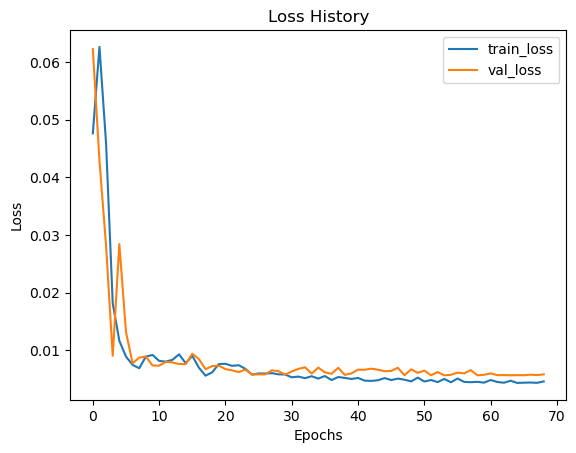

In [43]:
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Loss History')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Loss History.png")
plt.show()

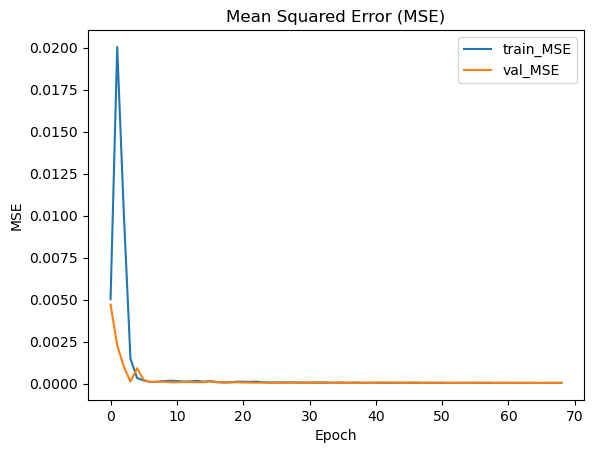

In [44]:
plt.plot(history.history['mean_squared_error'], label='train_MSE')
plt.plot(history.history['val_mean_squared_error'], label='val_MSE')
plt.title('Mean Squared Error (MSE)')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MSE History.png")
plt.show()

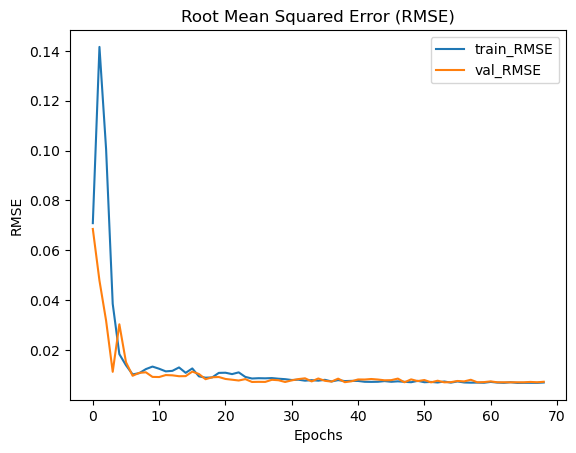

In [45]:
plt.plot(history.history['root_mean_squared_error'], label='train_RMSE')
plt.plot(history.history['val_root_mean_squared_error'], label='val_RMSE')
plt.title('Root Mean Squared Error (RMSE)')
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - RMSE History.png")
plt.show()

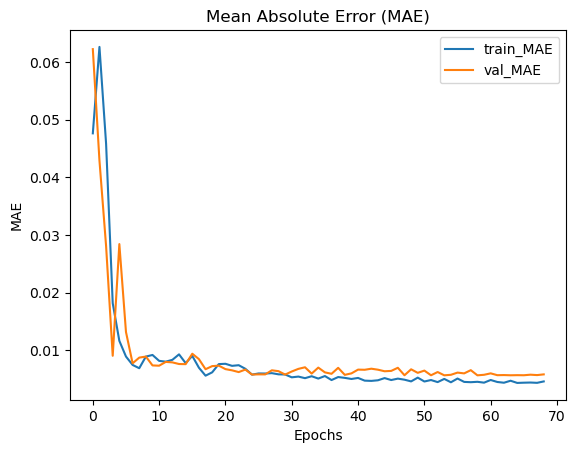

In [46]:
plt.plot(history.history['mean_absolute_error'], label='train_MAE')
plt.plot(history.history['val_mean_absolute_error'], label='val_MAE')
plt.title('Mean Absolute Error (MAE)')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MAE History.png")
plt.show()

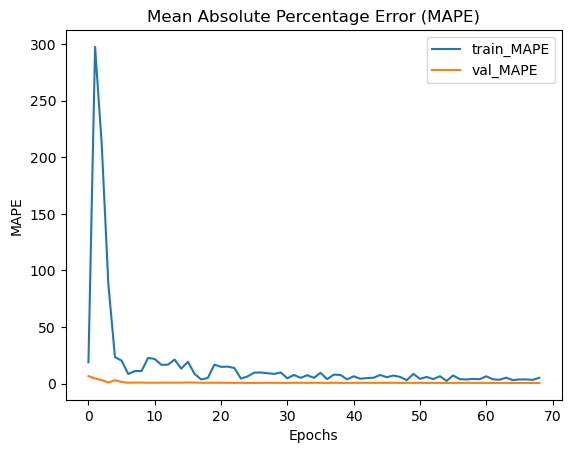

In [47]:
plt.plot(history.history['mean_absolute_percentage_error'], label='train_MAPE')
plt.plot(history.history['val_mean_absolute_percentage_error'], label='val_MAPE')
plt.title('Mean Absolute Percentage Error (MAPE)')
plt.xlabel('Epochs')
plt.ylabel('MAPE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MAPE History.png")
plt.show()

Fazer uma predição

2025-04-14 19:09:40.183292: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Inputs Shape: (7598, 4, 2)
Labels Shape: (7598, 1, 1)
Prediction Shape: (7598, 1, 10)


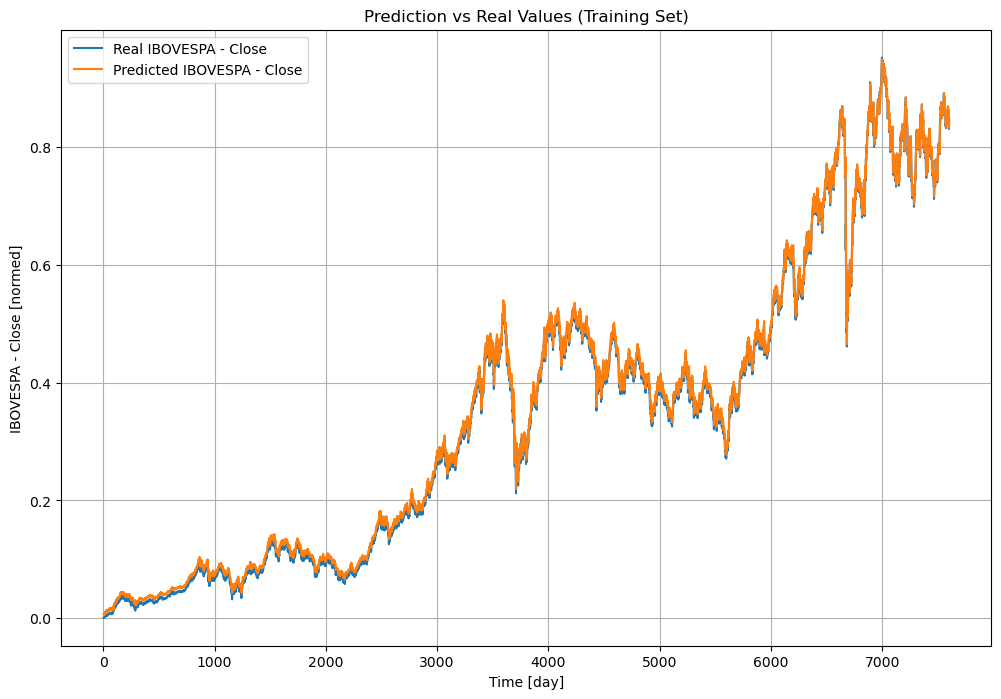

In [48]:
# create inputs and labels
inputs, labels = None, None
for train in iter(multi_window.train):
  if inputs is None:
    inputs = train[0]
    labels = train[1]
  else:
    inputs = np.concatenate((inputs, train[0]), axis=0)
    labels = np.concatenate((labels, train[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# # plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# # plot the labels and predictions
# for i in range(OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)column), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot shifted
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Training Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Training Set).png")
plt.show()

Inputs Shape: (257, 4, 2)
Labels Shape: (257, 1, 1)
Prediction Shape: (257, 1, 10)


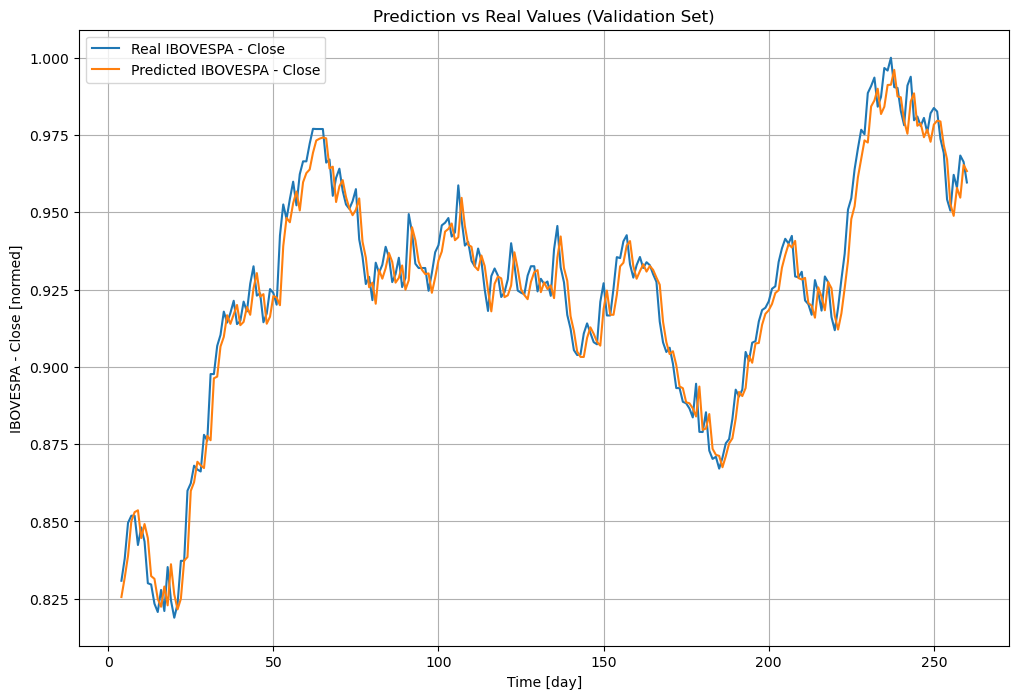

In [49]:
# create inputs and labels
inputs, labels = None, None
for val in iter(multi_window.val):
  if inputs is None:
    inputs = val[0]
    labels = val[1]
  else:
    inputs = np.concatenate((inputs, val[0]), axis=0)
    labels = np.concatenate((labels, val[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# plot the labels and predictions
# for i in range(2):#OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)
#   # add labels, prediction and inputs to the plot shifted
#   if OUTPUT_WINDOW_SIZE == 1:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot, with inputs shifted by the input window size
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Validation Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Validation Set).png")
plt.show()

Inputs Shape: (125, 4, 2)
Labels Shape: (125, 1, 1)
Prediction Shape: (125, 1, 10)


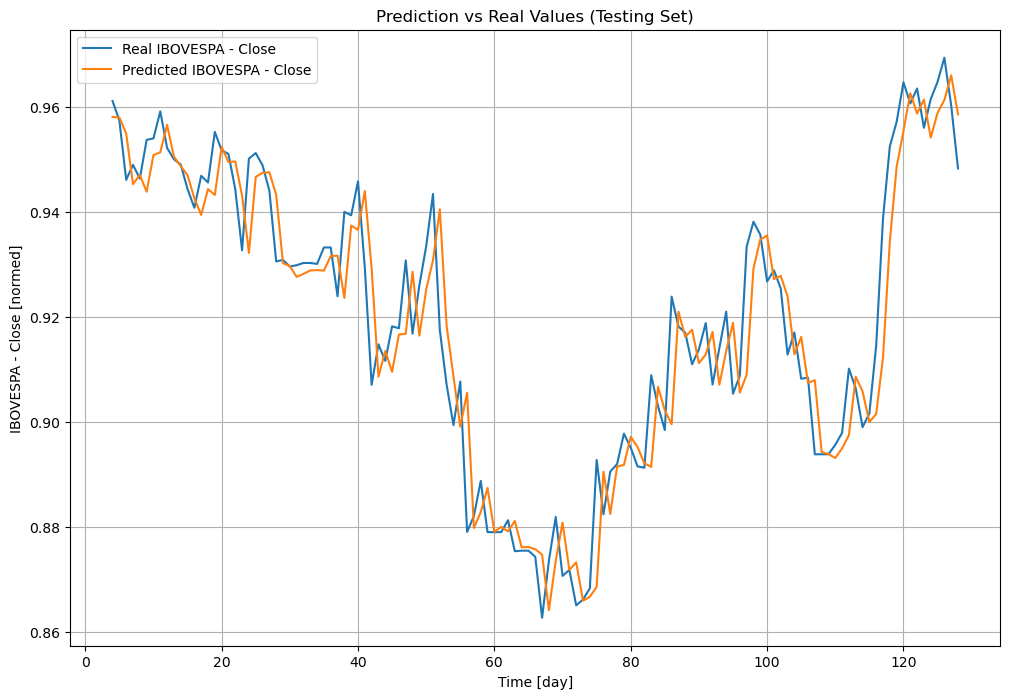

In [50]:
# create inputs and labels
inputs, labels = None, None
for test in iter(multi_window.test):
  if inputs is None:
    inputs = test[0]
    labels = test[1]
  else:
    inputs = np.concatenate((inputs, test[0]), axis=0)
    labels = np.concatenate((labels, test[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# # plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# # plot the labels and predictions
# for i in range(OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)
#   # add labels, prediction and inputs to the plot shifted
#   if OUTPUT_WINDOW_SIZE == 1:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot, with inputs shifted by the input window size
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Testing Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Testing Set).png")
plt.show()

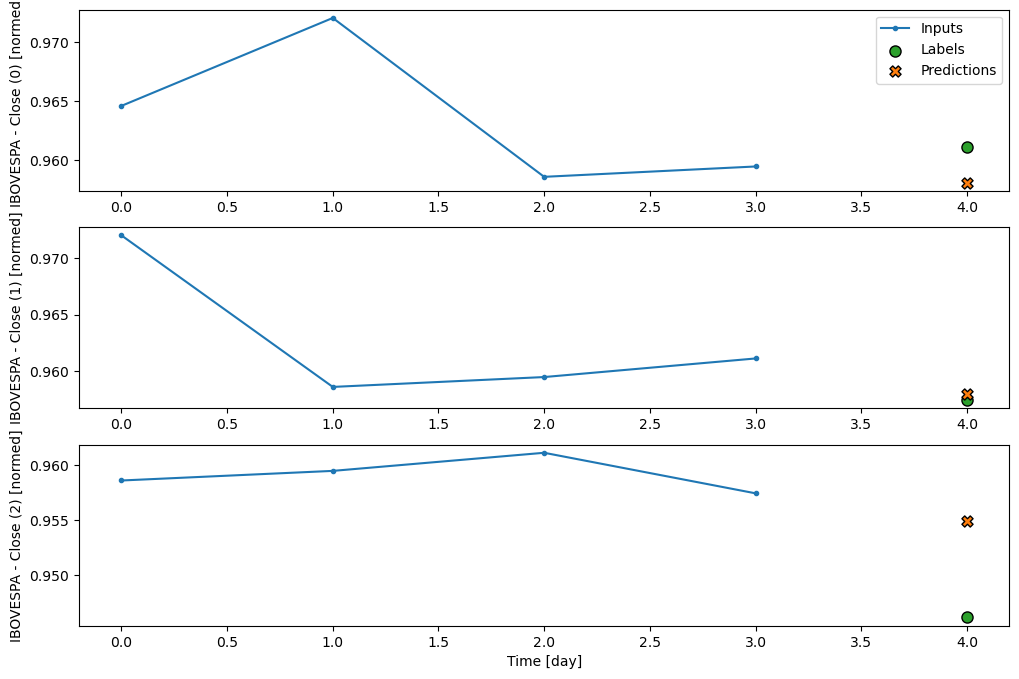

In [51]:
# multi_window.example = next(iter(multi_window.test))
multi_window.plot(model, plot_col=COLUMN_TO_PREDICT)

In [52]:
run_end = time.time()

timeMillisec = (run_end-run_start) * 10**3
# print time in format hh"h":mm"m":ss"s":ms"ms" (like 1h:2m:3s:4ms)
timeStr = str(datetime.timedelta(milliseconds=timeMillisec))
timeStr = timeStr.split(".")[0]
timeStr = timeStr.split(":")
timeStr = f"{int(timeStr[0])}h:{int(timeStr[1])}m:{int(timeStr[2])}s:{int(timeMillisec%1000)}ms"
print(f"Tempo total: {timeStr}")

Tempo total: 0h:2m:4s:909ms


In [53]:
# make a prediction
prediction = model.predict(multi_window.test)
prediction

1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step 

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


array([[[0.9580933 , 0.9580933 , 0.9580933 , ..., 0.9580933 ,
         0.9580933 , 0.9580933 ]],

       [[0.9579998 , 0.9579998 , 0.9579998 , ..., 0.9579998 ,
         0.9579998 , 0.9579998 ]],

       [[0.95492685, 0.95492685, 0.95492685, ..., 0.95492685,
         0.95492685, 0.95492685]],

       ...,

       [[0.96129775, 0.96129775, 0.96129775, ..., 0.96129775,
         0.96129775, 0.96129775]],

       [[0.9660274 , 0.9660274 , 0.9660274 , ..., 0.9660274 ,
         0.9660274 , 0.9660274 ]],

       [[0.9585775 , 0.9585775 , 0.9585775 , ..., 0.9585775 ,
         0.9585775 , 0.9585775 ]]], shape=(125, 1, 10), dtype=float32)

In [54]:
prediction.shape

(125, 1, 10)

Salvar e carregar modelo

In [55]:
# model = ...  # Get model (Sequential, Functional Model, or Model subclass)
# model.save('path/to/location.keras')  # The file needs to end with the .keras extension
# model = keras.models.load_model('path/to/location.keras')